DatetimeIndex(['2020-01-01', '2020-01-08', '2020-01-15', '2020-01-22',
               '2020-01-29', '2020-02-05', '2020-02-12', '2020-02-19',
               '2020-02-26', '2020-03-04',
               ...
               '2021-10-20', '2021-10-27', '2021-11-03', '2021-11-10',
               '2021-11-17', '2021-11-24', '2021-12-01', '2021-12-08',
               '2021-12-15', '2021-12-22'],
              dtype='datetime64[ns]', length=104, freq='7D')


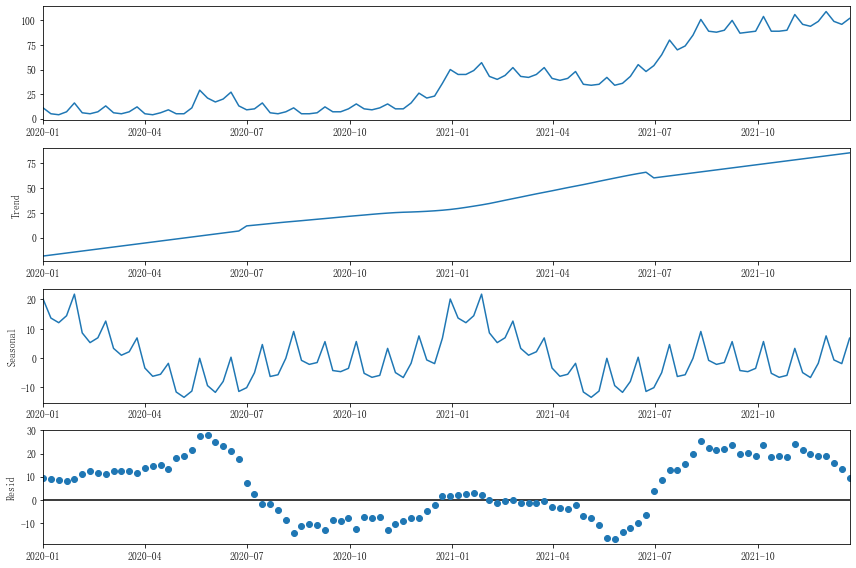

In [484]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from scipy import interpolate
import pylab as pl
import statsmodels.api as sm

matplotlib.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.DataFrame({'amount': [11, 5, 4, 7, 16, 6, 5, 7, 13, 6, 5, 7, 12, 5, 4, 6, 9, 5, 5, 11, 29, 21, 17, 20, 27,
                                13,
                                9, 10, 16, 6, 5, 7, 11, 5, 5, 6, 12, 7, 7, 10, 15, 10, 9, 11, 15, 10, 10, 16, 26,
                                21, 23, 36,
                                50, 45, 45, 49, 57, 43, 40, 44, 52, 43, 42, 45, 52, 41, 39, 41, 48, 35, 34, 35, 42,
                                34, 36, 43,
                                55, 48, 54, 65, 80, 70, 74, 85, 101, 89, 88, 90, 100, 87, 88, 89, 104, 89, 89, 90,
                                106, 96, 94,
                                99, 109, 99, 96, 102]})
index = pd.date_range('2020-1-1', periods=104, freq='7D')
print(index)
data.index = index
decomposition = sm.tsa.seasonal_decompose(data, model='additive', extrapolate_trend='freq')
plt.rc('figure',figsize=(12,8))
fig = decomposition.plot()
plt.show()

In [538]:
data = pd.DataFrame({'amount': [11, 5, 4, 7, 16, 6, 5, 7, 13, 6, 5, 7, 12, 5, 4, 6, 9, 5, 5, 11, 29, 21, 17, 20, 27,
                                13,
                                9, 10, 16, 6, 5, 7, 11, 5, 5, 6, 12, 7, 7, 10, 15, 10, 9, 11, 15, 10, 10, 16, 26,
                                21, 23, 36,
                                50, 45, 45, 49, 57, 43, 40, 44, 52, 43, 42, 45, 52, 41, 39, 41, 48, 35, 34, 35, 42,
                                34, 36, 43,
                                55, 48, 54, 65, 80, 70, 74, 85, 101, 89, 88, 90, 100, 87, 88, 89, 104, 89, 89, 90,
                                106, 96, 94,
                                99, 109, 99, 96, 102]})

In [265]:
import itertools
# 首先定义 p、d、q 的参数值范围，这里取 0 - 2.
p = d = q = range(0, 7)

# 然后用itertools函数生成不同的参数组合
pdq = list(itertools.product(p, d, q))

In [247]:
pdq = [i for i in pdq if i[0] == 8]
# pdq

In [591]:
p = d = q = P = D = Q = range(0, 4)

pdq = list(itertools.product(p, d, q, P, D, Q))

In [593]:
# from sklearn.metrics import 
result = None
mse_min = 100
param = None
for i in pdq:
    print(i)
    mod = sm.tsa.statespace.SARIMAX(data[:96],
                                order=(i[0], i[1], i[2]),
                                seasonal_order=(i[3], i[4], i[5], 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    print(results.summary().tables[0])
#     print(results.summary())
    
    pred = results.predict(start=96, end = 103, dynamic=False)
    mse = ((np.array(pred) - np.array(data.loc[96:, 'amount'])) ** 2).mean()
    print(f'mse={mse}')
#     print('***********************************************************************')
    if mse < mse_min:
        mse_min = mse
        result = results
        param = (i[0], i[1], i[2], i[3], i[4], i[5])

(0, 0, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:                        SARIMAX   Log Likelihood                -496.645
Date:                Tue, 03 May 2022   AIC                            995.291
Time:                        14:29:12   BIC                            997.845
Sample:                             0   HQIC                           996.323
                                 - 96                                         
Covariance Type:                  opg                                         
mse=10048.875
(0, 0, 0, 0, 0, 1)
                                 SARIMAX Results                                  
Dep. Variable:                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                -413.527
Date:                    Tue, 03 May 2022   AIC                    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(0, 0, [1, 2], 12)   Log Likelihood               -1310.310
Date:                       Tue, 03 May 2022   AIC                           2626.619
Time:                               14:29:12   BIC                           2633.408
Sample:                                    0   HQIC                          2629.319
                                        - 96                                         
Covariance Type:                         opg                                         
mse=68283467895.30242
(0, 0, 0, 0, 0, 3)
                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                -292.652
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(0, 1, [1, 2], 12)   Log Likelihood               -1320.418
Date:                       Tue, 03 May 2022   AIC                           2646.836
Time:                               14:29:14   BIC                           2653.069
Sample:                                    0   HQIC                          2649.269
                                        - 96                                         
Covariance Type:                         opg                                         
mse=214.6401062101428
(0, 0, 0, 0, 1, 3)
                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(0, 1, [1, 2, 3], 12)   Log Likelihood                -215.364
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(0, 2, [1, 2], 12)   Log Likelihood                -210.270
Date:                       Tue, 03 May 2022   AIC                            426.541
Time:                               14:29:15   BIC                            432.091
Sample:                                    0   HQIC                           428.629
                                        - 96                                         
Covariance Type:                         opg                                         
mse=11.94070696129441
(0, 0, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(0, 2, [1, 2, 3], 12)   Log Likelihood                -144.853
Date:                          Tue, 03 May 2022   AIC                            297.706
Time:                                  14:29:16   BIC                            303.927
Sample:                                       0   HQIC                           299.854
                                           - 96                                         
Covariance Type:                            opg                                         
mse=104.47034421751543
(0, 0, 0, 0, 3, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0, 12)   Log Likelihood                -304.477
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(0, 3, [1, 2], 12)   Log Likelihood                -180.670
Date:                       Tue, 03 May 2022   AIC                            367.339
Time:                               14:29:17   BIC                            372.005
Sample:                                    0   HQIC                           368.950
                                        - 96                                         
Covariance Type:                         opg                                         
mse=555.339338729562
(0, 0, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(0, 3, [1, 2, 3], 12)   Log Likelihood                -125.700
Date:                          Tue, 03 May 2022   AIC                            259.399
Time:                                  14:29:24   BIC                            263.941
Sample:                                       0   HQIC                           260.542
                                           - 96                                         
Covariance Type:                            opg                                         
mse=457.7697006351422
(0, 0, 0, 1, 0, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                -367.623
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(1, 0, [1, 2, 3], 12)   Log Likelihood                -244.277
Date:                          Tue, 03 May 2022   AIC                            498.553
Time:                                  14:29:26   BIC                            508.941
Sample:                                       0   HQIC                           502.608
                                           - 96                                         
Covariance Type:                            opg                                         
mse=814.1061233478312
(0, 0, 0, 1, 1, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -329.769
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(1, 1, [1, 2], 12)   Log Likelihood               -1244.519
Date:                       Tue, 03 May 2022   AIC                           2497.039
Time:                               14:29:27   BIC                           2505.349
Sample:                                    0   HQIC                          2500.282
                                        - 96                                         
Covariance Type:                         opg                                         
mse=77.07884071226782
(0, 0, 0, 1, 1, 3)
                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(1, 1, [1, 2, 3], 12)   Log Likelihood                -215.222
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(1, 2, [1, 2], 12)   Log Likelihood                -209.358
Date:                       Tue, 03 May 2022   AIC                            426.716
Time:                               14:29:29   BIC                            434.117
Sample:                                    0   HQIC                           429.501
                                        - 96                                         
Covariance Type:                         opg                                         
mse=89.58871966607563
(0, 0, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(1, 2, [1, 2, 3], 12)   Log Likelihood                -142.592
Date:                          Tue, 03 May 2022   AIC                            295.183
Time:                                  14:29:31   BIC                            302.960
Sample:                                       0   HQIC                           297.868
                                           - 96                                         
Covariance Type:                            opg                                         
mse=149.81187418557477
(0, 0, 0, 1, 3, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0, 12)   Log Likelihood                -235.565
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(1, 3, [1, 2], 12)   Log Likelihood                -169.648
Date:                       Tue, 03 May 2022   AIC                            347.296
Time:                               14:29:33   BIC                            353.518
Sample:                                    0   HQIC                           349.444
                                        - 96                                         
Covariance Type:                         opg                                         
mse=70.49261069954304
(0, 0, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(1, 3, [1, 2, 3], 12)   Log Likelihood                -116.419
Date:                          Tue, 03 May 2022   AIC                            242.839
Time:                                  14:29:42   BIC                            248.516
Sample:                                       0   HQIC                           244.267
                                           - 96                                         
Covariance Type:                            opg                                         
mse=62.066409805992706
(0, 0, 0, 2, 0, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0, 12)   Log Likelihood                -302.124
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(2, 0, [1, 2], 12)   Log Likelihood               -1156.382
Date:                       Tue, 03 May 2022   AIC                           2322.763
Time:                               14:29:43   BIC                           2334.076
Sample:                                    0   HQIC                          2327.262
                                        - 96                                         
Covariance Type:                         opg                                         
mse=2173900.4570613117
(0, 0, 0, 2, 0, 3)
                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(2, 0, [1, 2, 3], 12)   Log Likelihood                -239.941
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(2, 1, [1, 2, 3], 12)   Log Likelihood                -204.074
Date:                          Tue, 03 May 2022   AIC                            420.148
Time:                                  14:29:47   BIC                            431.249
Sample:                                       0   HQIC                           424.325
                                           - 96                                         
Covariance Type:                            opg                                         
mse=74.72864018941155
(0, 0, 0, 2, 2, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0, 12)   Log Likelihood                -209.583
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(2, 2, [1, 2], 12)   Log Likelihood                -196.155
Date:                       Tue, 03 May 2022   AIC                            402.309
Time:                               14:29:49   BIC                            411.560
Sample:                                    0   HQIC                           405.790
                                        - 96                                         
Covariance Type:                         opg                                         
mse=734.4410379744221
(0, 0, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(2, 2, [1, 2, 3], 12)   Log Likelihood                -136.383
Date:                          Tue, 03 May 2022   AIC                            284.767
Time:                                  14:29:52   BIC                            294.099
Sample:                                       0   HQIC                           287.988
                                           - 96                                         
Covariance Type:                            opg                                         
mse=626.1806640034964
(0, 0, 0, 2, 3, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0, 12)   Log Likelihood                -156.249
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(2, 3, [1, 2], 12)   Log Likelihood                -147.055
Date:                       Tue, 03 May 2022   AIC                            304.111
Time:                               14:29:56   BIC                            311.887
Sample:                                    0   HQIC                           306.795
                                        - 96                                         
Covariance Type:                         opg                                         
mse=915.9985221139166
(0, 0, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(2, 3, [1, 2, 3], 12)   Log Likelihood                 -93.445
Date:                          Tue, 03 May 2022   AIC                            198.891
Time:                                  14:30:06   BIC                            205.704
Sample:                                       0   HQIC                           200.604
                                           - 96                                         
Covariance Type:                            opg                                         
mse=392.09079233063136
(0, 0, 0, 3, 0, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0, 12)   Log Likelihood                -243.767
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(3, 0, [1, 2], 12)   Log Likelihood                -952.289
Date:                       Tue, 03 May 2022   AIC                           1916.578
Time:                               14:30:08   BIC                           1929.144
Sample:                                    0   HQIC                          1921.493
                                        - 96                                         
Covariance Type:                         opg                                         
mse=1130689232.2861462
(0, 0, 0, 3, 0, 3)
                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(3, 0, [1, 2, 3], 12)   Log Likelihood                -235.639
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(3, 1, [1, 2], 12)   Log Likelihood                -201.991
Date:                       Tue, 03 May 2022   AIC                            415.982
Time:                               14:30:12   BIC                            427.209
Sample:                                    0   HQIC                           420.224
                                        - 96                                         
Covariance Type:                         opg                                         
mse=644.1781843672339
(0, 0, 0, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(3, 1, [1, 2, 3], 12)   Log Likelihood                -195.690
Date:                          Tue, 03 May 2022   AIC                            405.381
Time:                                  14:30:13   BIC                            418.332
Sample:                                       0   HQIC                           410.254
                                           - 96                                         
Covariance Type:                            opg                                         
mse=1077.9945952531857
(0, 0, 0, 3, 2, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(3, 2, 0, 12)   Log Likelihood                -141.584
Dat

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(3, 2, [1, 2], 12)   Log Likelihood                -140.957
Date:                       Tue, 03 May 2022   AIC                            293.913
Time:                               14:30:17   BIC                            303.414
Sample:                                    0   HQIC                           297.229
                                        - 96                                         
Covariance Type:                         opg                                         
mse=628.1741069727261
(0, 0, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(3, 2, [1, 2, 3], 12)   Log Likelihood                -136.371
Date:                          Tue, 03 May 2022   AIC                            286.743
Time:                                  14:30:20   BIC                            297.630
Sample:                                       0   HQIC                           290.501
                                           - 96                                         
Covariance Type:                            opg                                         
mse=646.5436962154353
(0, 0, 0, 3, 3, 0)
                                SARIMAX Results                                 
Dep. Variable:                   amount   No. Observations:                   96
Model:             SARIMAX(3, 3, 0, 12)   Log Likelihood                 -99.832
Date

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                   SARIMAX Results                                   
Dep. Variable:                        amount   No. Observations:                   96
Model:             SARIMAX(3, 3, [1, 2], 12)   Log Likelihood                 -98.012
Date:                       Tue, 03 May 2022   AIC                            208.024
Time:                               14:30:34   BIC                            215.093
Sample:                                    0   HQIC                           209.900
                                        - 96                                         
Covariance Type:                         opg                                         
mse=289.8098170505103
(0, 0, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                           amount   No. Observations:                   96
Model:             SARIMAX(3, 3, [1, 2, 3], 12)   Log Likelihood                 -96.674
Date:                          Tue, 03 May 2022   AIC                            207.348
Time:                                  14:30:47   BIC                            215.296
Sample:                                       0   HQIC                           209.347
                                           - 96                                         
Covariance Type:                            opg                                         
mse=2191.774341388656
(0, 0, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -442.616
Date:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -392.093
Date:                            Tue, 03 May 2022   AIC                            790.186
Time:                                    14:30:47   BIC                            797.406
Sample:                                         0   HQIC                           793.084
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9633.651119702925
(0, 0, 1, 0, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -2209.239
Date:                                 Tue, 03 May 2022   AIC                           4426.479
Time:                                         14:30:48   BIC                           4435.473
Sample:                                              0   HQIC                          4430.051
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.4526363302329994e+17
(0, 0, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -2083.152
Date:                                 Tue, 03 May 2022   AIC                           4174.303
Time:                                         14:30:49   BIC                           4182.545
Sample:                                              0   HQIC                          4177.514
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7.44036215017592e+16
(0, 0, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:            

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -180.277
Date:                                 Tue, 03 May 2022   AIC                            368.554
Time:                                         14:30:52   BIC                            375.868
Sample:                                              0   HQIC                           371.294
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10.918686622002493
(0, 0, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                -123.006
Date:                                    Tue, 03 May 2022   AIC                            256.012
Time:                                            14:30:55   BIC                            263.644
Sample:                                                 0   HQIC                           258.614
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=100.70171843029362
(0, 0, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -161.234
Date:                                 Tue, 03 May 2022   AIC                            330.467
Time:                                         14:30:59   BIC                            336.573
Sample:                                              0   HQIC                           332.549
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1194.6938612564518
(0, 0, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                -108.316
Date:                                    Tue, 03 May 2022   AIC                            226.632
Time:                                            14:31:08   BIC                            232.087
Sample:                                                 0   HQIC                           227.917
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=237.35656667589208
(0, 0, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -2179.172
Date:                                 Tue, 03 May 2022   AIC                           4368.344
Time:                                         14:31:09   BIC                           4379.586
Sample:                                              0   HQIC                          4372.810
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.943537974099195e+18
(0, 0, 1, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -212.218
Date:                                    Tue, 03 May 2022   AIC                            436.436
Time:                                            14:31:11   BIC                            448.799
Sample:                                                 0   HQIC                           441.252
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=173.641377004816
(0, 0, 1, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -184.031
Date:                                    Tue, 03 May 2022   AIC                            380.063
Time:                                            14:31:14   BIC                            391.035
Sample:                                                 0   HQIC                           384.173
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=274.6128000524985
(0, 0, 1, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -180.276
Date:                                 Tue, 03 May 2022   AIC                            370.552
Time:                                         14:31:16   BIC                            379.696
Sample:                                              0   HQIC                           373.978
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10.91641845988388
(0, 0, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                -120.566
Date:                                    Tue, 03 May 2022   AIC                            253.132
Time:                                            14:31:19   BIC                            262.290
Sample:                                                 0   HQIC                           256.255
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=140.8620538297041
(0, 0, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -146.202
Date:                                 Tue, 03 May 2022   AIC                            302.404
Time:                                         14:31:22   BIC                            310.035
Sample:                                              0   HQIC                           305.006
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=53.172520025178166
(0, 0, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -98.950
Date:                                    Tue, 03 May 2022   AIC                            209.901
Time:                                            14:31:32   BIC                            216.447
Sample:                                                 0   HQIC                           211.443
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=23.196490973825178
(0, 0, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1218.593
Date:                                 Tue, 03 May 2022   AIC                           2449.185
Time:                                         14:31:33   BIC                           2462.676
Sample:                                              0   HQIC                          2454.544
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2031911.639726689
(0, 0, 1, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -209.760
Date:                                    Tue, 03 May 2022   AIC                            433.520
Time:                                            14:31:35   BIC                            447.944
Sample:                                                 0   HQIC                           439.139
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=22.100456619182932
(0, 0, 1, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -177.623
Date:                                    Tue, 03 May 2022   AIC                            369.246
Time:                                            14:31:39   BIC                            382.046
Sample:                                                 0   HQIC                           374.041
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=47.62688831253317
(0, 0, 1, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 2, 1, 12)   Log Likelihood                -180.154
Date:                            Tue, 03 May 2022   AIC                            370.308
Time:                                    14:31:41   BIC                            379.664
Sample:                                         0   HQIC                           373.843
                                             - 96                                         
Covariance Type:                              opg                                         
mse=542.1743480758987
(0, 0, 1, 2, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                -117.335
Date:                                    Tue, 03 May 2022   AIC                            248.670
Time:                                            14:31:47   BIC                            259.355
Sample:                                                 0   HQIC                           252.314
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=437.8055037368272
(0, 0, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 3, [1, 2], 12)   Log Likelihood                -128.278
Date:                                 Tue, 03 May 2022   AIC                            268.555
Time:                                         14:31:54   BIC                            277.713
Sample:                                              0   HQIC                           271.678
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=621.1571031224374
(0, 0, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -79.091
Date:                                    Tue, 03 May 2022   AIC                            172.182
Time:                                            14:32:08   BIC                            179.819
Sample:                                                 0   HQIC                           173.981
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=371.48362474593597
(0, 0, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 0, [1, 2], 12)   Log Likelihood               -1807.808
Date:                                 Tue, 03 May 2022   AIC                           3629.617
Time:                                         14:32:10   BIC                           3644.277
Sample:                                              0   HQIC                          3635.351
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.44129499623242e+19
(0, 0, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -207.814
Date:                                    Tue, 03 May 2022   AIC                            431.627
Time:                                            14:32:11   BIC                            448.111
Sample:                                                 0   HQIC                           438.048
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=26.764348058665888
(0, 0, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -170.667
Date:                                    Tue, 03 May 2022   AIC                            357.334
Time:                                            14:32:17   BIC                            371.964
Sample:                                                 0   HQIC                           362.815
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=980.6543322945652
(0, 0, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 2, [1, 2], 12)   Log Likelihood                -125.538
Date:                                 Tue, 03 May 2022   AIC                            265.076
Time:                                         14:32:24   BIC                            276.161
Sample:                                              0   HQIC                           268.945
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=440.68941183624725
(0, 0, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                -116.907
Date:                                    Tue, 03 May 2022   AIC                            249.814
Time:                                            14:32:28   BIC                            262.024
Sample:                                                 0   HQIC                           253.978
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=407.3266806809765
(0, 0, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -84.989
Date:                                 Tue, 03 May 2022   AIC                            183.978
Time:                                         14:32:55   BIC                            192.224
Sample:                                              0   HQIC                           186.166
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=126.85395298709398
(0, 0, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -78.209
Date:                                    Tue, 03 May 2022   AIC                            172.418
Time:                                            14:33:10   BIC                            181.146
Sample:                                                 0   HQIC                           174.474
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=182.45926228943472
(0, 0, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -2207.472
Date:                            Tue, 03 May 2022   AIC                           4424.944
Time:                                    14:33:10   BIC                           4436.114
Sample:                                         0   HQIC                          4429.375
                                             - 96                                         
Covariance Type:                              opg                                         
mse=50953227762888.45
(0, 0, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(0, 1, 2, 12)   Log Likelihood               -1696.911
Date:                            Tue, 03 May 2022   AIC                           3403.822
Time:                                    14:33:16   BIC                           3414.037
Sample:                                         0   HQIC                          3407.792
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1.0093393298300705e+20
(0, 0, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(0, 2, 2, 12)   Log Likelihood                -153.921
Date:                            Tue, 03 May 2022   AIC                            317.842
Time:                                    14:33:21   BIC                            326.875
Sample:                                         0   HQIC                           321.209
                                             - 96                                         
Covariance Type:                              opg                                         
mse=13.199697610372485
(0, 0, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                -101.983
Date:                                    Tue, 03 May 2022   AIC                            215.967
Time:                                            14:33:24   BIC                            224.946
Sample:                                                 0   HQIC                           218.988
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=83.78029475942807
(0, 0, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(0, 3, 2, 12)   Log Likelihood                -136.258
Date:                            Tue, 03 May 2022   AIC                            282.517
Time:                                    14:33:29   BIC                            289.999
Sample:                                         0   HQIC                           285.034
                                             - 96                                         
Covariance Type:                              opg                                         
mse=277.17730565995447
(0, 0, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -93.663
Date:                                    Tue, 03 May 2022   AIC                            199.326
Time:                                            14:33:38   BIC                            205.593
Sample:                                                 0   HQIC                           200.686
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=101.95090140550134
(0, 0, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -274.589
Date:                              Tue, 03 May 2022   AIC                            559.178
Time:                                      14:33:38   BIC                            571.150
Sample:                                           0   HQIC                           563.981
                                               - 96                                         
Covariance Type:                                opg                                         
mse=101.85156090830043
(0, 0, 2, 1, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 0, 2, 12)   Log Likelihood               -2213.360
Date:                            Tue, 03 May 2022   AIC                           4438.720
Time:                                    14:33:39   BIC                           4452.125
Sample:                                         0   HQIC                          4444.038
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1323125813548977.8
(0, 0, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 1, 2, 12)   Log Likelihood               -2135.098
Date:                            Tue, 03 May 2022   AIC                           4282.196
Time:                                    14:33:42   BIC                           4294.455
Sample:                                         0   HQIC                          4286.960
                                             - 96                                         
Covariance Type:                              opg                                         
mse=361974579684084.9
(0, 0, 2, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -152.892
Date:                                    Tue, 03 May 2022   AIC                            319.784
Time:                                            14:33:45   BIC                            332.430
Sample:                                                 0   HQIC                           324.498
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=123.66578099334271
(0, 0, 2, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 2, 2, 12)   Log Likelihood                -154.449
Date:                            Tue, 03 May 2022   AIC                            320.898
Time:                                    14:33:48   BIC                            331.738
Sample:                                         0   HQIC                           324.939
                                             - 96                                         
Covariance Type:                              opg                                         
mse=32.44432889427694
(0, 0, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -99.758
Date:                                    Tue, 03 May 2022   AIC                            213.515
Time:                                            14:33:53   BIC                            223.991
Sample:                                                 0   HQIC                           217.040
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=106.45657572318797
(0, 0, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 3, 2, 12)   Log Likelihood                -125.778
Date:                            Tue, 03 May 2022   AIC                            263.556
Time:                                    14:34:01   BIC                            272.535
Sample:                                         0   HQIC                           266.577
                                             - 96                                         
Covariance Type:                              opg                                         
mse=39.1647431775438
(0, 0, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -85.010
Date:                                    Tue, 03 May 2022   AIC                            184.019
Time:                                            14:34:14   BIC                            191.331
Sample:                                                 0   HQIC                           185.606
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=18.28791383040555
(0, 0, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 0, [1], 12)   Log Likelihood                -231.303
Date:                              Tue, 03 May 2022   AIC                            474.606
Time:                                      14:34:15   BIC                            488.266
Sample:                                           0   HQIC                           480.044
                                               - 96                                         
Covariance Type:                                opg                                         
mse=94.34312744712173
(0, 0, 2, 2, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1157.477
Date:                            Tue, 03 May 2022   AIC                           2328.954
Time:                                    14:34:16   BIC                           2344.593
Sample:                                         0   HQIC                          2335.159
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1737312.8112809132
(0, 0, 2, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -179.184
Date:                                    Tue, 03 May 2022   AIC                            374.368
Time:                                            14:34:18   BIC                            390.712
Sample:                                                 0   HQIC                           380.720
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=75.83938690139422
(0, 0, 2, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 1, 2, 12)   Log Likelihood                -191.615
Date:                            Tue, 03 May 2022   AIC                            397.230
Time:                                    14:34:21   BIC                            411.532
Sample:                                         0   HQIC                           402.788
                                             - 96                                         
Covariance Type:                              opg                                         
mse=196.85801923369547
(0, 0, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -152.008
Date:                                    Tue, 03 May 2022   AIC                            320.015
Time:                                            14:34:24   BIC                            334.469
Sample:                                                 0   HQIC                           325.403
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=114.83921668581218
(0, 0, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 2, 2, 12)   Log Likelihood                -158.969
Date:                            Tue, 03 May 2022   AIC                            331.938
Time:                                    14:34:30   BIC                            344.584
Sample:                                         0   HQIC                           336.652
                                             - 96                                         
Covariance Type:                              opg                                         
mse=55.59937999608724
(0, 0, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                -100.251
Date:                                    Tue, 03 May 2022   AIC                            216.502
Time:                                            14:34:36   BIC                            228.474
Sample:                                                 0   HQIC                           220.531
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=152.57332041772975
(0, 0, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 3, [1], 12)   Log Likelihood                -128.536
Date:                              Tue, 03 May 2022   AIC                            269.072
Time:                                      14:34:41   BIC                            278.573
Sample:                                           0   HQIC                           272.388
                                               - 96                                         
Covariance Type:                                opg                                         
mse=159.98446576542017
(0, 0, 2, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 3, 2, 12)   Log Likelihood                -164.817
Date:                            Tue, 03 May 2022   AIC                            343.634
Time:                                    14:34:45   BIC                            354.110
Sample:                                         0   HQIC                           347.159
                                             - 96                                         
Covariance Type:                              opg                                         
mse=338.02191237864895
(0, 0, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -78.988
Date:                                    Tue, 03 May 2022   AIC                            173.975
Time:                                            14:35:01   BIC                            182.332
Sample:                                                 0   HQIC                           175.789
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=232.96922019406244
(0, 0, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 0, [1], 12)   Log Likelihood                -189.306
Date:                              Tue, 03 May 2022   AIC                            392.612
Time:                                      14:35:03   BIC                            407.273
Sample:                                           0   HQIC                           398.347
                                               - 96                                         
Covariance Type:                                opg                                         
mse=112.146644759526
(0, 0, 2, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 0, 2, 12)   Log Likelihood               -1819.275
Date:                            Tue, 03 May 2022   AIC                           3654.550
Time:                                    14:35:05   BIC                           3671.305
Sample:                                         0   HQIC                          3661.104
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2.7508724314068004e+18
(0, 0, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -176.144
Date:                                    Tue, 03 May 2022   AIC                            370.287
Time:                                            14:35:07   BIC                            388.675
Sample:                                                 0   HQIC                           377.433
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=58.95101717205225
(0, 0, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -140.659
Date:                                    Tue, 03 May 2022   AIC                            299.318
Time:                                            14:35:16   BIC                            315.578
Sample:                                                 0   HQIC                           305.379
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=22.20927585635239
(0, 0, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 2, 2, 12)   Log Likelihood                -106.955
Date:                            Tue, 03 May 2022   AIC                            229.911
Time:                                    14:35:26   BIC                            242.579
Sample:                                         0   HQIC                           234.332
                                             - 96                                         
Covariance Type:                              opg                                         
mse=134.45232160516503
(0, 0, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -97.052
Date:                                    Tue, 03 May 2022   AIC                            212.104
Time:                                            14:35:31   BIC                            225.573
Sample:                                                 0   HQIC                           216.636
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=206.5138409985655
(0, 0, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 3, [1], 12)   Log Likelihood                 -76.566
Date:                              Tue, 03 May 2022   AIC                            167.132
Time:                                      14:35:57   BIC                            175.378
Sample:                                           0   HQIC                           169.320
                                               - 96                                         
Covariance Type:                                opg                                         
mse=47.68191647610309
(0, 0, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 3, 2, 12)   Log Likelihood                 -76.613
Date:                            Tue, 03 May 2022   AIC                            169.226
Time:                                    14:36:11   BIC                            178.650
Sample:                                         0   HQIC                           171.726
                                             - 96                                         
Covariance Type:                              opg                                         
mse=48.23843360474988
(0, 0, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -76.892
Date:                                    Tue, 03 May 2022   AIC                            171.784
Time:                                            14:36:32   BIC                            181.185
Sample:                                                 0   HQIC                           173.825
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=467.78403602428136
(0, 0, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1977.851
Date:                                 Tue, 03 May 2022   AIC                           3967.702
Time:                                         14:36:33   BIC                           3981.019
Sample:                                              0   HQIC                          3972.978
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.0188159741549064e+22
(0, 0, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Mode

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 1, 3, 12)   Log Likelihood                -139.902
Date:                            Tue, 03 May 2022   AIC                            293.803
Time:                                    14:36:38   BIC                            306.292
Sample:                                         0   HQIC                           298.435
                                             - 96                                         
Covariance Type:                              opg                                         
mse=131.86371988492266
(0, 0, 3, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 2, [1], 12)   Log Likelihood                -182.811
Date:                              Tue, 03 May 2022   AIC                            375.623
Time:                                      14:36:40   BIC                            385.749
Sample:                                           0   HQIC                           379.549
                                               - 96                                         
Covariance Type:                                opg                                         
mse=8.289320048208648
(0, 0, 3, 0, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -139.964
Date:                                 Tue, 03 May 2022   AIC                            291.929
Time:                                         14:36:42   BIC                            302.634
Sample:                                              0   HQIC                           295.899
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=29.161944734757345
(0, 0, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 2, 3, 12)   Log Likelihood                 -99.989
Date:                            Tue, 03 May 2022   AIC                            213.978
Time:                                    14:36:48   BIC                            224.238
Sample:                                         0   HQIC                           217.379
                                             - 96                                         
Covariance Type:                              opg                                         
mse=13.039122388165547
(0, 0, 3, 0, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 3, [], 12)   Log Likelihood                -233.905
Date:                             Tue, 03 May 2022   AIC                            475.810
Time:                                     14:36:49   BIC                            483.912
Sample:                                          0   HQIC                           478.951
                                              - 96                                         
Covariance Type:                               opg                                         
mse=1647.0718412890906
(0, 0, 3, 0, 3, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -125.402
Date:                                 Tue, 03 May 2022   AIC                            262.804
Time:                                         14:36:54   BIC                            271.598
Sample:                                              0   HQIC                           265.719
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=179.0183941212794
(0, 0, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 3, 3, 12)   Log Likelihood                 -85.271
Date:                            Tue, 03 May 2022   AIC                            184.543
Time:                                    14:37:06   BIC                            191.513
Sample:                                         0   HQIC                           185.903
                                             - 96                                         
Covariance Type:                              opg                                         
mse=252.720095842241
(0, 0, 3, 1, 0, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 0, [], 12)   Log Likelihood                -275.696
Date:                             Tue, 03 May 2022   AIC                            561.393
Time:                                     14:37:06   BIC                            573.547
Sample:                                          0   HQIC                           566.279
                                              - 96                                         
Covariance Type:                               opg                                         
mse=9.04716833452189
(0, 0, 3, 1, 0, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -256.867
Date:                              Tue, 03 May 2022   AIC                            525.733
Time:                                      14:37:07   BIC                            540.025
Sample:                                           0   HQIC                           531.463
                                               - 96                                         
Covariance Type:                                opg                                         
mse=29.918123122621584
(0, 0, 3, 1, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1901.870
Date:                                 Tue, 03 May 2022   AIC                           3817.741
Time:                                         14:37:08   BIC                           3833.277
Sample:                                              0   HQIC                          3823.897
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6.189678533615291e+23
(0, 0, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 0, 3, 12)   Log Likelihood                -166.678
Date:                            Tue, 03 May 2022   AIC                            349.357
Time:                                    14:37:10   BIC                            365.559
Sample:                                         0   HQIC                           355.638
                                             - 96                                         
Covariance Type:                              opg                                         
mse=56.59890886996163
(0, 0, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1839.871
Date:                                 Tue, 03 May 2022   AIC                           3693.742
Time:                                         14:37:13   BIC                           3707.920
Sample:                                              0   HQIC                          3699.239
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.2320489432205263e+18
(0, 0, 3, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 1, 3, 12)   Log Likelihood                -139.339
Date:                            Tue, 03 May 2022   AIC                            294.678
Time:                                    14:37:16   BIC                            308.951
Sample:                                         0   HQIC                           299.971
                                             - 96                                         
Covariance Type:                              opg                                         
mse=222.88883930993404
(0, 0, 3, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 2, [1], 12)   Log Likelihood                -182.811
Date:                              Tue, 03 May 2022   AIC                            377.621
Time:                                      14:37:19   BIC                            389.773
Sample:                                           0   HQIC                           382.332
                                               - 96                                         
Covariance Type:                                opg                                         
mse=7.926564005515795
(0, 0, 3, 1, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -139.204
Date:                                 Tue, 03 May 2022   AIC                            292.408
Time:                                         14:37:21   BIC                            304.898
Sample:                                              0   HQIC                           297.040
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=64.23504884864334
(0, 0, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 2, 3, 12)   Log Likelihood                 -91.802
Date:                            Tue, 03 May 2022   AIC                            199.605
Time:                                    14:37:27   BIC                            211.330
Sample:                                         0   HQIC                           203.491
                                             - 96                                         
Covariance Type:                              opg                                         
mse=185.12246435640566
(0, 0, 3, 1, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 3, [], 12)   Log Likelihood                -173.446
Date:                             Tue, 03 May 2022   AIC                            356.891
Time:                                     14:37:29   BIC                            366.247
Sample:                                          0   HQIC                           360.427
                                              - 96                                         
Covariance Type:                               opg                                         
mse=271.7098615658175
(0, 0, 3, 1, 3, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 3, [1, 2], 12)   Log Likelihood                -156.683
Date:                                 Tue, 03 May 2022   AIC                            327.366
Time:                                         14:37:36   BIC                            337.626
Sample:                                              0   HQIC                           330.767
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1091.6690878646828
(0, 0, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(1, 3, 3, 12)   Log Likelihood                 -76.190
Date:                            Tue, 03 May 2022   AIC                            168.381
Time:                                    14:37:50   BIC                            176.346
Sample:                                         0   HQIC                           169.936
                                             - 96                                         
Covariance Type:                              opg                                         
mse=19.650652710110133
(0, 0, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -2083.045
Date:                                 Tue, 03 May 2022   AIC                           4182.089
Time:                                         14:37:52   BIC                           4199.845
Sample:                                              0   HQIC                          4189.125
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.7762764833182542e+22
(0, 0, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 0, 3, 12)   Log Likelihood                -166.843
Date:                            Tue, 03 May 2022   AIC                            351.686
Time:                                    14:37:55   BIC                            369.914
Sample:                                         0   HQIC                           358.753
                                             - 96                                         
Covariance Type:                              opg                                         
mse=39.68475496717467
(0, 0, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -179.040
Date:                                 Tue, 03 May 2022   AIC                            374.079
Time:                                         14:37:59   BIC                            390.282
Sample:                                              0   HQIC                           380.361
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=602.8059456355849
(0, 0, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 1, 3, 12)   Log Likelihood                -142.683
Date:                            Tue, 03 May 2022   AIC                            303.365
Time:                                    14:38:02   BIC                            319.423
Sample:                                         0   HQIC                           309.320
                                             - 96                                         
Covariance Type:                              opg                                         
mse=188.89223406311658
(0, 0, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 2, [1], 12)   Log Likelihood                -153.495
Date:                              Tue, 03 May 2022   AIC                            320.989
Time:                                      14:38:06   BIC                            334.088
Sample:                                           0   HQIC                           325.939
                                               - 96                                         
Covariance Type:                                opg                                         
mse=44.650451281514215
(0, 0, 3, 2, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -133.133
Date:                                 Tue, 03 May 2022   AIC                            282.266
Time:                                         14:38:10   BIC                            296.540
Sample:                                              0   HQIC                           287.559
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=58.51057605057784
(0, 0, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 2, 3, 12)   Log Likelihood                 -91.563
Date:                            Tue, 03 May 2022   AIC                            201.127
Time:                                    14:38:15   BIC                            214.318
Sample:                                         0   HQIC                           205.499
                                             - 96                                         
Covariance Type:                              opg                                         
mse=295.70538805923775
(0, 0, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 3, [1], 12)   Log Likelihood                -123.769
Date:                              Tue, 03 May 2022   AIC                            261.538
Time:                                      14:38:22   BIC                            272.623
Sample:                                           0   HQIC                           265.407
                                               - 96                                         
Covariance Type:                                opg                                         
mse=43.253524025407195
(0, 0, 3, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 3, [1, 2], 12)   Log Likelihood                -115.007
Date:                                 Tue, 03 May 2022   AIC                            246.014
Time:                                         14:38:27   BIC                            257.740
Sample:                                              0   HQIC                           249.901
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=271.3384297011854
(0, 0, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(2, 3, 3, 12)   Log Likelihood                 -64.944
Date:                            Tue, 03 May 2022   AIC                            147.889
Time:                                    14:38:46   BIC                            156.850
Sample:                                         0   HQIC                           149.638
                                             - 96                                         
Covariance Type:                              opg                                         
mse=210.24896283019072
(0, 0, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 0, 3, 12)   Log Likelihood                -163.420
Date:                            Tue, 03 May 2022   AIC                            346.841
Time:                                    14:38:53   BIC                            367.094
Sample:                                         0   HQIC                           354.693
                                             - 96                                         
Covariance Type:                              opg                                         
mse=24.50185159614859
(0, 0, 3, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 1, 3, 12)   Log Likelihood                -131.669
Date:                            Tue, 03 May 2022   AIC                            283.338
Time:                                    14:39:04   BIC                            301.180
Sample:                                         0   HQIC                           289.955
                                             - 96                                         
Covariance Type:                              opg                                         
mse=29.76149934926341
(0, 0, 3, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 2, [1, 2], 12)   Log Likelihood                -148.966
Date:                                 Tue, 03 May 2022   AIC                            315.931
Time:                                         14:39:16   BIC                            330.183
Sample:                                              0   HQIC                           320.905
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=112.9883801945366
(0, 0, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 2, 3, 12)   Log Likelihood                 -91.466
Date:                            Tue, 03 May 2022   AIC                            202.932
Time:                                    14:39:22   BIC                            217.590
Sample:                                         0   HQIC                           207.791
                                             - 96                                         
Covariance Type:                              opg                                         
mse=227.0483626830208
(0, 0, 3, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 3, [1], 12)   Log Likelihood                 -72.878
Date:                              Tue, 03 May 2022   AIC                            161.756
Time:                                      14:39:48   BIC                            171.181
Sample:                                           0   HQIC                           164.257
                                               - 96                                         
Covariance Type:                                opg                                         
mse=19.755548573608813
(0, 0, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -72.780
Date:                                 Tue, 03 May 2022   AIC                            163.560
Time:                                         14:40:05   BIC                            174.163
Sample:                                              0   HQIC                           166.373
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=23.364381006312282
(0, 0, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(3, 3, 3, 12)   Log Likelihood                 -89.104
Date:                            Tue, 03 May 2022   AIC                            198.208
Time:                                    14:40:28   BIC                            208.165
Sample:                                         0   HQIC                           200.152
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4372.052280353918
(0, 1, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -31

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1405.255
Date:                                 Tue, 03 May 2022   AIC                           2816.510
Time:                                         14:40:28   BIC                           2823.255
Sample:                                              0   HQIC                          2819.189
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=20039.234358264723
(0, 1, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1163.052
Date:                                 Tue, 03 May 2022   AIC                           2332.103
Time:                                         14:40:29   BIC                           2338.284
Sample:                                              0   HQIC                          2334.511
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=37.76951633189127
(0, 1, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -138.904
Date:                                 Tue, 03 May 2022   AIC                            283.809
Time:                                         14:40:31   BIC                            289.294
Sample:                                              0   HQIC                           285.864
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=37.45969680226215
(0, 1, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                -102.776
Date:                                    Tue, 03 May 2022   AIC                            213.551
Time:                                            14:40:31   BIC                            219.657
Sample:                                                 0   HQIC                           215.633
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=76.80419628197244
(0, 1, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -131.484
Date:                                 Tue, 03 May 2022   AIC                            268.967
Time:                                         14:40:33   BIC                            273.546
Sample:                                              0   HQIC                           270.529
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=640.7608759455768
(0, 1, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -89.949
Date:                                    Tue, 03 May 2022   AIC                            187.898
Time:                                            14:40:36   BIC                            192.262
Sample:                                                 0   HQIC                           188.926
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=99.24299876978041
(0, 1, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1319.169
Date:                                 Tue, 03 May 2022   AIC                           2646.338
Time:                                         14:40:37   BIC                           2655.332
Sample:                                              0   HQIC                          2649.911
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=499.661110979307
(0, 1, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1119.479
Date:                                 Tue, 03 May 2022   AIC                           2246.959
Time:                                         14:40:39   BIC                           2255.201
Sample:                                              0   HQIC                          2250.169
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=69.22432299865815
(0, 1, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -141.675
Date:                                 Tue, 03 May 2022   AIC                            291.350
Time:                                         14:40:41   BIC                            298.664
Sample:                                              0   HQIC                           294.090
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=45.4983415274786
(0, 1, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                -100.827
Date:                                    Tue, 03 May 2022   AIC                            211.655
Time:                                            14:40:42   BIC                            219.287
Sample:                                                 0   HQIC                           214.257
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=67.8925772906586
(0, 1, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -121.190
Date:                                 Tue, 03 May 2022   AIC                            250.379
Time:                                         14:40:44   BIC                            256.485
Sample:                                              0   HQIC                           252.461
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=269.72941733760854
(0, 1, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -80.839
Date:                                    Tue, 03 May 2022   AIC                            171.678
Time:                                            14:40:52   BIC                            177.133
Sample:                                                 0   HQIC                           172.963
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=108.9823544646909
(0, 1, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -160.614
Date:                                    Tue, 03 May 2022   AIC                            333.228
Time:                                            14:40:53   BIC                            345.590
Sample:                                                 0   HQIC                           338.043
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=16.650097589654088
(0, 1, 0, 2, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -910.952
Date:                                 Tue, 03 May 2022   AIC                           1831.903
Time:                                         14:40:55   BIC                           1842.205
Sample:                                              0   HQIC                          1835.916
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=195.45145958772008
(0, 1, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -139.163
Date:                                 Tue, 03 May 2022   AIC                            288.327
Time:                                         14:40:57   BIC                            297.470
Sample:                                              0   HQIC                           291.752
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=128.61029194760783
(0, 1, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                -100.702
Date:                                    Tue, 03 May 2022   AIC                            213.404
Time:                                            14:41:00   BIC                            222.562
Sample:                                                 0   HQIC                           216.527
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=108.42579527776755
(0, 1, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -115.166
Date:                                 Tue, 03 May 2022   AIC                            240.333
Time:                                         14:41:04   BIC                            247.965
Sample:                                              0   HQIC                           242.936
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=906.2719051396272
(0, 1, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -70.202
Date:                                    Tue, 03 May 2022   AIC                            152.405
Time:                                            14:41:11   BIC                            158.951
Sample:                                                 0   HQIC                           153.947
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=723.3446283332416
(0, 1, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -1056.077
Date:                                 Tue, 03 May 2022   AIC                           2124.154
Time:                                         14:41:13   BIC                           2136.620
Sample:                                              0   HQIC                          2129.020
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=419907.2252502927
(0, 1, 0, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -158.922
Date:                                    Tue, 03 May 2022   AIC                            331.844
Time:                                            14:41:14   BIC                            346.268
Sample:                                                 0   HQIC                           337.463
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=21.746770154092125
(0, 1, 0, 3, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -134.872
Date:                                 Tue, 03 May 2022   AIC                            281.743
Time:                                         14:41:18   BIC                            292.844
Sample:                                              0   HQIC                           285.921
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=15.828858276546645
(0, 1, 0, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -130.322
Date:                                    Tue, 03 May 2022   AIC                            274.645
Time:                                            14:41:19   BIC                            287.445
Sample:                                                 0   HQIC                           279.440
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=45.3666022060441
(0, 1, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 2, [1, 2], 12)   Log Likelihood                -101.881
Date:                                 Tue, 03 May 2022   AIC                            215.762
Time:                                         14:41:22   BIC                            225.094
Sample:                                              0   HQIC                           218.983
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=89.42575850073707
(0, 1, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -99.027
Date:                                    Tue, 03 May 2022   AIC                            212.055
Time:                                            14:41:23   BIC                            222.739
Sample:                                                 0   HQIC                           215.699
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=80.81966378906574
(0, 1, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -72.820
Date:                                 Tue, 03 May 2022   AIC                            157.641
Time:                                         14:41:39   BIC                            164.454
Sample:                                              0   HQIC                           159.354
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=298.44423746346575
(0, 1, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -67.842
Date:                                    Tue, 03 May 2022   AIC                            149.684
Time:                                            14:41:48   BIC                            157.321
Sample:                                                 0   HQIC                           151.483
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=248.63730699291904
(0, 1, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1396.961
Date:                                 Tue, 03 May 2022   AIC                           2801.921
Time:                                         14:41:49   BIC                           2810.857
Sample:                                              0   HQIC                          2805.466
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=21188.24005428469
(0, 1, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1161.861
Date:                                 Tue, 03 May 2022   AIC                           2331.723
Time:                                         14:41:51   BIC                           2339.895
Sample:                                              0   HQIC                          2334.899
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=92.49603331739928
(0, 1, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -132.575
Date:                                 Tue, 03 May 2022   AIC                            273.150
Time:                                         14:41:53   BIC                            280.377
Sample:                                              0   HQIC                           275.844
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=16.91596966773105
(0, 1, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -94.992
Date:                                    Tue, 03 May 2022   AIC                            199.984
Time:                                            14:41:55   BIC                            207.466
Sample:                                                 0   HQIC                           202.501
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=106.67955912365494
(0, 1, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -119.695
Date:                                 Tue, 03 May 2022   AIC                            247.390
Time:                                         14:41:57   BIC                            253.376
Sample:                                              0   HQIC                           249.404
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=850.9547546515137
(0, 1, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -81.203
Date:                                    Tue, 03 May 2022   AIC                            172.405
Time:                                            14:42:06   BIC                            177.628
Sample:                                                 0   HQIC                           173.539
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=401.2694639430323
(0, 1, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1419.370
Date:                                 Tue, 03 May 2022   AIC                           2848.740
Time:                                         14:42:07   BIC                           2859.910
Sample:                                              0   HQIC                          2853.171
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=582.4143001610171
(0, 1, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1112.739
Date:                                 Tue, 03 May 2022   AIC                           2235.479
Time:                                         14:42:10   BIC                           2245.694
Sample:                                              0   HQIC                          2239.449
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=63.380957580332904
(0, 1, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -134.866
Date:                                 Tue, 03 May 2022   AIC                            279.733
Time:                                         14:42:12   BIC                            288.766
Sample:                                              0   HQIC                           283.100
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=25.077105921851448
(0, 1, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -94.673
Date:                                    Tue, 03 May 2022   AIC                            201.345
Time:                                            14:42:14   BIC                            210.324
Sample:                                                 0   HQIC                           204.366
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=74.78622332802236
(0, 1, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -112.556
Date:                                 Tue, 03 May 2022   AIC                            235.111
Time:                                         14:42:17   BIC                            242.594
Sample:                                              0   HQIC                           237.629
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=265.48473368437124
(0, 1, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -72.120
Date:                                    Tue, 03 May 2022   AIC                            156.239
Time:                                            14:42:27   BIC                            162.507
Sample:                                                 0   HQIC                           157.600
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=171.27705264564403
(0, 1, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1534.381
Date:                                 Tue, 03 May 2022   AIC                           3080.763
Time:                                         14:42:27   BIC                           3094.167
Sample:                                              0   HQIC                          3086.081
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=217575368309.04395
(0, 1, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1183.049
Date:                                 Tue, 03 May 2022   AIC                           2378.097
Time:                                         14:42:30   BIC                           2390.356
Sample:                                              0   HQIC                          2382.861
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=197.215120094214
(0, 1, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 2, 1, 12)   Log Likelihood                -137.130
Date:                            Tue, 03 May 2022   AIC                            284.259
Time:                                    14:42:32   BIC                            293.510
Sample:                                         0   HQIC                           287.740
                                             - 96                                         
Covariance Type:                              opg                                         
mse=107.1951675268603
(0, 1, 1, 2, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -92.941
Date:                                    Tue, 03 May 2022   AIC                            199.883
Time:                                            14:42:36   BIC                            210.358
Sample:                                                 0   HQIC                           203.407
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=154.38526097933607
(0, 1, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 3, [1, 2], 12)   Log Likelihood                -101.281
Date:                                 Tue, 03 May 2022   AIC                            214.562
Time:                                         14:42:43   BIC                            223.541
Sample:                                              0   HQIC                           217.583
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1402.2287069529807
(0, 1, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -62.477
Date:                                    Tue, 03 May 2022   AIC                            138.953
Time:                                            14:42:55   BIC                            146.265
Sample:                                                 0   HQIC                           140.540
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=539.9492944061
(0, 1, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood               -1239.831
Date:                                 Tue, 03 May 2022   AIC                           2493.663
Time:                                         14:42:58   BIC                           2508.206
Sample:                                              0   HQIC                          2499.340
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=382620.9812549845
(0, 1, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -148.360
Date:                                    Tue, 03 May 2022   AIC                            312.720
Time:                                            14:42:59   BIC                            329.065
Sample:                                                 0   HQIC                           319.072
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=25.1285482099902
(0, 1, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -123.210
Date:                                    Tue, 03 May 2022   AIC                            262.420
Time:                                            14:43:05   BIC                            276.873
Sample:                                                 0   HQIC                           267.808
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=39.89184672274503
(0, 1, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -96.937
Date:                                 Tue, 03 May 2022   AIC                            207.874
Time:                                         14:43:09   BIC                            218.761
Sample:                                              0   HQIC                           211.632
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=98.68162562876881
(0, 1, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -91.632
Date:                                    Tue, 03 May 2022   AIC                            199.264
Time:                                            14:43:12   BIC                            211.236
Sample:                                                 0   HQIC                           203.292
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=91.5588264398689
(0, 1, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -64.686
Date:                                 Tue, 03 May 2022   AIC                            143.372
Time:                                         14:43:36   BIC                            151.321
Sample:                                              0   HQIC                           145.371
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=263.2097085682052
(0, 1, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -63.973
Date:                                    Tue, 03 May 2022   AIC                            143.947
Time:                                            14:43:46   BIC                            152.303
Sample:                                                 0   HQIC                           145.760
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=289.35525984378285
(0, 1, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1276.021
Date:                            Tue, 03 May 2022   AIC                           2562.042
Time:                                    14:43:47   BIC                           2573.140
Sample:                                         0   HQIC                          2566.439
                                             - 96                                         
Covariance Type:                              opg                                         
mse=19487.109959275
(0, 1, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1167.751
Date:                            Tue, 03 May 2022   AIC                           2345.503
Time:                                    14:43:49   BIC                           2355.629
Sample:                                         0   HQIC                          2349.429
                                             - 96                                         
Covariance Type:                              opg                                         
mse=127.86421954983146
(0, 1, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 12)   Log Likelihood                -123.984
Date:                            Tue, 03 May 2022   AIC                            257.969
Time:                                    14:43:51   BIC                            266.890
Sample:                                         0   HQIC                           261.277
                                             - 96                                         
Covariance Type:                              opg                                         
mse=33.28417499538191
(0, 1, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -84.169
Date:                                    Tue, 03 May 2022   AIC                            180.339
Time:                                            14:43:54   BIC                            189.133
Sample:                                                 0   HQIC                           183.254
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=158.15997066498477
(0, 1, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(0, 3, 2, 12)   Log Likelihood                -112.037
Date:                            Tue, 03 May 2022   AIC                            234.074
Time:                                    14:43:56   BIC                            241.403
Sample:                                         0   HQIC                           236.504
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1104.5438701100252
(0, 1, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -72.048
Date:                                    Tue, 03 May 2022   AIC                            156.096
Time:                                            14:44:08   BIC                            162.071
Sample:                                                 0   HQIC                           157.262
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1257.3721608820526
(0, 1, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1298.311
Date:                            Tue, 03 May 2022   AIC                           2608.622
Time:                                    14:44:09   BIC                           2621.939
Sample:                                         0   HQIC                          2613.899
                                             - 96                                         
Covariance Type:                              opg                                         
mse=425.9074469442185
(0, 1, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1158.063
Date:                            Tue, 03 May 2022   AIC                           2328.126
Time:                                    14:44:11   BIC                           2340.278
Sample:                                         0   HQIC                          2332.838
                                             - 96                                         
Covariance Type:                              opg                                         
mse=27.905087116337413
(0, 1, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(1, 2, 2, 12)   Log Likelihood                -128.077
Date:                            Tue, 03 May 2022   AIC                            268.153
Time:                                    14:44:13   BIC                            278.858
Sample:                                         0   HQIC                           272.123
                                             - 96                                         
Covariance Type:                              opg                                         
mse=34.06898691189237
(0, 1, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.043
Date:                                    Tue, 03 May 2022   AIC                            182.086
Time:                                            14:44:16   BIC                            192.346
Sample:                                                 0   HQIC                           185.487
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=137.92845432778563
(0, 1, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(1, 3, 2, 12)   Log Likelihood                -105.917
Date:                            Tue, 03 May 2022   AIC                            223.835
Time:                                    14:44:19   BIC                            232.629
Sample:                                         0   HQIC                           226.750
                                             - 96                                         
Covariance Type:                              opg                                         
mse=625.7105644539021
(0, 1, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -67.123
Date:                                    Tue, 03 May 2022   AIC                            148.246
Time:                                            14:44:25   BIC                            155.216
Sample:                                                 0   HQIC                           149.606
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=63.10396833803355
(0, 1, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -141.557
Date:                                    Tue, 03 May 2022   AIC                            299.113
Time:                                            14:44:27   BIC                            315.316
Sample:                                                 0   HQIC                           305.395
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=25.569211155858696
(0, 1, 2, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1188.388
Date:                            Tue, 03 May 2022   AIC                           2390.777
Time:                                    14:44:30   BIC                           2404.954
Sample:                                         0   HQIC                          2396.274
                                             - 96                                         
Covariance Type:                              opg                                         
mse=210.77742745047692
(0, 1, 2, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -122.327
Date:                            Tue, 03 May 2022   AIC                            258.655
Time:                                    14:44:33   BIC                            271.144
Sample:                                         0   HQIC                           263.286
                                             - 96                                         
Covariance Type:                              opg                                         
mse=226.60949578539086
(0, 1, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -83.838
Date:                                    Tue, 03 May 2022   AIC                            183.676
Time:                                            14:44:36   BIC                            195.402
Sample:                                                 0   HQIC                           187.562
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=220.6623648621926
(0, 1, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(2, 3, 2, 12)   Log Likelihood                 -93.412
Date:                            Tue, 03 May 2022   AIC                            200.823
Time:                                    14:44:42   BIC                            211.083
Sample:                                         0   HQIC                           204.224
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1368.3076733688417
(0, 1, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -57.598
Date:                                    Tue, 03 May 2022   AIC                            131.196
Time:                                            14:44:54   BIC                            139.162
Sample:                                                 0   HQIC                           132.751
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=681.9573755151475
(0, 1, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(3, 0, 2, 12)   Log Likelihood               -1377.467
Date:                            Tue, 03 May 2022   AIC                           2770.935
Time:                                    14:44:56   BIC                           2787.555
Sample:                                         0   HQIC                          2777.423
                                             - 96                                         
Covariance Type:                              opg                                         
mse=483229.682629091
(0, 1, 2, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -111.073
Date:                                    Tue, 03 May 2022   AIC                            240.146
Time:                                            14:45:03   BIC                            256.203
Sample:                                                 0   HQIC                           246.101
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=50.398334365166704
(0, 1, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(3, 2, 2, 12)   Log Likelihood                 -90.378
Date:                            Tue, 03 May 2022   AIC                            196.757
Time:                                    14:45:13   BIC                            209.199
Sample:                                         0   HQIC                           201.052
                                             - 96                                         
Covariance Type:                              opg                                         
mse=433.09123287980594
(0, 1, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -81.775
Date:                                    Tue, 03 May 2022   AIC                            181.550
Time:                                            14:45:17   BIC                            194.742
Sample:                                                 0   HQIC                           185.923
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=179.2967900753289
(0, 1, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(3, 3, 2, 12)   Log Likelihood                 -63.897
Date:                            Tue, 03 May 2022   AIC                            143.794
Time:                                    14:45:47   BIC                            152.878
Sample:                                         0   HQIC                           146.078
                                             - 96                                         
Covariance Type:                              opg                                         
mse=323.4504818772692
(0, 1, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -55.538
Date:                                    Tue, 03 May 2022   AIC                            129.076
Time:                                            14:46:02   BIC                            138.038
Sample:                                                 0   HQIC                           130.826
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=355.9952051407149
(0, 1, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1325.483
Date:                                 Tue, 03 May 2022   AIC                           2662.966
Time:                                         14:46:03   BIC                           2676.194
Sample:                                              0   HQIC                          2668.200
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=22624.984907297352
(0, 1, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1084.232
Date:                                 Tue, 03 May 2022   AIC                           2180.464
Time:                                         14:46:06   BIC                           2192.508
Sample:                                              0   HQIC                          2185.122
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=257.519963245324
(0, 1, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -120.953
Date:                                 Tue, 03 May 2022   AIC                            253.907
Time:                                         14:46:09   BIC                            264.474
Sample:                                              0   HQIC                           257.804
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=16.51714458560477
(0, 1, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 2, 3, 12)   Log Likelihood                 -80.818
Date:                            Tue, 03 May 2022   AIC                            175.636
Time:                                    14:46:15   BIC                            185.673
Sample:                                         0   HQIC                           178.908
                                             - 96                                         
Covariance Type:                              opg                                         
mse=293.3534191276666
(0, 1, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -109.458
Date:                                 Tue, 03 May 2022   AIC                            230.916
Time:                                         14:46:25   BIC                            239.520
Sample:                                              0   HQIC                           233.721
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1018.5072080240919
(0, 1, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(0, 3, 3, 12)   Log Likelihood                 -69.395
Date:                            Tue, 03 May 2022   AIC                            152.791
Time:                                    14:46:38   BIC                            159.402
Sample:                                         0   HQIC                           153.909
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1086.8649143706814
(0, 1, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1347.172
Date:                                 Tue, 03 May 2022   AIC                           2708.345
Time:                                         14:46:39   BIC                           2723.778
Sample:                                              0   HQIC                          2714.452
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=616.8004472552641
(0, 1, 3, 1, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1036.834
Date:                                 Tue, 03 May 2022   AIC                           2087.667
Time:                                         14:46:43   BIC                           2101.718
Sample:                                              0   HQIC                          2093.101
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=89.66561089453504
(0, 1, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -125.319
Date:                                 Tue, 03 May 2022   AIC                            264.638
Time:                                         14:46:47   BIC                            276.966
Sample:                                              0   HQIC                           269.184
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=28.829057736068485
(0, 1, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 2, 3, 12)   Log Likelihood                 -80.807
Date:                            Tue, 03 May 2022   AIC                            177.613
Time:                                    14:46:54   BIC                            189.085
Sample:                                         0   HQIC                           181.353
                                             - 96                                         
Covariance Type:                              opg                                         
mse=285.3959824075896
(0, 1, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 3, [1, 2], 12)   Log Likelihood                -104.277
Date:                                 Tue, 03 May 2022   AIC                            222.555
Time:                                         14:47:05   BIC                            232.593
Sample:                                              0   HQIC                           225.827
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=667.6695848765298
(0, 1, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(1, 3, 3, 12)   Log Likelihood                 -63.563
Date:                            Tue, 03 May 2022   AIC                            143.125
Time:                                    14:47:18   BIC                            150.681
Sample:                                         0   HQIC                           144.404
                                             - 96                                         
Covariance Type:                              opg                                         
mse=24.125612196198276
(0, 1, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1340.669
Date:                                 Tue, 03 May 2022   AIC                           2697.339
Time:                                         14:47:20   BIC                           2714.976
Sample:                                              0   HQIC                          2704.318
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=179997359977.12823
(0, 1, 3, 2, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1104.675
Date:                                 Tue, 03 May 2022   AIC                           2225.351
Time:                                         14:47:24   BIC                           2241.410
Sample:                                              0   HQIC                          2231.561
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=181.43198953942442
(0, 1, 3, 2, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -117.968
Date:                                 Tue, 03 May 2022   AIC                            251.936
Time:                                         14:47:30   BIC                            266.026
Sample:                                              0   HQIC                           257.132
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=185.3070218154816
(0, 1, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 2, 3, 12)   Log Likelihood                 -78.608
Date:                            Tue, 03 May 2022   AIC                            175.215
Time:                                    14:47:46   BIC                            188.121
Sample:                                         0   HQIC                           179.422
                                             - 96                                         
Covariance Type:                              opg                                         
mse=208.2799346905321
(0, 1, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -90.221
Date:                                 Tue, 03 May 2022   AIC                            196.442
Time:                                         14:47:56   BIC                            207.914
Sample:                                              0   HQIC                           200.181
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1253.9208288440716
(0, 1, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(2, 3, 3, 12)   Log Likelihood                 -52.815
Date:                            Tue, 03 May 2022   AIC                            123.629
Time:                                    14:48:12   BIC                            132.129
Sample:                                         0   HQIC                           125.068
                                             - 96                                         
Covariance Type:                              opg                                         
mse=834.9034365000582
(0, 1, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 0, [1, 2], 12)   Log Likelihood               -1002.011
Date:                                 Tue, 03 May 2022   AIC                           2022.022
Time:                                         14:48:16   BIC                           2040.719
Sample:                                              0   HQIC                          2029.320
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=345222.60542117176
(0, 1, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 0, 3, 12)   Log Likelihood                -137.159
Date:                            Tue, 03 May 2022   AIC                            294.318
Time:                                    14:48:18   BIC                            314.391
Sample:                                         0   HQIC                           302.081
                                             - 96                                         
Covariance Type:                              opg                                         
mse=25.415525469231532
(0, 1, 3, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -108.156
Date:                            Tue, 03 May 2022   AIC                            236.312
Time:                                    14:48:25   BIC                            253.924
Sample:                                         0   HQIC                           242.806
                                             - 96                                         
Covariance Type:                              opg                                         
mse=38.08974506316594
(0, 1, 3, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -88.183
Date:                                 Tue, 03 May 2022   AIC                            194.367
Time:                                         14:48:37   BIC                            208.365
Sample:                                              0   HQIC                           199.199
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=523.1182826496081
(0, 1, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 2, 3, 12)   Log Likelihood                 -76.927
Date:                            Tue, 03 May 2022   AIC                            173.854
Time:                                    14:48:51   BIC                            188.193
Sample:                                         0   HQIC                           178.528
                                             - 96                                         
Covariance Type:                              opg                                         
mse=600.4339575367835
(0, 1, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 3, [], 12)   Log Likelihood                 -65.599
Date:                             Tue, 03 May 2022   AIC                            145.198
Time:                                     14:49:03   BIC                            153.146
Sample:                                          0   HQIC                           147.197
                                              - 96                                         
Covariance Type:                               opg                                         
mse=687.424997673812
(0, 1, 3, 3, 3, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -63.392
Date:                                 Tue, 03 May 2022   AIC                            144.784
Time:                                         14:49:29   BIC                            155.004
Sample:                                              0   HQIC                           147.354
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=557.0556838458008
(0, 1, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 3)x(3, 3, 3, 12)   Log Likelihood                 -56.093
Date:                            Tue, 03 May 2022   AIC                            132.186
Time:                                    14:49:46   BIC                            141.630
Sample:                                         0   HQIC                           133.784
                                             - 96                                         
Covariance Type:                              opg                                         
mse=340.6301090817989
(0, 2, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -35

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1457.026
Date:                                 Tue, 03 May 2022   AIC                           2920.053
Time:                                         14:49:47   BIC                           2926.755
Sample:                                              0   HQIC                          2922.712
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=139.20033940934496
(0, 2, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -958.475
Date:                                 Tue, 03 May 2022   AIC                           1922.950
Time:                                         14:49:48   BIC                           1929.079
Sample:                                              0   HQIC                          1925.332
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4234.258663809685
(0, 2, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -132.969
Date:                                 Tue, 03 May 2022   AIC                            271.939
Time:                                         14:49:50   BIC                            277.359
Sample:                                              0   HQIC                           273.959
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1935.2138314771253
(0, 2, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -91.014
Date:                                    Tue, 03 May 2022   AIC                            190.027
Time:                                            14:49:51   BIC                            196.013
Sample:                                                 0   HQIC                           192.041
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1946.2332757064019
(0, 2, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -117.500
Date:                                 Tue, 03 May 2022   AIC                            241.000
Time:                                         14:49:52   BIC                            245.489
Sample:                                              0   HQIC                           242.510
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8893.832503620517
(0, 2, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -78.450
Date:                                    Tue, 03 May 2022   AIC                            164.900
Time:                                            14:49:57   BIC                            169.078
Sample:                                                 0   HQIC                           165.807
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=11136.28709433798
(0, 2, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1078.507
Date:                                 Tue, 03 May 2022   AIC                           2165.014
Time:                                         14:49:58   BIC                           2173.950
Sample:                                              0   HQIC                          2168.559
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=18830.782071383714
(0, 2, 0, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -154.541
Date:                                    Tue, 03 May 2022   AIC                            319.083
Time:                                            14:49:59   BIC                            329.298
Sample:                                                 0   HQIC                           323.053
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=987.1555835230051
(0, 2, 0, 1, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1276.941
Date:                                 Tue, 03 May 2022   AIC                           2561.882
Time:                                         14:50:00   BIC                           2570.054
Sample:                                              0   HQIC                          2565.058
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5315.43108039849
(0, 2, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -132.969
Date:                                 Tue, 03 May 2022   AIC                            273.939
Time:                                         14:50:02   BIC                            281.165
Sample:                                              0   HQIC                           276.633
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1935.0250106784533
(0, 2, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -90.371
Date:                                    Tue, 03 May 2022   AIC                            190.743
Time:                                            14:50:03   BIC                            198.225
Sample:                                                 0   HQIC                           193.261
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2450.1348293169954
(0, 2, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -112.419
Date:                                 Tue, 03 May 2022   AIC                            232.839
Time:                                         14:50:05   BIC                            238.825
Sample:                                              0   HQIC                           234.853
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4345.87926186113
(0, 2, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -69.419
Date:                                    Tue, 03 May 2022   AIC                            148.837
Time:                                            14:50:09   BIC                            154.060
Sample:                                                 0   HQIC                           149.971
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2930.2075318939455
(0, 2, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1166.345
Date:                                 Tue, 03 May 2022   AIC                           2342.690
Time:                                         14:50:10   BIC                           2353.861
Sample:                                              0   HQIC                          2347.122
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=13987.999250894029
(0, 2, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1272.496
Date:                                 Tue, 03 May 2022   AIC                           2554.992
Time:                                         14:50:13   BIC                           2565.207
Sample:                                              0   HQIC                          2558.962
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=25388.53191784108
(0, 2, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -131.149
Date:                                 Tue, 03 May 2022   AIC                            272.298
Time:                                         14:50:15   BIC                            281.331
Sample:                                              0   HQIC                           275.665
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1095.3061215682574
(0, 2, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -89.832
Date:                                    Tue, 03 May 2022   AIC                            191.664
Time:                                            14:50:18   BIC                            200.643
Sample:                                                 0   HQIC                           194.685
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1685.914289352051
(0, 2, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -103.336
Date:                                 Tue, 03 May 2022   AIC                            216.673
Time:                                         14:50:23   BIC                            224.155
Sample:                                              0   HQIC                           219.191
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5285.362391706275
(0, 2, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -61.538
Date:                                    Tue, 03 May 2022   AIC                            135.075
Time:                                            14:50:29   BIC                            141.342
Sample:                                                 0   HQIC                           136.435
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2005.915197637028
(0, 2, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -1048.660
Date:                                 Tue, 03 May 2022   AIC                           2109.320
Time:                                         14:50:31   BIC                           2121.683
Sample:                                              0   HQIC                          2114.136
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=14001.928504754173
(0, 2, 0, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -151.043
Date:                                    Tue, 03 May 2022   AIC                            316.086
Time:                                            14:50:33   BIC                            330.387
Sample:                                                 0   HQIC                           321.644
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=655.1339527738662
(0, 2, 0, 3, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -734.367
Date:                                 Tue, 03 May 2022   AIC                           1480.734
Time:                                         14:50:36   BIC                           1491.706
Sample:                                              0   HQIC                          1484.844
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=15100.028231275104
(0, 2, 0, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -91.672
Date:                                 Tue, 03 May 2022   AIC                            195.345
Time:                                         14:50:41   BIC                            204.503
Sample:                                              0   HQIC                           198.468
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1271.6859995108612
(0, 2, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -89.326
Date:                                    Tue, 03 May 2022   AIC                            192.652
Time:                                            14:50:44   BIC                            203.128
Sample:                                                 0   HQIC                           196.177
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1255.666574486434
(0, 2, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -62.644
Date:                                 Tue, 03 May 2022   AIC                            137.287
Time:                                         14:51:00   BIC                            143.833
Sample:                                              0   HQIC                           138.829
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4078.7439558988995
(0, 2, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -59.841
Date:                                    Tue, 03 May 2022   AIC                            133.682
Time:                                            14:51:08   BIC                            140.994
Sample:                                                 0   HQIC                           135.269
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2314.614197260286
(0, 2, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1593.901
Date:                                 Tue, 03 May 2022   AIC                           3195.802
Time:                                         14:51:09   BIC                           3204.680
Sample:                                              0   HQIC                          3199.320
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=45.162117160765064
(0, 2, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1143.729
Date:                                 Tue, 03 May 2022   AIC                           2295.458
Time:                                         14:51:11   BIC                           2303.560
Sample:                                              0   HQIC                          2298.599
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2109.615654729189
(0, 2, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -126.340
Date:                                 Tue, 03 May 2022   AIC                            260.680
Time:                                         14:51:12   BIC                            267.816
Sample:                                              0   HQIC                           263.326
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=832.4642159905263
(0, 2, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -86.231
Date:                                    Tue, 03 May 2022   AIC                            182.462
Time:                                            14:51:13   BIC                            189.791
Sample:                                                 0   HQIC                           184.891
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2341.31449228197
(0, 2, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -111.381
Date:                                 Tue, 03 May 2022   AIC                            230.761
Time:                                         14:51:15   BIC                            236.624
Sample:                                              0   HQIC                           232.705
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7482.878043755081
(0, 2, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -72.307
Date:                                    Tue, 03 May 2022   AIC                            154.615
Time:                                            14:51:22   BIC                            159.593
Sample:                                                 0   HQIC                           155.587
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=13238.629345808244
(0, 2, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1207.935
Date:                                 Tue, 03 May 2022   AIC                           2425.870
Time:                                         14:51:23   BIC                           2436.968
Sample:                                              0   HQIC                          2430.267
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7278.494852986247
(0, 2, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1177.733
Date:                                 Tue, 03 May 2022   AIC                           2365.466
Time:                                         14:51:25   BIC                           2375.593
Sample:                                              0   HQIC                          2369.392
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2704.8200455246433
(0, 2, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -130.650
Date:                                 Tue, 03 May 2022   AIC                            271.299
Time:                                         14:51:27   BIC                            280.220
Sample:                                              0   HQIC                           274.608
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=945.9019641495057
(0, 2, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -86.147
Date:                                    Tue, 03 May 2022   AIC                            184.294
Time:                                            14:51:29   BIC                            193.088
Sample:                                                 0   HQIC                           187.209
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2353.3438325604807
(0, 2, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -106.126
Date:                                 Tue, 03 May 2022   AIC                            222.252
Time:                                         14:51:31   BIC                            229.581
Sample:                                              0   HQIC                           224.682
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3526.882082965891
(0, 2, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -67.069
Date:                                    Tue, 03 May 2022   AIC                            146.138
Time:                                            14:51:36   BIC                            152.112
Sample:                                                 0   HQIC                           147.304
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3515.473104604521
(0, 2, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1405.194
Date:                                 Tue, 03 May 2022   AIC                           2822.388
Time:                                         14:51:37   BIC                           2835.705
Sample:                                              0   HQIC                          2827.665
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3863.3044468103303
(0, 2, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1173.367
Date:                                 Tue, 03 May 2022   AIC                           2358.733
Time:                                         14:51:40   BIC                           2370.885
Sample:                                              0   HQIC                          2363.445
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=13917.289351349982
(0, 2, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -124.949
Date:                                 Tue, 03 May 2022   AIC                            261.899
Time:                                         14:51:44   BIC                            272.604
Sample:                                              0   HQIC                           265.869
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=765.2015359767504
(0, 2, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -85.980
Date:                                    Tue, 03 May 2022   AIC                            185.959
Time:                                            14:51:46   BIC                            196.219
Sample:                                                 0   HQIC                           189.360
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2319.339436305804
(0, 2, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -96.616
Date:                                 Tue, 03 May 2022   AIC                            205.232
Time:                                         14:51:51   BIC                            214.027
Sample:                                              0   HQIC                           208.147
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4696.604823328202
(0, 2, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -57.687
Date:                                    Tue, 03 May 2022   AIC                            129.375
Time:                                            14:52:04   BIC                            136.345
Sample:                                                 0   HQIC                           130.735
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4309.619971858472
(0, 2, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 0, [1, 2], 12)   Log Likelihood               -1063.542
Date:                                 Tue, 03 May 2022   AIC                           2141.083
Time:                                         14:52:06   BIC                           2155.506
Sample:                                              0   HQIC                          2146.701
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4743.335327699259
(0, 2, 1, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -886.057
Date:                                 Tue, 03 May 2022   AIC                           1786.114
Time:                                         14:52:12   BIC                           1798.915
Sample:                                              0   HQIC                          1790.910
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=12510.061239149498
(0, 2, 1, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -91.382
Date:                                 Tue, 03 May 2022   AIC                            196.764
Time:                                         14:52:18   BIC                            207.448
Sample:                                              0   HQIC                           200.408
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1042.6797183206977
(0, 2, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -85.195
Date:                                    Tue, 03 May 2022   AIC                            186.390
Time:                                            14:52:21   BIC                            198.116
Sample:                                                 0   HQIC                           190.277
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1639.4609122140487
(0, 2, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 3, 1, 12)   Log Likelihood                 -62.702
Date:                            Tue, 03 May 2022   AIC                            137.403
Time:                                    14:52:39   BIC                            143.950
Sample:                                         0   HQIC                           138.945
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7280.19392028169
(0, 2, 1, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -62.013
Date:                                 Tue, 03 May 2022   AIC                            138.025
Time:                                         14:52:50   BIC                            145.662
Sample:                                              0   HQIC                           139.824
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3873.3702755122044
(0, 2, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -56.314
Date:                                    Tue, 03 May 2022   AIC                            128.627
Time:                                            14:53:04   BIC                            136.593
Sample:                                                 0   HQIC                           130.182
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3874.3522800562487
(0, 2, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 0, [1], 12)   Log Likelihood                -259.184
Date:                              Tue, 03 May 2022   AIC                            526.369
Time:                                      14:53:04   BIC                            535.846
Sample:                                           0   HQIC                           530.166
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1513.3781938644274
(0, 2, 2, 0, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 0, 2, 12)   Log Likelihood               -1261.927
Date:                            Tue, 03 May 2022   AIC                           2533.855
Time:                                    14:53:05   BIC                           2544.878
Sample:                                         0   HQIC                          2538.217
                                             - 96                                         
Covariance Type:                              opg                                         
mse=156.25190706547662
(0, 2, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 1, 2, 12)   Log Likelihood                -737.396
Date:                            Tue, 03 May 2022   AIC                           1484.791
Time:                                    14:53:07   BIC                           1494.828
Sample:                                         0   HQIC                          1488.672
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1760.9465689203164
(0, 2, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -123.747
Date:                            Tue, 03 May 2022   AIC                            257.494
Time:                                    14:53:09   BIC                            266.300
Sample:                                         0   HQIC                           260.742
                                             - 96                                         
Covariance Type:                              opg                                         
mse=834.9330023362769
(0, 2, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -83.583
Date:                                    Tue, 03 May 2022   AIC                            179.167
Time:                                            14:53:13   BIC                            187.771
Sample:                                                 0   HQIC                           181.971
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2493.777133989728
(0, 2, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 3, 2, 12)   Log Likelihood                -106.883
Date:                            Tue, 03 May 2022   AIC                            223.765
Time:                                    14:53:18   BIC                            230.935
Sample:                                         0   HQIC                           226.103
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7018.011279111623
(0, 2, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -68.700
Date:                                    Tue, 03 May 2022   AIC                            149.401
Time:                                            14:53:22   BIC                            155.067
Sample:                                                 0   HQIC                           150.360
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=13669.74383607961
(0, 2, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(1, 0, 2, 12)   Log Likelihood                -881.707
Date:                            Tue, 03 May 2022   AIC                           1775.414
Time:                                    14:53:23   BIC                           1788.642
Sample:                                         0   HQIC                          1780.648
                                             - 96                                         
Covariance Type:                              opg                                         
mse=12072.259539676053
(0, 2, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(1, 1, 2, 12)   Log Likelihood                -792.893
Date:                            Tue, 03 May 2022   AIC                           1597.785
Time:                                    14:53:27   BIC                           1609.829
Sample:                                         0   HQIC                          1602.443
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2319.4069329358995
(0, 2, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -128.023
Date:                            Tue, 03 May 2022   AIC                            268.046
Time:                                    14:53:29   BIC                            278.613
Sample:                                         0   HQIC                           271.942
                                             - 96                                         
Covariance Type:                              opg                                         
mse=959.3003527849801
(0, 2, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -83.450
Date:                                    Tue, 03 May 2022   AIC                            180.900
Time:                                            14:53:33   BIC                            190.937
Sample:                                                 0   HQIC                           184.172
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2568.6450011898205
(0, 2, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(1, 3, 2, 12)   Log Likelihood                -102.344
Date:                            Tue, 03 May 2022   AIC                            216.689
Time:                                    14:53:40   BIC                            225.293
Sample:                                         0   HQIC                           219.493
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3684.803459267841
(0, 2, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -63.793
Date:                                    Tue, 03 May 2022   AIC                            141.586
Time:                                            14:53:46   BIC                            148.197
Sample:                                                 0   HQIC                           142.705
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4190.819011173991
(0, 2, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1076.088
Date:                            Tue, 03 May 2022   AIC                           2166.176
Time:                                    14:53:48   BIC                           2181.609
Sample:                                         0   HQIC                          2172.283
                                             - 96                                         
Covariance Type:                              opg                                         
mse=8802.855319290758
(0, 2, 2, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -767.933
Date:                            Tue, 03 May 2022   AIC                           1549.867
Time:                                    14:53:52   BIC                           1563.918
Sample:                                         0   HQIC                          1555.300
                                             - 96                                         
Covariance Type:                              opg                                         
mse=16117.196230875437
(0, 2, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -116.513
Date:                                    Tue, 03 May 2022   AIC                            249.026
Time:                                            14:53:53   BIC                            263.115
Sample:                                                 0   HQIC                           254.222
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=214.58802891137995
(0, 2, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -121.585
Date:                            Tue, 03 May 2022   AIC                            257.170
Time:                                    14:53:56   BIC                            269.498
Sample:                                         0   HQIC                           261.716
                                             - 96                                         
Covariance Type:                              opg                                         
mse=872.1903542122932
(0, 2, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -83.322
Date:                                    Tue, 03 May 2022   AIC                            182.644
Time:                                            14:54:06   BIC                            194.116
Sample:                                                 0   HQIC                           186.384
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2517.3497730792888
(0, 2, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 3, 2, 12)   Log Likelihood                 -91.476
Date:                            Tue, 03 May 2022   AIC                            196.953
Time:                                    14:54:16   BIC                            206.991
Sample:                                         0   HQIC                           200.225
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4603.853512619326
(0, 2, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -53.730
Date:                                    Tue, 03 May 2022   AIC                            123.460
Time:                                            14:54:26   BIC                            131.016
Sample:                                                 0   HQIC                           124.739
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4096.667934750394
(0, 2, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 0, 2, 12)   Log Likelihood               -1096.259
Date:                            Tue, 03 May 2022   AIC                           2208.517
Time:                                    14:54:28   BIC                           2225.001
Sample:                                         0   HQIC                          2214.938
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9645.69742506223
(0, 2, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -140.478
Date:                                    Tue, 03 May 2022   AIC                            298.957
Time:                                            14:54:30   BIC                            317.023
Sample:                                                 0   HQIC                           305.943
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=105.74965086842967
(0, 2, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 1, 2, 12)   Log Likelihood                -532.519
Date:                            Tue, 03 May 2022   AIC                           1081.037
Time:                                    14:54:35   BIC                           1095.666
Sample:                                         0   HQIC                          1086.517
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7780.3299908354475
(0, 2, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -115.261
Date:                                    Tue, 03 May 2022   AIC                            248.521
Time:                                            14:54:37   BIC                            264.372
Sample:                                                 0   HQIC                           254.367
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=534.3043204750796
(0, 2, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 2, 2, 12)   Log Likelihood                 -91.349
Date:                            Tue, 03 May 2022   AIC                            198.698
Time:                                    14:54:44   BIC                            210.909
Sample:                                         0   HQIC                           202.862
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1035.6784447493496
(0, 2, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -82.637
Date:                                    Tue, 03 May 2022   AIC                            183.274
Time:                                            14:54:54   BIC                            196.180
Sample:                                                 0   HQIC                           187.481
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1704.8120648894296
(0, 2, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 3, [1], 12)   Log Likelihood                 -60.816
Date:                              Tue, 03 May 2022   AIC                            135.633
Time:                                      14:55:17   BIC                            143.270
Sample:                                           0   HQIC                           137.432
                                               - 96                                         
Covariance Type:                                opg                                         
mse=3853.2150887944777
(0, 2, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 3, 2, 12)   Log Likelihood                 -60.505
Date:                            Tue, 03 May 2022   AIC                            137.010
Time:                                    14:55:30   BIC                            145.739
Sample:                                         0   HQIC                           139.066
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2453.04959241784
(0, 2, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -52.967
Date:                                    Tue, 03 May 2022   AIC                            123.934
Time:                                            14:55:45   BIC                            132.434
Sample:                                                 0   HQIC                           125.373
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4668.066725319722
(0, 2, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1223.073
Date:                                 Tue, 03 May 2022   AIC                           2458.145
Time:                                         14:55:46   BIC                           2471.283
Sample:                                              0   HQIC                          2463.337
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=278.59074029172297
(0, 2, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 1, [1, 2], 12)   Log Likelihood                -913.458
Date:                                 Tue, 03 May 2022   AIC                           1838.916
Time:                                         14:55:49   BIC                           1850.850
Sample:                                              0   HQIC                          1843.519
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2234.312246216409
(0, 2, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -119.179
Date:                                 Tue, 03 May 2022   AIC                            250.357
Time:                                         14:55:52   BIC                            260.783
Sample:                                              0   HQIC                           254.179
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=818.17529123334
(0, 2, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 2, 3, 12)   Log Likelihood                 -80.619
Date:                            Tue, 03 May 2022   AIC                            175.238
Time:                                    14:55:57   BIC                            185.046
Sample:                                         0   HQIC                           178.376
                                             - 96                                         
Covariance Type:                              opg                                         
mse=197.4427781932626
(0, 2, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -103.275
Date:                                 Tue, 03 May 2022   AIC                            218.550
Time:                                         14:56:02   BIC                            226.958
Sample:                                              0   HQIC                           221.240
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6824.248776550475
(0, 2, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(0, 3, 3, 12)   Log Likelihood                 -66.542
Date:                            Tue, 03 May 2022   AIC                            147.084
Time:                                    14:56:12   BIC                            153.317
Sample:                                         0   HQIC                           147.944
                                             - 96                                         
Covariance Type:                              opg                                         
mse=53003.20643569995
(0, 2, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 0, [1, 2], 12)   Log Likelihood                -848.456
Date:                                 Tue, 03 May 2022   AIC                           1710.912
Time:                                         14:56:13   BIC                           1726.240
Sample:                                              0   HQIC                          1716.969
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=11679.616058100786
(0, 2, 3, 1, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -944.645
Date:                                 Tue, 03 May 2022   AIC                           1903.290
Time:                                         14:56:17   BIC                           1917.213
Sample:                                              0   HQIC                          1908.660
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2838.3561105336366
(0, 2, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -124.938
Date:                                 Tue, 03 May 2022   AIC                            263.875
Time:                                         14:56:20   BIC                            276.039
Sample:                                              0   HQIC                           268.334
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1047.670712416067
(0, 2, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 2, 3, 12)   Log Likelihood                 -79.702
Date:                            Tue, 03 May 2022   AIC                            175.404
Time:                                    14:56:28   BIC                            186.613
Sample:                                         0   HQIC                           178.990
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2146.4101332005043
(0, 2, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -99.745
Date:                                 Tue, 03 May 2022   AIC                            213.490
Time:                                         14:56:39   BIC                            223.298
Sample:                                              0   HQIC                           216.627
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3145.9499149971443
(0, 2, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(1, 3, 3, 12)   Log Likelihood                 -59.721
Date:                            Tue, 03 May 2022   AIC                            135.441
Time:                                    14:56:47   BIC                            142.564
Sample:                                         0   HQIC                           136.423
                                             - 96                                         
Covariance Type:                              opg                                         
mse=916.7334814472233
(0, 2, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1039.913
Date:                                 Tue, 03 May 2022   AIC                           2095.825
Time:                                         14:56:49   BIC                           2113.343
Sample:                                              0   HQIC                          2102.747
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9588.013630932257
(0, 2, 3, 2, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -939.541
Date:                                 Tue, 03 May 2022   AIC                           1895.082
Time:                                         14:56:54   BIC                           1910.994
Sample:                                              0   HQIC                          1901.219
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=13454.656106002269
(0, 2, 3, 2, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -115.813
Date:                                 Tue, 03 May 2022   AIC                            247.626
Time:                                         14:56:59   BIC                            261.527
Sample:                                              0   HQIC                           252.721
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1332.8916872246687
(0, 2, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 2, 3, 12)   Log Likelihood                 -78.719
Date:                            Tue, 03 May 2022   AIC                            175.438
Time:                                    14:57:13   BIC                            188.049
Sample:                                         0   HQIC                           179.472
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1582.7086024365337
(0, 2, 3, 2, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 3, [], 12)   Log Likelihood                -104.170
Date:                             Tue, 03 May 2022   AIC                            220.339
Time:                                     14:57:16   BIC                            229.498
Sample:                                          0   HQIC                           223.463
                                              - 96                                         
Covariance Type:                               opg                                         
mse=3868.789977287381
(0, 2, 3, 2, 3, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -86.534
Date:                                 Tue, 03 May 2022   AIC                            189.068
Time:                                         14:57:25   BIC                            200.278
Sample:                                              0   HQIC                           192.654
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4590.018534433772
(0, 2, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(2, 3, 3, 12)   Log Likelihood                 -51.828
Date:                            Tue, 03 May 2022   AIC                            121.655
Time:                                    14:57:35   BIC                            129.668
Sample:                                         0   HQIC                           122.760
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4234.65641362765
(0, 2, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 0, [], 1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 0, [1, 2], 12)   Log Likelihood               -1001.715
Date:                                 Tue, 03 May 2022   AIC                           2021.431
Time:                                         14:57:39   BIC                           2039.975
Sample:                                              0   HQIC                          2028.654
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10319.779305440004
(0, 2, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 0, 3, 12)   Log Likelihood                -135.337
Date:                            Tue, 03 May 2022   AIC                            290.675
Time:                                    14:57:41   BIC                            310.565
Sample:                                         0   HQIC                           298.345
                                             - 96                                         
Covariance Type:                              opg                                         
mse=31.890424425693716
(0, 2, 3, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -725.172
Date:                                 Tue, 03 May 2022   AIC                           1468.345
Time:                                         14:57:48   BIC                           1484.803
Sample:                                              0   HQIC                          1474.510
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=12262.418773211548
(0, 2, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 1, 3, 12)   Log Likelihood                -107.708
Date:                            Tue, 03 May 2022   AIC                            235.415
Time:                                    14:57:50   BIC                            252.792
Sample:                                         0   HQIC                           241.785
                                             - 96                                         
Covariance Type:                              opg                                         
mse=58.227137287548615
(0, 2, 3, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -90.099
Date:                                 Tue, 03 May 2022   AIC                            198.197
Time:                                         14:57:59   BIC                            211.934
Sample:                                              0   HQIC                           202.882
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=838.1923586805876
(0, 2, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 2, 3, 12)   Log Likelihood                 -78.862
Date:                            Tue, 03 May 2022   AIC                            177.724
Time:                                    14:58:13   BIC                            191.736
Sample:                                         0   HQIC                           182.207
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1433.5371843343373
(0, 2, 3, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 3, [1], 12)   Log Likelihood                 -60.897
Date:                              Tue, 03 May 2022   AIC                            137.794
Time:                                      14:58:37   BIC                            146.522
Sample:                                           0   HQIC                           139.850
                                               - 96                                         
Covariance Type:                                opg                                         
mse=3522.804067380442
(0, 2, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -60.052
Date:                                 Tue, 03 May 2022   AIC                            138.104
Time:                                         14:58:50   BIC                            147.923
Sample:                                              0   HQIC                           140.417
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=488.77346113248217
(0, 2, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 2, 3)x(3, 3, 3, 12)   Log Likelihood                 -50.763
Date:                            Tue, 03 May 2022   AIC                            121.526
Time:                                    14:59:04   BIC                            130.429
Sample:                                         0   HQIC                           122.753
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1803.0324467635962
(0, 3, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(0, 3, 0)   Log Likelihood                -3

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1079.760
Date:                                 Tue, 03 May 2022   AIC                           2165.520
Time:                                         14:59:05   BIC                           2172.179
Sample:                                              0   HQIC                          2168.159
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3911728166.43592
(0, 3, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1263.703
Date:                                 Tue, 03 May 2022   AIC                           2533.405
Time:                                         14:59:06   BIC                           2539.481
Sample:                                              0   HQIC                          2535.761
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=776773.7072258487
(0, 3, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -149.934
Date:                                 Tue, 03 May 2022   AIC                            305.868
Time:                                         14:59:07   BIC                            311.221
Sample:                                              0   HQIC                           307.853
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17031.318470272225
(0, 3, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                -100.181
Date:                                    Tue, 03 May 2022   AIC                            208.361
Time:                                            14:59:09   BIC                            214.224
Sample:                                                 0   HQIC                           210.305
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=23734.8921872623
(0, 3, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -125.989
Date:                                 Tue, 03 May 2022   AIC                            257.979
Time:                                         14:59:10   BIC                            262.376
Sample:                                              0   HQIC                           259.436
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=35394.166260648046
(0, 3, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -81.167
Date:                                    Tue, 03 May 2022   AIC                            170.334
Time:                                            14:59:18   BIC                            174.317
Sample:                                                 0   HQIC                           171.112
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=156883.51176607521
(0, 3, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1187.439
Date:                                 Tue, 03 May 2022   AIC                           2382.877
Time:                                         14:59:18   BIC                           2391.755
Sample:                                              0   HQIC                          2386.395
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=26393.589554818092
(0, 3, 0, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -178.177
Date:                                    Tue, 03 May 2022   AIC                            366.354
Time:                                            14:59:19   BIC                            376.480
Sample:                                                 0   HQIC                           370.280
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=21277.51959975234
(0, 3, 0, 1, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1362.738
Date:                                 Tue, 03 May 2022   AIC                           2733.476
Time:                                         14:59:20   BIC                           2741.577
Sample:                                              0   HQIC                          2736.617
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.4287988279457687e+25
(0, 3, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -149.934
Date:                                 Tue, 03 May 2022   AIC                            307.868
Time:                                         14:59:22   BIC                            315.005
Sample:                                              0   HQIC                           310.515
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17027.806208649847
(0, 3, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -98.627
Date:                                    Tue, 03 May 2022   AIC                            207.253
Time:                                            14:59:25   BIC                            214.582
Sample:                                                 0   HQIC                           209.682
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=30036.175672464695
(0, 3, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -121.521
Date:                                 Tue, 03 May 2022   AIC                            251.042
Time:                                         14:59:27   BIC                            256.905
Sample:                                              0   HQIC                           252.986
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17834.374025648347
(0, 3, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -74.949
Date:                                    Tue, 03 May 2022   AIC                            159.898
Time:                                            14:59:33   BIC                            164.877
Sample:                                                 0   HQIC                           160.870
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=21665.94839192594
(0, 3, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1094.282
Date:                                 Tue, 03 May 2022   AIC                           2198.564
Time:                                         14:59:34   BIC                           2209.662
Sample:                                              0   HQIC                          2202.962
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10660.487348181494
(0, 3, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -946.616
Date:                                 Tue, 03 May 2022   AIC                           1903.232
Time:                                         14:59:37   BIC                           1913.359
Sample:                                              0   HQIC                          1907.158
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=235565.89315414176
(0, 3, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -146.649
Date:                                 Tue, 03 May 2022   AIC                            303.299
Time:                                         14:59:39   BIC                            312.220
Sample:                                              0   HQIC                           306.607
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=19051.80267734354
(0, 3, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -98.492
Date:                                    Tue, 03 May 2022   AIC                            208.984
Time:                                            14:59:43   BIC                            217.778
Sample:                                                 0   HQIC                           211.899
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=29110.472078377683
(0, 3, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -109.357
Date:                                 Tue, 03 May 2022   AIC                            228.714
Time:                                         14:59:46   BIC                            236.043
Sample:                                              0   HQIC                           231.144
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=22356.48155552303
(0, 3, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -65.196
Date:                                    Tue, 03 May 2022   AIC                            142.392
Time:                                            14:59:54   BIC                            148.366
Sample:                                                 0   HQIC                           143.558
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=6470.353717680192
(0, 3, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -781.236
Date:                                 Tue, 03 May 2022   AIC                           1574.471
Time:                                         14:59:56   BIC                           1586.730
Sample:                                              0   HQIC                          1579.235
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=14203.809527905243
(0, 3, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -840.194
Date:                                 Tue, 03 May 2022   AIC                           1692.388
Time:                                         15:00:00   BIC                           1703.228
Sample:                                              0   HQIC                          1696.429
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=735055.9947609693
(0, 3, 0, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(3, 2, [1, 2], 12)   Log Likelihood                -101.849
Date:                                 Tue, 03 May 2022   AIC                            215.697
Time:                                         15:00:07   BIC                            224.676
Sample:                                              0   HQIC                           218.718
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=13593.107374592119
(0, 3, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -97.690
Date:                                    Tue, 03 May 2022   AIC                            209.380
Time:                                            15:00:11   BIC                            219.640
Sample:                                                 0   HQIC                           212.781
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=15316.729408082305
(0, 3, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -65.873
Date:                                 Tue, 03 May 2022   AIC                            143.747
Time:                                         15:00:28   BIC                            150.014
Sample:                                              0   HQIC                           145.107
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17319.932249935788
(0, 3, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -70.935
Date:                                    Tue, 03 May 2022   AIC                            155.870
Time:                                            15:00:37   BIC                            162.840
Sample:                                                 0   HQIC                           157.231
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=15636.745036114631
(0, 3, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1190.795
Date:                                 Tue, 03 May 2022   AIC                           2389.589
Time:                                         15:00:38   BIC                           2398.408
Sample:                                              0   HQIC                          2393.079
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=77717121103.6806
(0, 3, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1170.659
Date:                                 Tue, 03 May 2022   AIC                           2349.318
Time:                                         15:00:39   BIC                           2357.348
Sample:                                              0   HQIC                          2352.423
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=43067951834.86123
(0, 3, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -128.734
Date:                                 Tue, 03 May 2022   AIC                            265.469
Time:                                         15:00:41   BIC                            272.514
Sample:                                              0   HQIC                           268.067
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3073.8902705141645
(0, 3, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -85.150
Date:                                    Tue, 03 May 2022   AIC                            180.299
Time:                                            15:00:46   BIC                            187.469
Sample:                                                 0   HQIC                           182.636
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2593.051603417085
(0, 3, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -110.412
Date:                                 Tue, 03 May 2022   AIC                            228.825
Time:                                         15:00:51   BIC                            234.561
Sample:                                              0   HQIC                           230.695
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=14237.3547359192
(0, 3, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -70.629
Date:                                    Tue, 03 May 2022   AIC                            151.258
Time:                                            15:00:55   BIC                            155.981
Sample:                                                 0   HQIC                           152.058
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=33174.58566763225
(0, 3, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1354.192
Date:                                 Tue, 03 May 2022   AIC                           2718.384
Time:                                         15:00:55   BIC                           2729.408
Sample:                                              0   HQIC                          2722.746
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=21648905.27291744
(0, 3, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -121.322
Date:                                    Tue, 03 May 2022   AIC                            254.644
Time:                                            15:00:59   BIC                            265.211
Sample:                                                 0   HQIC                           258.540
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=441.40540147498547
(0, 3, 1, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -132.294
Date:                                 Tue, 03 May 2022   AIC                            274.587
Time:                                         15:01:00   BIC                            283.393
Sample:                                              0   HQIC                           277.835
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2947.5795904023207
(0, 3, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.827
Date:                                    Tue, 03 May 2022   AIC                            181.655
Time:                                            15:01:07   BIC                            190.258
Sample:                                                 0   HQIC                           184.459
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3630.450096589595
(0, 3, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -106.062
Date:                                 Tue, 03 May 2022   AIC                            222.125
Time:                                         15:01:13   BIC                            229.295
Sample:                                              0   HQIC                           224.462
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7344.51524010097
(0, 3, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -64.215
Date:                                    Tue, 03 May 2022   AIC                            140.429
Time:                                            15:01:23   BIC                            146.096
Sample:                                                 0   HQIC                           141.388
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=10708.479649706773
(0, 3, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1359.842
Date:                                 Tue, 03 May 2022   AIC                           2731.684
Time:                                         15:01:25   BIC                           2744.912
Sample:                                              0   HQIC                          2736.918
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9654704.43513778
(0, 3, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1218.381
Date:                                 Tue, 03 May 2022   AIC                           2448.762
Time:                                         15:01:28   BIC                           2460.806
Sample:                                              0   HQIC                          2453.420
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=69806137701.36543
(0, 3, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -126.828
Date:                                 Tue, 03 May 2022   AIC                            265.656
Time:                                         15:01:33   BIC                            276.223
Sample:                                              0   HQIC                           269.553
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2840.26349785945
(0, 3, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -84.277
Date:                                    Tue, 03 May 2022   AIC                            182.553
Time:                                            15:01:42   BIC                            192.591
Sample:                                                 0   HQIC                           185.825
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2531.778155308627
(0, 3, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -95.843
Date:                                 Tue, 03 May 2022   AIC                            203.686
Time:                                         15:01:52   BIC                            212.290
Sample:                                              0   HQIC                           206.491
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5298.418609486487
(0, 3, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -57.223
Date:                                    Tue, 03 May 2022   AIC                            128.446
Time:                                            15:02:00   BIC                            135.057
Sample:                                                 0   HQIC                           129.565
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5639.515073047312
(0, 3, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 0, [1, 2], 12)   Log Likelihood               -1159.975
Date:                                 Tue, 03 May 2022   AIC                           2333.950
Time:                                         15:02:03   BIC                           2348.251
Sample:                                              0   HQIC                          2339.508
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4088877.535643236
(0, 3, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -148.041
Date:                                    Tue, 03 May 2022   AIC                            312.082
Time:                                            15:02:05   BIC                            328.141
Sample:                                                 0   HQIC                           318.292
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=456.8613341789843
(0, 3, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -905.981
Date:                                 Tue, 03 May 2022   AIC                           1825.962
Time:                                         15:02:08   BIC                           1838.609
Sample:                                              0   HQIC                          1830.677
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=123683202597.03291
(0, 3, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -117.550
Date:                                    Tue, 03 May 2022   AIC                            251.100
Time:                                            15:02:10   BIC                            265.189
Sample:                                                 0   HQIC                           256.295
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1180.6674894125406
(0, 3, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -90.843
Date:                                 Tue, 03 May 2022   AIC                            195.686
Time:                                         15:02:17   BIC                            206.162
Sample:                                              0   HQIC                           199.211
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1893.3896631108496
(0, 3, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -84.043
Date:                                    Tue, 03 May 2022   AIC                            184.087
Time:                                            15:02:30   BIC                            195.559
Sample:                                                 0   HQIC                           187.826
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1966.8888652023984
(0, 3, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -61.835
Date:                                 Tue, 03 May 2022   AIC                            137.671
Time:                                         15:02:55   BIC                            144.982
Sample:                                              0   HQIC                           139.258
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4785.882129702942
(0, 3, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -56.284
Date:                                    Tue, 03 May 2022   AIC                            128.567
Time:                                            15:03:10   BIC                            136.123
Sample:                                                 0   HQIC                           129.846
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5678.763418317422
(0, 3, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -167.583
Date:                                    Tue, 03 May 2022   AIC                            347.166
Time:                                            15:03:12   BIC                            359.100
Sample:                                                 0   HQIC                           351.769
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=969.9075824482758
(0, 3, 2, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(0, 1, 2, 12)   Log Likelihood               -1110.580
Date:                            Tue, 03 May 2022   AIC                           2231.160
Time:                                    15:03:14   BIC                           2241.105
Sample:                                         0   HQIC                          2234.995
                                             - 96                                         
Covariance Type:                              opg                                         
mse=23196588.264932085
(0, 3, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(0, 2, 2, 12)   Log Likelihood                -120.182
Date:                            Tue, 03 May 2022   AIC                            250.363
Time:                                    15:03:17   BIC                            259.051
Sample:                                         0   HQIC                           253.548
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1473.01506585839
(0, 3, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -82.417
Date:                                    Tue, 03 May 2022   AIC                            176.833
Time:                                            15:03:26   BIC                            185.240
Sample:                                                 0   HQIC                           179.523
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3455.7692781474875
(0, 3, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(0, 3, 2, 12)   Log Likelihood                -103.731
Date:                            Tue, 03 May 2022   AIC                            217.462
Time:                                    15:03:34   BIC                            224.468
Sample:                                         0   HQIC                           219.703
                                             - 96                                         
Covariance Type:                              opg                                         
mse=14885.821812794624
(0, 3, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -65.958
Date:                                    Tue, 03 May 2022   AIC                            143.917
Time:                                            15:03:39   BIC                            149.259
Sample:                                                 0   HQIC                           144.653
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=29755.20176204709
(0, 3, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -142.781
Date:                                    Tue, 03 May 2022   AIC                            299.563
Time:                                            15:03:41   BIC                            313.486
Sample:                                                 0   HQIC                           304.932
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=499.6248436553191
(0, 3, 2, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(1, 1, 2, 12)   Log Likelihood               -1057.554
Date:                            Tue, 03 May 2022   AIC                           2127.108
Time:                                    15:03:44   BIC                           2139.041
Sample:                                         0   HQIC                          2131.710
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7.180375138085144e+24
(0, 3, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(1, 2, 2, 12)   Log Likelihood                -126.074
Date:                            Tue, 03 May 2022   AIC                            264.147
Time:                                    15:03:49   BIC                            274.573
Sample:                                         0   HQIC                           267.969
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1634.3074103528375
(0, 3, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -82.333
Date:                                    Tue, 03 May 2022   AIC                            178.666
Time:                                            15:03:55   BIC                            188.474
Sample:                                                 0   HQIC                           181.803
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4255.157351152332
(0, 3, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(1, 3, 2, 12)   Log Likelihood                -100.914
Date:                            Tue, 03 May 2022   AIC                            213.829
Time:                                    15:04:04   BIC                            222.236
Sample:                                         0   HQIC                           216.519
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7415.507599504588
(0, 3, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -60.441
Date:                                    Tue, 03 May 2022   AIC                            134.882
Time:                                            15:04:11   BIC                            141.114
Sample:                                                 0   HQIC                           135.741
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=12276.621723706427
(0, 3, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -140.867
Date:                                    Tue, 03 May 2022   AIC                            297.735
Time:                                            15:04:14   BIC                            313.646
Sample:                                                 0   HQIC                           303.871
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=318.1439911407004
(0, 3, 2, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 1, 2, 12)   Log Likelihood               -1871.213
Date:                            Tue, 03 May 2022   AIC                           3756.426
Time:                                    15:04:18   BIC                           3770.349
Sample:                                         0   HQIC                          3761.796
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3.407474581200791e+17
(0, 3, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -112.200
Date:                                    Tue, 03 May 2022   AIC                            240.400
Time:                                            15:04:21   BIC                            254.301
Sample:                                                 0   HQIC                           245.495
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=824.2029917991262
(0, 3, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 2, 2, 12)   Log Likelihood                -117.833
Date:                            Tue, 03 May 2022   AIC                            249.666
Time:                                    15:04:24   BIC                            261.830
Sample:                                         0   HQIC                           254.125
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1741.8950963922903
(0, 3, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -81.126
Date:                                    Tue, 03 May 2022   AIC                            178.251
Time:                                            15:04:33   BIC                            189.461
Sample:                                                 0   HQIC                           181.837
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4493.965176794559
(0, 3, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 3, 2, 12)   Log Likelihood                 -87.572
Date:                            Tue, 03 May 2022   AIC                            189.145
Time:                                    15:04:45   BIC                            198.953
Sample:                                         0   HQIC                           192.283
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9026.502942162511
(0, 3, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -53.068
Date:                                    Tue, 03 May 2022   AIC                            122.136
Time:                                            15:04:56   BIC                            129.259
Sample:                                                 0   HQIC                           123.118
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=10511.48660404917
(0, 3, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 0, 2, 12)   Log Likelihood                -696.055
Date:                            Tue, 03 May 2022   AIC                           1408.110
Time:                                    15:05:00   BIC                           1424.455
Sample:                                         0   HQIC                          1414.462
                                             - 96                                         
Covariance Type:                              opg                                         
mse=446.1101423534345
(0, 3, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -138.007
Date:                                    Tue, 03 May 2022   AIC                            294.015
Time:                                            15:05:02   BIC                            311.916
Sample:                                                 0   HQIC                           300.919
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=438.26960947081545
(0, 3, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 1, 2, 12)   Log Likelihood                   0.000
Date:                            Tue, 03 May 2022   AIC                             16.000
Time:                                    15:05:11   BIC                             30.453
Sample:                                         0   HQIC                            21.388
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1.1313145062103258e+36
(0, 3, 2, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 2, 2, 12)   Log Likelihood                 -90.648
Date:                            Tue, 03 May 2022   AIC                            197.296
Time:                                    15:05:23   BIC                            209.268
Sample:                                         0   HQIC                           201.324
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1626.790810820256
(0, 3, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -81.126
Date:                                    Tue, 03 May 2022   AIC                            180.252
Time:                                            15:05:36   BIC                            192.863
Sample:                                                 0   HQIC                           184.287
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4511.028419772518
(0, 3, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 3, 2, 12)   Log Likelihood                 -61.187
Date:                            Tue, 03 May 2022   AIC                            138.374
Time:                                    15:06:06   BIC                            146.730
Sample:                                         0   HQIC                           140.187
                                             - 96                                         
Covariance Type:                              opg                                         
mse=6584.368549031117
(0, 3, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -64.454
Date:                                    Tue, 03 May 2022   AIC                            146.908
Time:                                            15:06:15   BIC                            154.921
Sample:                                                 0   HQIC                           148.013
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=15490.823670359228
(0, 3, 3, 0, 0, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(0, 3, 3)   Log Likelihood                -306.348
Date:                Tue, 03 May 2022   AIC                            620.695
Time:                        15:06:16   BIC                            630.650
Sample:                             0   HQIC                           624.708
                                 - 96                                         
Covariance Type:                  opg                                         
mse=47.867680575923394
(0, 3, 3, 0, 0, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 0, [1], 12)   Log Likelihood                -255.123
Date:                              Tue, 03 May 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 0, [1, 2], 12)   Log Likelihood                -136.952
Date:                                 Tue, 03 May 2022   AIC                            285.903
Time:                                         15:06:17   BIC                            298.950
Sample:                                              0   HQIC                           291.051
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.2563812552916148e+28
(0, 3, 3, 0, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 0, 3, 12)   Log Likelihood                -165.461
Date:                            Tue, 03 May 2022   AIC                            344.922
Time:                                    15:06:19   BIC                            358.714
Sample:                                         0   HQIC                           350.226
                                             - 96                                         
Covariance Type:                              opg                                         
mse=933.8291385749909
(0, 3, 3, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1163.512
Date:                                 Tue, 03 May 2022   AIC                           2339.023
Time:                                         15:06:22   BIC                           2350.845
Sample:                                              0   HQIC                          2343.570
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17186598.240321316
(0, 3, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -117.709
Date:                                 Tue, 03 May 2022   AIC                            247.417
Time:                                         15:06:27   BIC                            257.699
Sample:                                              0   HQIC                           251.161
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1404.7724451247818
(0, 3, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 2, 3, 12)   Log Likelihood                 -78.544
Date:                            Tue, 03 May 2022   AIC                            171.089
Time:                                    15:06:33   BIC                            180.660
Sample:                                         0   HQIC                           174.086
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3003.581896225813
(0, 3, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 3, [1, 2], 12)   Log Likelihood                 -97.855
Date:                                 Tue, 03 May 2022   AIC                            207.710
Time:                                         15:06:40   BIC                            215.914
Sample:                                              0   HQIC                           210.279
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8266.003273736687
(0, 3, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(0, 3, 3, 12)   Log Likelihood                 -61.328
Date:                            Tue, 03 May 2022   AIC                            136.655
Time:                                    15:06:48   BIC                            142.488
Sample:                                         0   HQIC                           137.235
                                             - 96                                         
Covariance Type:                              opg                                         
mse=33742.327016644434
(0, 3, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 0, [1, 2], 12)   Log Likelihood                -864.818
Date:                                 Tue, 03 May 2022   AIC                           1743.636
Time:                                         15:06:49   BIC                           1758.857
Sample:                                              0   HQIC                          1749.641
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1577.7731467559663
(0, 3, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 0, 3, 12)   Log Likelihood                -140.033
Date:                            Tue, 03 May 2022   AIC                            296.067
Time:                                    15:06:52   BIC                            311.829
Sample:                                         0   HQIC                           302.128
                                             - 96                                         
Covariance Type:                              opg                                         
mse=566.1960776367189
(0, 3, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1030.028
Date:                                 Tue, 03 May 2022   AIC                           2074.055
Time:                                         15:06:56   BIC                           2087.847
Sample:                                              0   HQIC                          2079.359
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4.211661032002857e+25
(0, 3, 3, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 1, 3, 12)   Log Likelihood                -111.767
Date:                            Tue, 03 May 2022   AIC                            239.534
Time:                                    15:06:59   BIC                            253.242
Sample:                                         0   HQIC                           244.526
                                             - 96                                         
Covariance Type:                              opg                                         
mse=322.07254701840554
(0, 3, 3, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -123.358
Date:                                 Tue, 03 May 2022   AIC                            260.716
Time:                                         15:07:03   BIC                            272.711
Sample:                                              0   HQIC                           265.084
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1580.2652231782322
(0, 3, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 2, 3, 12)   Log Likelihood                 -78.329
Date:                            Tue, 03 May 2022   AIC                            172.658
Time:                                    15:07:13   BIC                            183.597
Sample:                                         0   HQIC                           176.084
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2968.065478680914
(0, 3, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -96.899
Date:                                 Tue, 03 May 2022   AIC                            207.799
Time:                                         15:07:27   BIC                            217.370
Sample:                                              0   HQIC                           210.796
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7280.127418791838
(0, 3, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(1, 3, 3, 12)   Log Likelihood                 -56.508
Date:                            Tue, 03 May 2022   AIC                            129.017
Time:                                    15:07:40   BIC                            135.682
Sample:                                         0   HQIC                           129.679
                                             - 96                                         
Covariance Type:                              opg                                         
mse=14782.378134463113
(0, 3, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 0, [1, 2], 12)   Log Likelihood                -869.576
Date:                                 Tue, 03 May 2022   AIC                           1755.151
Time:                                         15:07:42   BIC                           1772.546
Sample:                                              0   HQIC                          1762.015
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=541.5350070256902
(0, 3, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 0, 3, 12)   Log Likelihood                -137.981
Date:                            Tue, 03 May 2022   AIC                            293.963
Time:                                    15:07:45   BIC                            311.696
Sample:                                         0   HQIC                           300.782
                                             - 96                                         
Covariance Type:                              opg                                         
mse=275.2998504161584
(0, 3, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1134.571
Date:                                 Tue, 03 May 2022   AIC                           2285.142
Time:                                         15:07:49   BIC                           2300.904
Sample:                                              0   HQIC                          2291.203
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=598356.305992751
(0, 3, 3, 2, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -118.462
Date:                                 Tue, 03 May 2022   AIC                            252.924
Time:                                         15:07:59   BIC                            266.633
Sample:                                              0   HQIC                           257.916
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2238.7585211523538
(0, 3, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 2, 3, 12)   Log Likelihood                 -78.309
Date:                            Tue, 03 May 2022   AIC                            174.618
Time:                                    15:08:09   BIC                            186.924
Sample:                                         0   HQIC                           178.472
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3238.043559280612
(0, 3, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -84.097
Date:                                 Tue, 03 May 2022   AIC                            184.195
Time:                                         15:08:25   BIC                            195.133
Sample:                                              0   HQIC                           187.620
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10061.995593997939
(0, 3, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(2, 3, 3, 12)   Log Likelihood                 -48.748
Date:                            Tue, 03 May 2022   AIC                            115.497
Time:                                    15:08:37   BIC                            122.996
Sample:                                         0   HQIC                           116.242
                                             - 96                                         
Covariance Type:                              opg                                         
mse=10465.555835531772
(0, 3, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 0, [1, 2], 12)   Log Likelihood                -770.842
Date:                                 Tue, 03 May 2022   AIC                           1559.684
Time:                                         15:08:42   BIC                           1578.072
Sample:                                              0   HQIC                          1566.830
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=534.9886443316609
(0, 3, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 0, 3, 12)   Log Likelihood                -135.419
Date:                            Tue, 03 May 2022   AIC                            290.838
Time:                                    15:08:45   BIC                            310.541
Sample:                                         0   HQIC                           298.415
                                             - 96                                         
Covariance Type:                              opg                                         
mse=403.0638567173582
(0, 3, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 1, [], 12)   Log Likelihood                -125.755
Date:                             Tue, 03 May 2022   AIC                            265.510
Time:                                     15:08:47   BIC                            278.156
Sample:                                          0   HQIC                           270.224
                                              - 96                                         
Covariance Type:                               opg                                         
mse=364.48900031176873
(0, 3, 3, 3, 1, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -775.582
Date:                                 Tue, 03 May 2022   AIC                           1569.164
Time:                                         15:08:53   BIC                           1585.424
Sample:                                              0   HQIC                          1575.226
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=478788.7980506193
(0, 3, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 1, 3, 12)   Log Likelihood                -109.421
Date:                            Tue, 03 May 2022   AIC                            238.841
Time:                                    15:08:57   BIC                            255.977
Sample:                                         0   HQIC                           245.081
                                             - 96                                         
Covariance Type:                              opg                                         
mse=717.4930793514261
(0, 3, 3, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -90.787
Date:                                 Tue, 03 May 2022   AIC                            199.575
Time:                                         15:09:09   BIC                            213.043
Sample:                                              0   HQIC                           204.106
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2071.3141846263184
(0, 3, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 2, 3, 12)   Log Likelihood                 -78.310
Date:                            Tue, 03 May 2022   AIC                            176.620
Time:                                    15:09:24   BIC                            190.292
Sample:                                         0   HQIC                           180.902
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3203.581118311834
(0, 3, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 3, [], 12)   Log Likelihood                 -60.194
Date:                             Tue, 03 May 2022   AIC                            134.387
Time:                                     15:09:36   BIC                            141.699
Sample:                                          0   HQIC                           135.974
                                              - 96                                         
Covariance Type:                               opg                                         
mse=1391.5555983126505
(0, 3, 3, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 3, [1], 12)   Log Likelihood                 -60.195
Date:                              Tue, 03 May 2022   AIC                            136.390
Time:                                      15:09:52   BIC                            144.746
Sample:                                           0   HQIC                           138.203
                                               - 96                                         
Covariance Type:                                opg                                         
mse=13176.196344917245
(0, 3, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -59.904
Date:                                 Tue, 03 May 2022   AIC                            137.809
Time:                                         15:10:07   BIC                            147.209
Sample:                                              0   HQIC                           139.849
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=881.9374604958352
(0, 3, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(0, 3, 3)x(3, 3, 3, 12)   Log Likelihood                 -48.551
Date:                            Tue, 03 May 2022   AIC                            117.103
Time:                                    15:10:26   BIC                            125.435
Sample:                                         0   HQIC                           117.931
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7960.1507320318615
(1, 0, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -3

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1137.956
Date:                                 Tue, 03 May 2022   AIC                           2283.911
Time:                                         15:10:26   BIC                           2292.962
Sample:                                              0   HQIC                          2287.511
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2283286756.055006
(1, 0, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -217.273
Date:                              Tue, 03 May 2022   AIC                            440.546
Time:                                      15:10:27   BIC                            447.334
Sample:                                           0   HQIC                           443.245
                                               - 96                                         
Covariance Type:                                opg                                         
mse=25.961963839424957
(1, 0, 0, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1092.649
Date:                                 Tue, 03 May 2022   AIC                           2193.298
Time:                                         15:10:28   BIC                           2201.609
Sample:                                              0   HQIC                          2196.542
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=160.3582151009274
(1, 0, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 2, [1], 12)   Log Likelihood                -212.648
Date:                              Tue, 03 May 2022   AIC                            431.295
Time:                                      15:10:30   BIC                            437.528
Sample:                                           0   HQIC                           433.728
                                               - 96                                         
Covariance Type:                                opg                                         
mse=126.82247167137612
(1, 0, 0, 0, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SAR

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                -104.462
Date:                                    Tue, 03 May 2022   AIC                            218.925
Time:                                            15:10:32   BIC                            226.702
Sample:                                                 0   HQIC                           221.609
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=126.59594061346559
(1, 0, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -134.976
Date:                                 Tue, 03 May 2022   AIC                            277.952
Time:                                         15:10:34   BIC                            284.173
Sample:                                              0   HQIC                           280.100
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=529.0137237599158
(1, 0, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -93.329
Date:                                    Tue, 03 May 2022   AIC                            196.659
Time:                                            15:10:39   BIC                            202.336
Sample:                                                 0   HQIC                           198.087
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=89.77862727646509
(1, 0, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -167.263
Date:                                    Tue, 03 May 2022   AIC                            346.526
Time:                                            15:10:40   BIC                            358.991
Sample:                                                 0   HQIC                           351.392
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=37.89779669485775
(1, 0, 0, 1, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -201.907
Date:                              Tue, 03 May 2022   AIC                            411.814
Time:                                      15:10:41   BIC                            420.864
Sample:                                           0   HQIC                           415.413
                                               - 96                                         
Covariance Type:                                opg                                         
mse=21.74011338076616
(1, 0, 0, 1, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1079.899
Date:                                 Tue, 03 May 2022   AIC                           2169.797
Time:                                         15:10:42   BIC                           2180.185
Sample:                                              0   HQIC                          2173.852
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=25.441978291027304
(1, 0, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -145.144
Date:                                 Tue, 03 May 2022   AIC                            300.287
Time:                                         15:10:46   BIC                            309.538
Sample:                                              0   HQIC                           303.768
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=25.355169055716644
(1, 0, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                -103.293
Date:                                    Tue, 03 May 2022   AIC                            218.586
Time:                                            15:10:48   BIC                            227.918
Sample:                                                 0   HQIC                           221.808
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=26.681182986329446
(1, 0, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -124.954
Date:                                 Tue, 03 May 2022   AIC                            259.909
Time:                                         15:10:51   BIC                            267.686
Sample:                                              0   HQIC                           262.593
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=221.56667574331104
(1, 0, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -84.538
Date:                                    Tue, 03 May 2022   AIC                            181.075
Time:                                            15:11:01   BIC                            187.888
Sample:                                                 0   HQIC                           182.789
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=377.79608895938435
(1, 0, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1182.303
Date:                                 Tue, 03 May 2022   AIC                           2376.605
Time:                                         15:11:02   BIC                           2390.181
Sample:                                              0   HQIC                          2382.004
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1993702.1333408933
(1, 0, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -132.887
Date:                                    Tue, 03 May 2022   AIC                            279.774
Time:                                            15:11:07   BIC                            292.725
Sample:                                                 0   HQIC                           284.648
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=35.47513340168115
(1, 0, 0, 2, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -145.045
Date:                                 Tue, 03 May 2022   AIC                            302.090
Time:                                         15:11:10   BIC                            313.191
Sample:                                              0   HQIC                           306.267
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=21.67942687692335
(1, 0, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                -102.008
Date:                                    Tue, 03 May 2022   AIC                            218.017
Time:                                            15:11:12   BIC                            228.904
Sample:                                                 0   HQIC                           221.775
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=74.3643459192335
(1, 0, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 3, [1], 12)   Log Likelihood                -118.864
Date:                              Tue, 03 May 2022   AIC                            247.727
Time:                                      15:11:16   BIC                            255.504
Sample:                                           0   HQIC                           250.412
                                               - 96                                         
Covariance Type:                                opg                                         
mse=180.60101529553683
(1, 0, 0, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -118.705
Date:                                 Tue, 03 May 2022   AIC                            249.410
Time:                                         15:11:20   BIC                            258.742
Sample:                                              0   HQIC                           252.631
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=37.57647143329669
(1, 0, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -72.772
Date:                                    Tue, 03 May 2022   AIC                            159.543
Time:                                            15:11:29   BIC                            167.491
Sample:                                                 0   HQIC                           161.542
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=637.674194856151
(1, 0, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -960.335
Date:                                 Tue, 03 May 2022   AIC                           1934.669
Time:                                         15:11:32   BIC                           1949.212
Sample:                                              0   HQIC                          1940.346
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3809151280.379723
(1, 0, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -131.810
Date:                                    Tue, 03 May 2022   AIC                            279.620
Time:                                            15:11:38   BIC                            294.422
Sample:                                                 0   HQIC                           285.190
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=66.43368390501412
(1, 0, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(3, 2, [1, 2], 12)   Log Likelihood                -101.469
Date:                                 Tue, 03 May 2022   AIC                            216.937
Time:                                         15:11:43   BIC                            227.825
Sample:                                              0   HQIC                           220.696
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=127.22722161694777
(1, 0, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                -101.467
Date:                                    Tue, 03 May 2022   AIC                            218.934
Time:                                            15:11:46   BIC                            231.376
Sample:                                                 0   HQIC                           223.229
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=124.20731972813887
(1, 0, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -71.329
Date:                                 Tue, 03 May 2022   AIC                            156.659
Time:                                         15:12:07   BIC                            164.607
Sample:                                              0   HQIC                           158.658
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=240.93427134714318
(1, 0, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -70.359
Date:                                    Tue, 03 May 2022   AIC                            156.719
Time:                                            15:12:17   BIC                            165.802
Sample:                                                 0   HQIC                           159.003
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=240.47064066424696
(1, 0, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -178.801
Date:                                    Tue, 03 May 2022   AIC                            369.601
Time:                                            15:12:18   BIC                            381.964
Sample:                                                 0   HQIC                           374.417
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=215.82510103861222
(1, 0, 1, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -205.804
Date:                            Tue, 03 May 2022   AIC                            419.608
Time:                                    15:12:19   BIC                            428.602
Sample:                                         0   HQIC                           423.180
                                             - 96                                         
Covariance Type:                              opg                                         
mse=69.94189163474493
(1, 0, 1, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1260.126
Date:                                 Tue, 03 May 2022   AIC                           2530.252
Time:                                         15:12:20   BIC                           2540.555
Sample:                                              0   HQIC                          2534.265
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=212.09331620259806
(1, 0, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 2, 1, 12)   Log Likelihood                -197.587
Date:                            Tue, 03 May 2022   AIC                            403.173
Time:                                    15:12:21   BIC                            411.415
Sample:                                         0   HQIC                           406.384
                                             - 96                                         
Covariance Type:                              opg                                         
mse=201.75304931985906
(1, 0, 1, 0, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -96.455
Date:                                    Tue, 03 May 2022   AIC                            204.910
Time:                                            15:12:24   BIC                            214.068
Sample:                                                 0   HQIC                           208.033
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=122.07992533429044
(1, 0, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -123.010
Date:                                 Tue, 03 May 2022   AIC                            256.021
Time:                                         15:12:27   BIC                            263.653
Sample:                                              0   HQIC                           258.623
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=619.3133612155391
(1, 0, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -84.625
Date:                                    Tue, 03 May 2022   AIC                            181.250
Time:                                            15:12:37   BIC                            187.796
Sample:                                                 0   HQIC                           182.792
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=289.9282332942027
(1, 0, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1331.130
Date:                                 Tue, 03 May 2022   AIC                           2674.261
Time:                                         15:12:38   BIC                           2687.752
Sample:                                              0   HQIC                          2679.619
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.1441076149748047e+26
(1, 0, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1247.592
Date:                                 Tue, 03 May 2022   AIC                           2507.183
Time:                                         15:12:41   BIC                           2519.546
Sample:                                              0   HQIC                          2511.999
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=66.85442662423881
(1, 0, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -137.206
Date:                                 Tue, 03 May 2022   AIC                            286.411
Time:                                         15:12:44   BIC                            297.383
Sample:                                              0   HQIC                           290.522
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=30.848410409988517
(1, 0, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -95.985
Date:                                    Tue, 03 May 2022   AIC                            205.969
Time:                                            15:12:46   BIC                            216.654
Sample:                                                 0   HQIC                           209.613
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=75.63523114816257
(1, 0, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -115.909
Date:                                 Tue, 03 May 2022   AIC                            243.818
Time:                                         15:12:50   BIC                            252.976
Sample:                                              0   HQIC                           246.941
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=272.7687817604773
(1, 0, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -75.414
Date:                                    Tue, 03 May 2022   AIC                            164.829
Time:                                            15:12:59   BIC                            172.466
Sample:                                                 0   HQIC                           166.628
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=240.0661688515347
(1, 0, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1132.628
Date:                                 Tue, 03 May 2022   AIC                           2279.256
Time:                                         15:13:01   BIC                           2294.995
Sample:                                              0   HQIC                          2285.508
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2130753.48979069
(1, 0, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -126.983
Date:                                    Tue, 03 May 2022   AIC                            269.966
Time:                                            15:13:06   BIC                            284.595
Sample:                                                 0   HQIC                           275.446
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=59.08583270321229
(1, 0, 1, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -132.093
Date:                                 Tue, 03 May 2022   AIC                            278.185
Time:                                         15:13:08   BIC                            290.986
Sample:                                              0   HQIC                           282.980
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=156.40458055109036
(1, 0, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -94.794
Date:                                    Tue, 03 May 2022   AIC                            205.588
Time:                                            15:13:11   BIC                            217.798
Sample:                                                 0   HQIC                           209.752
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=156.1009397509918
(1, 0, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 3, [1, 2], 12)   Log Likelihood                -104.114
Date:                                 Tue, 03 May 2022   AIC                            222.228
Time:                                         15:13:18   BIC                            232.912
Sample:                                              0   HQIC                           225.871
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1041.0389487437421
(1, 0, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -65.212
Date:                                    Tue, 03 May 2022   AIC                            146.423
Time:                                            15:13:31   BIC                            155.151
Sample:                                                 0   HQIC                           148.479
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=431.2455953765732
(1, 0, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -837.168
Date:                                 Tue, 03 May 2022   AIC                           1690.336
Time:                                         15:13:34   BIC                           1706.956
Sample:                                              0   HQIC                          1696.824
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=365991.4904520364
(1, 0, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -151.063
Date:                                    Tue, 03 May 2022   AIC                            320.126
Time:                                            15:13:36   BIC                            338.670
Sample:                                                 0   HQIC                           327.349
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=25.07303718421882
(1, 0, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -126.334
Date:                                    Tue, 03 May 2022   AIC                            270.668
Time:                                            15:13:42   BIC                            287.125
Sample:                                                 0   HQIC                           276.833
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=39.563850705924
(1, 0, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -94.471
Date:                                 Tue, 03 May 2022   AIC                            204.942
Time:                                         15:13:48   BIC                            217.385
Sample:                                              0   HQIC                           209.237
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=193.4998538110624
(1, 0, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -92.075
Date:                                    Tue, 03 May 2022   AIC                            202.151
Time:                                            15:13:51   BIC                            215.888
Sample:                                                 0   HQIC                           206.836
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=202.50865302403488
(1, 0, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -75.173
Date:                                 Tue, 03 May 2022   AIC                            166.346
Time:                                         15:14:17   BIC                            175.430
Sample:                                              0   HQIC                           168.631
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=519.5553858118031
(1, 0, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -63.539
Date:                                    Tue, 03 May 2022   AIC                            145.078
Time:                                            15:14:32   BIC                            154.898
Sample:                                                 0   HQIC                           147.391
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=395.10578288831186
(1, 0, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 12)   Log Likelihood                -892.483
Date:                            Tue, 03 May 2022   AIC                           1796.967
Time:                                    15:14:33   BIC                           1810.372
Sample:                                         0   HQIC                          1802.285
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4040.8059285011323
(1, 0, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -200.889
Date:                              Tue, 03 May 2022   AIC                            411.778
Time:                                      15:14:35   BIC                            422.948
Sample:                                           0   HQIC                           416.210
                                               - 96                                         
Covariance Type:                                opg                                         
mse=101.52161210099318
(1, 0, 2, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 1, 2, 12)   Log Likelihood               -1063.881
Date:                            Tue, 03 May 2022   AIC                           2139.762
Time:                                    15:14:37   BIC                           2152.020
Sample:                                         0   HQIC                          2144.526
                                             - 96                                         
Covariance Type:                              opg                                         
mse=234.01121744084116
(1, 0, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 2, [1], 12)   Log Likelihood                -191.258
Date:                              Tue, 03 May 2022   AIC                            392.516
Time:                                      15:14:39   BIC                            402.732
Sample:                                           0   HQIC                           396.486
                                               - 96                                         
Covariance Type:                                opg                                         
mse=197.71936756654736
(1, 0, 2, 0, 2, 2)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -87.633
Date:                                    Tue, 03 May 2022   AIC                            189.267
Time:                                            15:14:44   BIC                            199.743
Sample:                                                 0   HQIC                           192.792
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=141.53950512299983
(1, 0, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 3, 2, 12)   Log Likelihood                -116.997
Date:                            Tue, 03 May 2022   AIC                            245.994
Time:                                    15:14:49   BIC                            254.973
Sample:                                         0   HQIC                           249.015
                                             - 96                                         
Covariance Type:                              opg                                         
mse=531.3649970834542
(1, 0, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -77.541
Date:                                    Tue, 03 May 2022   AIC                            169.082
Time:                                            15:14:58   BIC                            176.393
Sample:                                                 0   HQIC                           170.668
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=688.5635628848283
(1, 0, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood               -1846.409
Date:                            Tue, 03 May 2022   AIC                           3706.818
Time:                                    15:15:00   BIC                           3722.456
Sample:                                         0   HQIC                          3713.022
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2.6459846068094746e+24
(1, 0, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood               -1051.564
Date:                            Tue, 03 May 2022   AIC                           2117.129
Time:                                    15:15:03   BIC                           2131.430
Sample:                                         0   HQIC                          2122.687
                                             - 96                                         
Covariance Type:                              opg                                         
mse=70.74718144488497
(1, 0, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 2, 2, 12)   Log Likelihood                -131.836
Date:                            Tue, 03 May 2022   AIC                            277.672
Time:                                    15:15:07   BIC                            290.319
Sample:                                         0   HQIC                           282.387
                                             - 96                                         
Covariance Type:                              opg                                         
mse=48.44115944893385
(1, 0, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -87.359
Date:                                    Tue, 03 May 2022   AIC                            190.718
Time:                                            15:15:10   BIC                            202.690
Sample:                                                 0   HQIC                           194.747
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=126.18461587329574
(1, 0, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 3, 2, 12)   Log Likelihood                -111.359
Date:                            Tue, 03 May 2022   AIC                            236.719
Time:                                    15:15:16   BIC                            247.194
Sample:                                         0   HQIC                           240.243
                                             - 96                                         
Covariance Type:                              opg                                         
mse=313.7526744067506
(1, 0, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -71.005
Date:                                    Tue, 03 May 2022   AIC                            158.011
Time:                                            15:15:29   BIC                            166.367
Sample:                                                 0   HQIC                           159.824
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=256.9410799375052
(1, 0, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1133.882
Date:                            Tue, 03 May 2022   AIC                           2283.765
Time:                                    15:15:31   BIC                           2301.638
Sample:                                         0   HQIC                          2290.855
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2097284.8475634595
(1, 0, 2, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -143.946
Date:                                    Tue, 03 May 2022   AIC                            305.893
Time:                                            15:15:33   BIC                            324.280
Sample:                                                 0   HQIC                           313.039
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=24.624720980272137
(1, 0, 2, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -119.895
Date:                                    Tue, 03 May 2022   AIC                            257.791
Time:                                            15:15:36   BIC                            274.051
Sample:                                                 0   HQIC                           263.852
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=90.66321501630838
(1, 0, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 2, 2, 12)   Log Likelihood                -124.830
Date:                            Tue, 03 May 2022   AIC                            265.659
Time:                                    15:15:40   BIC                            280.113
Sample:                                         0   HQIC                           271.047
                                             - 96                                         
Covariance Type:                              opg                                         
mse=147.50606506653037
(1, 0, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -86.683
Date:                                    Tue, 03 May 2022   AIC                            191.366
Time:                                            15:15:43   BIC                            204.835
Sample:                                                 0   HQIC                           195.898
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=107.40601584874597
(1, 0, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 3, 2, 12)   Log Likelihood                 -99.919
Date:                            Tue, 03 May 2022   AIC                            215.838
Time:                                    15:15:51   BIC                            227.810
Sample:                                         0   HQIC                           219.866
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1027.3554264150937
(1, 0, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -61.240
Date:                                    Tue, 03 May 2022   AIC                            140.480
Time:                                            15:16:05   BIC                            149.881
Sample:                                                 0   HQIC                           142.520
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=494.03645647239085
(1, 0, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 0, 2, 12)   Log Likelihood                -884.031
Date:                            Tue, 03 May 2022   AIC                           1786.062
Time:                                    15:16:09   BIC                           1804.760
Sample:                                         0   HQIC                          1793.361
                                             - 96                                         
Covariance Type:                              opg                                         
mse=24814657.130797938
(1, 0, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -142.358
Date:                                    Tue, 03 May 2022   AIC                            304.717
Time:                                            15:16:11   BIC                            325.147
Sample:                                                 0   HQIC                           312.657
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=28.41632280403083
(1, 0, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 1, 2, 12)   Log Likelihood                -121.438
Date:                            Tue, 03 May 2022   AIC                            260.876
Time:                                    15:16:17   BIC                            277.527
Sample:                                         0   HQIC                           267.142
                                             - 96                                         
Covariance Type:                              opg                                         
mse=55.83001503528726
(1, 0, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -116.354
Date:                                    Tue, 03 May 2022   AIC                            252.707
Time:                                            15:16:21   BIC                            270.774
Sample:                                                 0   HQIC                           259.442
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=117.7437750894668
(1, 0, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 2, 2, 12)   Log Likelihood                 -87.282
Date:                            Tue, 03 May 2022   AIC                            192.564
Time:                                    15:16:32   BIC                            206.562
Sample:                                         0   HQIC                           197.396
                                             - 96                                         
Covariance Type:                              opg                                         
mse=358.0102127484329
(1, 0, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -82.828
Date:                                    Tue, 03 May 2022   AIC                            185.655
Time:                                            15:16:38   BIC                            200.620
Sample:                                                 0   HQIC                           190.691
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=353.8563717460404
(1, 0, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 3, 2, 12)   Log Likelihood                 -65.348
Date:                            Tue, 03 May 2022   AIC                            148.697
Time:                                    15:17:17   BIC                            158.916
Sample:                                         0   HQIC                           151.267
                                             - 96                                         
Covariance Type:                              opg                                         
mse=369.9322713495128
(1, 0, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -63.616
Date:                                    Tue, 03 May 2022   AIC                            147.231
Time:                                            15:17:32   BIC                            157.677
Sample:                                                 0   HQIC                           149.498
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=970.4857576675874
(1, 0, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 0, 3, 12)   Log Likelihood                -165.961
Date:                            Tue, 03 May 2022   AIC                            347.922
Time:                                    15:17:35   BIC                            364.125
Sample:                                         0   HQIC                           354.204
                                             - 96                                         
Covariance Type:                              opg                                         
mse=90.6847326349182
(1, 0, 3, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 1, [], 1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 1, [1], 12)   Log Likelihood                -198.628
Date:                              Tue, 03 May 2022   AIC                            409.257
Time:                                      15:17:36   BIC                            422.574
Sample:                                           0   HQIC                           414.533
                                               - 96                                         
Covariance Type:                                opg                                         
mse=91.23009266430131
(1, 0, 3, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1029.434
Date:                                 Tue, 03 May 2022   AIC                           2072.869
Time:                                         15:17:37   BIC                           2087.046
Sample:                                              0   HQIC                          2078.365
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=287.6607005303067
(1, 0, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 2, [1], 12)   Log Likelihood                -188.625
Date:                              Tue, 03 May 2022   AIC                            389.249
Time:                                      15:17:40   BIC                            401.402
Sample:                                           0   HQIC                           393.961
                                               - 96                                         
Covariance Type:                                opg                                         
mse=50.889759312516595
(1, 0, 3, 0, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SAR

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 2, 3, 12)   Log Likelihood                 -82.680
Date:                            Tue, 03 May 2022   AIC                            181.360
Time:                                    15:17:45   BIC                            193.086
Sample:                                         0   HQIC                           185.247
                                             - 96                                         
Covariance Type:                              opg                                         
mse=171.2533343005831
(1, 0, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -114.058
Date:                                 Tue, 03 May 2022   AIC                            242.115
Time:                                         15:17:50   BIC                            252.375
Sample:                                              0   HQIC                           245.516
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=609.3609224557017
(1, 0, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(0, 3, 3, 12)   Log Likelihood                 -74.124
Date:                            Tue, 03 May 2022   AIC                            164.249
Time:                                    15:18:04   BIC                            172.215
Sample:                                         0   HQIC                           165.804
                                             - 96                                         
Covariance Type:                              opg                                         
mse=519.4491191151948
(1, 0, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1243.893
Date:                                 Tue, 03 May 2022   AIC                           2503.785
Time:                                         15:18:06   BIC                           2521.541
Sample:                                              0   HQIC                          2510.821
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=45968207830.30854
(1, 0, 3, 1, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1017.334
Date:                                 Tue, 03 May 2022   AIC                           2050.668
Time:                                         15:18:10   BIC                           2066.871
Sample:                                              0   HQIC                          2056.950
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=106.83668063779729
(1, 0, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -127.196
Date:                                 Tue, 03 May 2022   AIC                            270.392
Time:                                         15:18:14   BIC                            284.665
Sample:                                              0   HQIC                           275.685
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=48.439734129324016
(1, 0, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 2, 3, 12)   Log Likelihood                 -82.561
Date:                            Tue, 03 May 2022   AIC                            183.121
Time:                                    15:18:17   BIC                            196.313
Sample:                                         0   HQIC                           187.494
                                             - 96                                         
Covariance Type:                              opg                                         
mse=155.83505212932351
(1, 0, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 3, [1, 2], 12)   Log Likelihood                -108.522
Date:                                 Tue, 03 May 2022   AIC                            233.044
Time:                                         15:18:23   BIC                            244.770
Sample:                                              0   HQIC                           236.931
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=357.31824295866403
(1, 0, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(1, 3, 3, 12)   Log Likelihood                 -66.818
Date:                            Tue, 03 May 2022   AIC                            151.636
Time:                                    15:18:38   BIC                            160.597
Sample:                                         0   HQIC                           153.385
                                             - 96                                         
Covariance Type:                              opg                                         
mse=47.1996408711441
(1, 0, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 0, [], 1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 0, [1, 2], 12)   Log Likelihood                -907.916
Date:                                 Tue, 03 May 2022   AIC                           1833.833
Time:                                         15:18:40   BIC                           1853.808
Sample:                                              0   HQIC                          1841.748
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1408707.6279572935
(1, 0, 3, 2, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 1, 3, 12)   Log Likelihood                -113.609
Date:                            Tue, 03 May 2022   AIC                            247.218
Time:                                    15:18:47   BIC                            265.060
Sample:                                         0   HQIC                           253.835
                                             - 96                                         
Covariance Type:                              opg                                         
mse=51.61794012218712
(1, 0, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -119.029
Date:                                 Tue, 03 May 2022   AIC                            256.058
Time:                                         15:18:52   BIC                            272.116
Sample:                                              0   HQIC                           262.013
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=105.85786888432601
(1, 0, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 2, 3, 12)   Log Likelihood                 -81.396
Date:                            Tue, 03 May 2022   AIC                            182.793
Time:                                    15:18:57   BIC                            197.450
Sample:                                         0   HQIC                           187.651
                                             - 96                                         
Covariance Type:                              opg                                         
mse=166.8953692804684
(1, 0, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 3, [1], 12)   Log Likelihood                -107.712
Date:                              Tue, 03 May 2022   AIC                            231.424
Time:                                      15:19:04   BIC                            243.867
Sample:                                           0   HQIC                           235.719
                                               - 96                                         
Covariance Type:                                opg                                         
mse=277.50861856592905
(1, 0, 3, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -96.131
Date:                                 Tue, 03 May 2022   AIC                            210.262
Time:                                         15:19:08   BIC                            223.454
Sample:                                              0   HQIC                           214.635
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=995.2977764473513
(1, 0, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(2, 3, 3, 12)   Log Likelihood                 -55.747
Date:                            Tue, 03 May 2022   AIC                            131.495
Time:                                    15:19:25   BIC                            141.452
Sample:                                         0   HQIC                           133.439
                                             - 96                                         
Covariance Type:                              opg                                         
mse=507.63471870135027
(1, 0, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 0, 3, 12)   Log Likelihood                -139.595
Date:                            Tue, 03 May 2022   AIC                            301.190
Time:                                    15:19:32   BIC                            323.469
Sample:                                         0   HQIC                           309.828
                                             - 96                                         
Covariance Type:                              opg                                         
mse=26.427322213659583
(1, 0, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 1, [], 12)   Log Likelihood                -125.761
Date:                             Tue, 03 May 2022   AIC                            267.523
Time:                                     15:19:34   BIC                            282.324
Sample:                                          0   HQIC                           273.092
                                              - 96                                         
Covariance Type:                               opg                                         
mse=21.53545131263705
(1, 0, 3, 3, 1, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 1, 3, 12)   Log Likelihood                -111.170
Date:                            Tue, 03 May 2022   AIC                            244.341
Time:                                    15:19:43   BIC                            263.967
Sample:                                         0   HQIC                           251.619
                                             - 96                                         
Covariance Type:                              opg                                         
mse=237.93490885247485
(1, 0, 3, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -85.289
Date:                                 Tue, 03 May 2022   AIC                            190.578
Time:                                         15:19:57   BIC                            206.131
Sample:                                              0   HQIC                           195.947
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=413.26021569354134
(1, 0, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 2, 3, 12)   Log Likelihood                 -77.135
Date:                            Tue, 03 May 2022   AIC                            176.271
Time:                                    15:20:02   BIC                            192.394
Sample:                                         0   HQIC                           181.615
                                             - 96                                         
Covariance Type:                              opg                                         
mse=386.85711395478336
(1, 0, 3, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 3, [1], 12)   Log Likelihood                 -64.003
Date:                              Tue, 03 May 2022   AIC                            146.005
Time:                                      15:20:27   BIC                            156.224
Sample:                                           0   HQIC                           148.575
                                               - 96                                         
Covariance Type:                                opg                                         
mse=435.1388182003306
(1, 0, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -69.191
Date:                                 Tue, 03 May 2022   AIC                            158.381
Time:                                         15:20:46   BIC                            169.736
Sample:                                              0   HQIC                           161.237
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=318.9687077482119
(1, 0, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 0, 3)x(3, 3, 3, 12)   Log Likelihood                 -56.693
Date:                            Tue, 03 May 2022   AIC                            135.385
Time:                                    15:21:05   BIC                            146.338
Sample:                                         0   HQIC                           137.523
                                             - 96                                         
Covariance Type:                              opg                                         
mse=533.99651823963
(1, 1, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -319.

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1437.157
Date:                                 Tue, 03 May 2022   AIC                           2882.314
Time:                                         15:21:05   BIC                           2891.308
Sample:                                              0   HQIC                          2885.887
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=20806.590517490287
(1, 1, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1083.971
Date:                                 Tue, 03 May 2022   AIC                           2175.942
Time:                                         15:21:07   BIC                           2184.184
Sample:                                              0   HQIC                          2179.152
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=209.64655129871002
(1, 1, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -131.086
Date:                                 Tue, 03 May 2022   AIC                            270.171
Time:                                         15:21:09   BIC                            277.486
Sample:                                              0   HQIC                           272.911
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=144.40357003639164
(1, 1, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -91.255
Date:                                    Tue, 03 May 2022   AIC                            192.511
Time:                                            15:21:10   BIC                            200.142
Sample:                                                 0   HQIC                           195.113
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=404.0784587808629
(1, 1, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -119.209
Date:                                 Tue, 03 May 2022   AIC                            246.417
Time:                                         15:21:11   BIC                            252.523
Sample:                                              0   HQIC                           248.499
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2806.6846342257427
(1, 1, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -80.983
Date:                                    Tue, 03 May 2022   AIC                            171.966
Time:                                            15:21:16   BIC                            177.421
Sample:                                                 0   HQIC                           173.251
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3363.534445471007
(1, 1, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1459.927
Date:                                 Tue, 03 May 2022   AIC                           2929.855
Time:                                         15:21:17   BIC                           2941.097
Sample:                                              0   HQIC                          2934.320
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=537.4655117596116
(1, 1, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1033.867
Date:                                 Tue, 03 May 2022   AIC                           2077.734
Time:                                         15:21:19   BIC                           2088.036
Sample:                                              0   HQIC                          2081.747
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=34.82926131307744
(1, 1, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -134.642
Date:                                 Tue, 03 May 2022   AIC                            279.285
Time:                                         15:21:21   BIC                            288.428
Sample:                                              0   HQIC                           282.710
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=76.81730928535458
(1, 1, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -90.684
Date:                                    Tue, 03 May 2022   AIC                            193.368
Time:                                            15:21:23   BIC                            202.526
Sample:                                                 0   HQIC                           196.491
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=505.3335855957655
(1, 1, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -112.902
Date:                                 Tue, 03 May 2022   AIC                            235.805
Time:                                         15:21:25   BIC                            243.436
Sample:                                              0   HQIC                           238.407
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1035.4099298155838
(1, 1, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -71.127
Date:                                    Tue, 03 May 2022   AIC                            154.254
Time:                                            15:21:29   BIC                            160.800
Sample:                                                 0   HQIC                           155.796
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=482.83365527796843
(1, 1, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1372.029
Date:                                 Tue, 03 May 2022   AIC                           2756.057
Time:                                         15:21:30   BIC                           2769.548
Sample:                                              0   HQIC                          2761.416
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=192214559865.4975
(1, 1, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1105.409
Date:                                 Tue, 03 May 2022   AIC                           2222.818
Time:                                         15:21:33   BIC                           2235.180
Sample:                                              0   HQIC                          2227.633
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=210.03528912024248
(1, 1, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -129.096
Date:                                 Tue, 03 May 2022   AIC                            270.192
Time:                                         15:21:36   BIC                            281.164
Sample:                                              0   HQIC                           274.302
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=311.4820908051506
(1, 1, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -90.447
Date:                                    Tue, 03 May 2022   AIC                            194.894
Time:                                            15:21:38   BIC                            205.579
Sample:                                                 0   HQIC                           198.538
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=381.5055194800127
(1, 1, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -102.873
Date:                                 Tue, 03 May 2022   AIC                            217.745
Time:                                         15:21:44   BIC                            226.903
Sample:                                              0   HQIC                           220.868
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1378.5043842288753
(1, 1, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -62.869
Date:                                    Tue, 03 May 2022   AIC                            139.737
Time:                                            15:21:52   BIC                            147.375
Sample:                                                 0   HQIC                           141.536
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=585.1787623731741
(1, 1, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -976.768
Date:                                 Tue, 03 May 2022   AIC                           1967.536
Time:                                         15:21:55   BIC                           1981.959
Sample:                                              0   HQIC                          1973.154
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=356096.7030283018
(1, 1, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -121.021
Date:                                    Tue, 03 May 2022   AIC                            258.042
Time:                                            15:22:00   BIC                            272.671
Sample:                                                 0   HQIC                           263.522
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=155.3003725780334
(1, 1, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -89.146
Date:                                 Tue, 03 May 2022   AIC                            192.292
Time:                                         15:22:05   BIC                            202.977
Sample:                                              0   HQIC                           195.936
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=255.85049117528442
(1, 1, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -89.062
Date:                                    Tue, 03 May 2022   AIC                            194.125
Time:                                            15:22:08   BIC                            206.336
Sample:                                                 0   HQIC                           198.289
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=368.8128846096378
(1, 1, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -61.463
Date:                                 Tue, 03 May 2022   AIC                            136.927
Time:                                         15:22:32   BIC                            144.564
Sample:                                              0   HQIC                           138.726
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=952.9301190874535
(1, 1, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -61.397
Date:                                    Tue, 03 May 2022   AIC                            138.794
Time:                                            15:22:44   BIC                            147.522
Sample:                                                 0   HQIC                           140.850
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=735.1514206695616
(1, 1, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1316.795
Date:                                 Tue, 03 May 2022   AIC                           2643.590
Time:                                         15:22:45   BIC                           2654.761
Sample:                                              0   HQIC                          2648.022
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=22033.25379796257
(1, 1, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1227.865
Date:                                 Tue, 03 May 2022   AIC                           2465.730
Time:                                         15:22:47   BIC                           2475.945
Sample:                                              0   HQIC                          2469.700
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=391.87864826995013
(1, 1, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -128.207
Date:                                 Tue, 03 May 2022   AIC                            266.414
Time:                                         15:22:49   BIC                            275.447
Sample:                                              0   HQIC                           269.781
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=171.93067436824157
(1, 1, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -88.577
Date:                                    Tue, 03 May 2022   AIC                            189.154
Time:                                            15:22:51   BIC                            198.133
Sample:                                                 0   HQIC                           192.176
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=538.5714095363784
(1, 1, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -116.288
Date:                                 Tue, 03 May 2022   AIC                            242.576
Time:                                         15:22:54   BIC                            250.059
Sample:                                              0   HQIC                           245.094
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1906.4492804226043
(1, 1, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -77.412
Date:                                    Tue, 03 May 2022   AIC                            166.825
Time:                                            15:23:00   BIC                            173.092
Sample:                                                 0   HQIC                           168.185
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5116.842844195551
(1, 1, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1500.125
Date:                                 Tue, 03 May 2022   AIC                           3012.251
Time:                                         15:23:01   BIC                           3025.656
Sample:                                              0   HQIC                          3017.569
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=78522.88580988665
(1, 1, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1178.448
Date:                                 Tue, 03 May 2022   AIC                           2368.896
Time:                                         15:23:04   BIC                           2381.155
Sample:                                              0   HQIC                          2373.660
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=34.67124152836457
(1, 1, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -131.684
Date:                                 Tue, 03 May 2022   AIC                            275.369
Time:                                         15:23:07   BIC                            286.209
Sample:                                              0   HQIC                           279.410
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=82.37455085776284
(1, 1, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -88.389
Date:                                    Tue, 03 May 2022   AIC                            190.779
Time:                                            15:23:09   BIC                            201.254
Sample:                                                 0   HQIC                           194.303
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=504.37881360046197
(1, 1, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -110.299
Date:                                 Tue, 03 May 2022   AIC                            232.598
Time:                                         15:23:13   BIC                            241.577
Sample:                                              0   HQIC                           235.619
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1380.5896705467057
(1, 1, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -69.667
Date:                                    Tue, 03 May 2022   AIC                            153.333
Time:                                            15:23:24   BIC                            160.645
Sample:                                                 0   HQIC                           154.920
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=611.68819016104
(1, 1, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -142.843
Date:                                    Tue, 03 May 2022   AIC                            301.686
Time:                                            15:23:26   BIC                            318.031
Sample:                                                 0   HQIC                           308.038
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=29.78398053846388
(1, 1, 1, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1248.882
Date:                                 Tue, 03 May 2022   AIC                           2511.764
Time:                                         15:23:29   BIC                           2526.065
Sample:                                              0   HQIC                          2517.322
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=222.3234705274324
(1, 1, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -126.401
Date:                                 Tue, 03 May 2022   AIC                            266.803
Time:                                         15:23:34   BIC                            279.449
Sample:                                              0   HQIC                           271.517
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=324.8161967588127
(1, 1, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -88.180
Date:                                    Tue, 03 May 2022   AIC                            192.360
Time:                                            15:23:37   BIC                            204.332
Sample:                                                 0   HQIC                           196.388
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=361.75380184907726
(1, 1, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -99.670
Date:                                 Tue, 03 May 2022   AIC                            213.339
Time:                                         15:23:45   BIC                            223.815
Sample:                                              0   HQIC                           216.864
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1383.7901355630195
(1, 1, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -59.629
Date:                                    Tue, 03 May 2022   AIC                            135.258
Time:                                            15:23:56   BIC                            143.614
Sample:                                                 0   HQIC                           137.072
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1046.1300706517343
(1, 1, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -549.602
Date:                                 Tue, 03 May 2022   AIC                           1115.204
Time:                                         15:24:00   BIC                           1131.688
Sample:                                              0   HQIC                          1121.625
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.8433774031440517e+23
(1, 1, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -141.592
Date:                                    Tue, 03 May 2022   AIC                            301.184
Time:                                            15:24:02   BIC                            319.572
Sample:                                                 0   HQIC                           308.330
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=34.84725222030958
(1, 1, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -118.326
Date:                                    Tue, 03 May 2022   AIC                            254.651
Time:                                            15:24:07   BIC                            270.911
Sample:                                                 0   HQIC                           260.713
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=125.07582614459899
(1, 1, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -89.143
Date:                                 Tue, 03 May 2022   AIC                            194.286
Time:                                         15:24:13   BIC                            206.497
Sample:                                              0   HQIC                           198.451
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=255.94544921030987
(1, 1, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -86.938
Date:                                    Tue, 03 May 2022   AIC                            191.877
Time:                                            15:24:17   BIC                            205.346
Sample:                                                 0   HQIC                           196.409
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=315.93980129361853
(1, 1, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 3, 1, 12)   Log Likelihood                 -60.760
Date:                            Tue, 03 May 2022   AIC                            135.520
Time:                                    15:24:37   BIC                            143.157
Sample:                                         0   HQIC                           137.319
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1518.044306399303
(1, 1, 1, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -61.231
Date:                                 Tue, 03 May 2022   AIC                            138.462
Time:                                         15:24:50   BIC                            147.190
Sample:                                              0   HQIC                           140.518
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1632.4091679894004
(1, 1, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -57.285
Date:                                    Tue, 03 May 2022   AIC                            132.571
Time:                                            15:25:05   BIC                            141.972
Sample:                                                 0   HQIC                           134.611
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=611.6901787057604
(1, 1, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1301.515
Date:                            Tue, 03 May 2022   AIC                           2615.031
Time:                                    15:25:06   BIC                           2628.348
Sample:                                         0   HQIC                          2620.307
                                             - 96                                         
Covariance Type:                              opg                                         
mse=22154.286150760836
(1, 1, 2, 0, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -156.276
Date:                                    Tue, 03 May 2022   AIC                            326.553
Time:                                            15:25:08   BIC                            340.730
Sample:                                                 0   HQIC                           332.049
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=167.90664782151714
(1, 1, 2, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1057.127
Date:                            Tue, 03 May 2022   AIC                           2126.253
Time:                                    15:25:10   BIC                           2138.405
Sample:                                         0   HQIC                          2130.965
                                             - 96                                         
Covariance Type:                              opg                                         
mse=344.020209670685
(1, 1, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 2, 2, 12)   Log Likelihood                -123.935
Date:                            Tue, 03 May 2022   AIC                            259.870
Time:                                    15:25:12   BIC                            270.575
Sample:                                         0   HQIC                           263.840
                                             - 96                                         
Covariance Type:                              opg                                         
mse=141.08236729723183
(1, 1, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -82.956
Date:                                    Tue, 03 May 2022   AIC                            179.912
Time:                                            15:25:14   BIC                            190.172
Sample:                                                 0   HQIC                           183.313
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=439.80244384986224
(1, 1, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 3, 2, 12)   Log Likelihood                -109.426
Date:                            Tue, 03 May 2022   AIC                            230.852
Time:                                    15:25:17   BIC                            239.646
Sample:                                         0   HQIC                           233.767
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3675.867656167643
(1, 1, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -71.417
Date:                                    Tue, 03 May 2022   AIC                            156.834
Time:                                            15:25:28   BIC                            163.804
Sample:                                                 0   HQIC                           158.195
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5784.314258498965
(1, 1, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1317.042
Date:                            Tue, 03 May 2022   AIC                           2648.083
Time:                                    15:25:30   BIC                           2663.620
Sample:                                         0   HQIC                          2654.240
                                             - 96                                         
Covariance Type:                              opg                                         
mse=583.8145591614953
(1, 1, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1008.893
Date:                            Tue, 03 May 2022   AIC                           2031.786
Time:                                    15:25:33   BIC                           2045.963
Sample:                                         0   HQIC                          2037.283
                                             - 96                                         
Covariance Type:                              opg                                         
mse=34.58869229674272
(1, 1, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 2, 2, 12)   Log Likelihood                -127.603
Date:                            Tue, 03 May 2022   AIC                            269.207
Time:                                    15:25:36   BIC                            281.696
Sample:                                         0   HQIC                           273.838
                                             - 96                                         
Covariance Type:                              opg                                         
mse=64.51738140391797
(1, 1, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -82.915
Date:                                    Tue, 03 May 2022   AIC                            181.830
Time:                                            15:25:39   BIC                            193.556
Sample:                                                 0   HQIC                           185.717
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=421.09637952299465
(1, 1, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 3, 2, 12)   Log Likelihood                -104.283
Date:                            Tue, 03 May 2022   AIC                            222.565
Time:                                    15:25:43   BIC                            232.825
Sample:                                         0   HQIC                           225.966
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1560.931743272442
(1, 1, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -66.348
Date:                                    Tue, 03 May 2022   AIC                            148.697
Time:                                            15:25:57   BIC                            156.662
Sample:                                                 0   HQIC                           150.252
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1286.2866254867042
(1, 1, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1037.998
Date:                            Tue, 03 May 2022   AIC                           2091.997
Time:                                    15:25:59   BIC                           2109.753
Sample:                                         0   HQIC                          2099.032
                                             - 96                                         
Covariance Type:                              opg                                         
mse=18690353.60120987
(1, 1, 2, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1077.923
Date:                            Tue, 03 May 2022   AIC                           2171.847
Time:                                    15:26:03   BIC                           2188.049
Sample:                                         0   HQIC                          2178.128
                                             - 96                                         
Covariance Type:                              opg                                         
mse=221.0573622625938
(1, 1, 2, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -122.080
Date:                            Tue, 03 May 2022   AIC                            260.160
Time:                                    15:26:08   BIC                            274.434
Sample:                                         0   HQIC                           265.453
                                             - 96                                         
Covariance Type:                              opg                                         
mse=343.10157971375463
(1, 1, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -82.470
Date:                                    Tue, 03 May 2022   AIC                            182.941
Time:                                            15:26:10   BIC                            196.132
Sample:                                                 0   HQIC                           187.313
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=283.67419670966393
(1, 1, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(2, 3, 2, 12)   Log Likelihood                 -91.457
Date:                            Tue, 03 May 2022   AIC                            198.914
Time:                                    15:26:19   BIC                            210.640
Sample:                                         0   HQIC                           202.801
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1599.7334763775045
(1, 1, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -55.798
Date:                                    Tue, 03 May 2022   AIC                            129.596
Time:                                            15:26:30   BIC                            138.558
Sample:                                                 0   HQIC                           131.346
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2114.6817546035595
(1, 1, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 0, [1], 12)   Log Likelihood                -143.750
Date:                              Tue, 03 May 2022   AIC                            303.500
Time:                                      15:26:32   BIC                            319.984
Sample:                                           0   HQIC                           309.921
                                               - 96                                         
Covariance Type:                                opg                                         
mse=9.69841195196086
(1, 1, 2, 3, 0, 2)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -139.378
Date:                                    Tue, 03 May 2022   AIC                            298.757
Time:                                            15:26:36   BIC                            319.010
Sample:                                                 0   HQIC                           306.609
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=36.28143449804246
(1, 1, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -106.991
Date:                                    Tue, 03 May 2022   AIC                            233.983
Time:                                            15:26:44   BIC                            251.825
Sample:                                                 0   HQIC                           240.600
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=15.703517168199145
(1, 1, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 2, 2, 12)   Log Likelihood                 -86.107
Date:                            Tue, 03 May 2022   AIC                            190.215
Time:                                    15:26:55   BIC                            203.952
Sample:                                         0   HQIC                           194.900
                                             - 96                                         
Covariance Type:                              opg                                         
mse=550.8951767705886
(1, 1, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -80.976
Date:                                    Tue, 03 May 2022   AIC                            181.952
Time:                                            15:27:00   BIC                            196.610
Sample:                                                 0   HQIC                           186.811
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=408.14058954247486
(1, 1, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 3, 2, 12)   Log Likelihood                 -60.557
Date:                            Tue, 03 May 2022   AIC                            139.113
Time:                                    15:27:39   BIC                            148.933
Sample:                                         0   HQIC                           141.426
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2546.8280744959743
(1, 1, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -54.548
Date:                                    Tue, 03 May 2022   AIC                            129.096
Time:                                            15:27:57   BIC                            139.054
Sample:                                                 0   HQIC                           131.040
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1201.745679218101
(1, 1, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1141.251
Date:                                 Tue, 03 May 2022   AIC                           2296.501
Time:                                         15:27:59   BIC                           2311.934
Sample:                                              0   HQIC                          2302.608
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=25011.67686388332
(1, 1, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1245.549
Date:                                 Tue, 03 May 2022   AIC                           2505.099
Time:                                         15:28:01   BIC                           2519.150
Sample:                                              0   HQIC                          2510.533
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=370.6456333290549
(1, 1, 3, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 1, 3, 12)   Log Likelihood                -112.840
Date:                            Tue, 03 May 2022   AIC                            241.680
Time:                                    15:28:03   BIC                            255.769
Sample:                                         0   HQIC                           246.875
                                             - 96                                         
Covariance Type:                              opg                                         
mse=59.526936186304916
(1, 1, 3, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -121.534
Date:                                 Tue, 03 May 2022   AIC                            257.069
Time:                                         15:28:05   BIC                            269.397
Sample:                                              0   HQIC                           261.615
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=129.69095412542592
(1, 1, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 2, 3, 12)   Log Likelihood                 -80.640
Date:                            Tue, 03 May 2022   AIC                            177.280
Time:                                    15:28:16   BIC                            188.752
Sample:                                         0   HQIC                           181.019
                                             - 96                                         
Covariance Type:                              opg                                         
mse=518.8697261638313
(1, 1, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -108.834
Date:                                 Tue, 03 May 2022   AIC                            231.668
Time:                                         15:28:23   BIC                            241.706
Sample:                                              0   HQIC                           234.940
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4170.671219187278
(1, 1, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(0, 3, 3, 12)   Log Likelihood                 -69.785
Date:                            Tue, 03 May 2022   AIC                            155.570
Time:                                    15:28:35   BIC                            163.126
Sample:                                         0   HQIC                           156.849
                                             - 96                                         
Covariance Type:                              opg                                         
mse=25477.31244265126
(1, 1, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1169.925
Date:                                 Tue, 03 May 2022   AIC                           2355.850
Time:                                         15:28:37   BIC                           2373.488
Sample:                                              0   HQIC                          2362.830
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=631.5434941210583
(1, 1, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 0, 3, 12)   Log Likelihood                -141.057
Date:                            Tue, 03 May 2022   AIC                            300.113
Time:                                    15:28:39   BIC                            318.179
Sample:                                         0   HQIC                           307.099
                                             - 96                                         
Covariance Type:                              opg                                         
mse=26.163676988661827
(1, 1, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1198.198
Date:                                 Tue, 03 May 2022   AIC                           2412.395
Time:                                         15:28:41   BIC                           2428.454
Sample:                                              0   HQIC                          2418.605
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=49.57331679205233
(1, 1, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -124.948
Date:                                 Tue, 03 May 2022   AIC                            265.896
Time:                                         15:28:45   BIC                            279.986
Sample:                                              0   HQIC                           271.092
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=56.58611011900598
(1, 1, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 2, 3, 12)   Log Likelihood                 -80.532
Date:                            Tue, 03 May 2022   AIC                            179.065
Time:                                    15:28:53   BIC                            191.971
Sample:                                         0   HQIC                           183.272
                                             - 96                                         
Covariance Type:                              opg                                         
mse=532.1080545222003
(1, 1, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 3, [1, 2], 12)   Log Likelihood                -102.872
Date:                                 Tue, 03 May 2022   AIC                            221.744
Time:                                         15:29:03   BIC                            233.216
Sample:                                              0   HQIC                           225.483
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=783.8143825824386
(1, 1, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(1, 3, 3, 12)   Log Likelihood                 -60.684
Date:                            Tue, 03 May 2022   AIC                            139.368
Time:                                    15:29:16   BIC                            147.868
Sample:                                         0   HQIC                           140.806
                                             - 96                                         
Covariance Type:                              opg                                         
mse=206.85845245416124
(1, 1, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1442.802
Date:                                 Tue, 03 May 2022   AIC                           2903.604
Time:                                         15:29:17   BIC                           2923.447
Sample:                                              0   HQIC                          2911.456
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=180500922890.5125
(1, 1, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 0, 3, 12)   Log Likelihood                -136.447
Date:                            Tue, 03 May 2022   AIC                            292.894
Time:                                    15:29:20   BIC                            312.968
Sample:                                         0   HQIC                           300.657
                                             - 96                                         
Covariance Type:                              opg                                         
mse=25.188180505178217
(1, 1, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1266.003
Date:                                 Tue, 03 May 2022   AIC                           2550.006
Time:                                         15:29:23   BIC                           2568.072
Sample:                                              0   HQIC                          2556.992
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=206.37636955134855
(1, 1, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 1, 3, 12)   Log Likelihood                -105.211
Date:                            Tue, 03 May 2022   AIC                            230.422
Time:                                    15:29:27   BIC                            248.034
Sample:                                         0   HQIC                           236.917
                                             - 96                                         
Covariance Type:                              opg                                         
mse=13.162566895460191
(1, 1, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -118.934
Date:                                 Tue, 03 May 2022   AIC                            255.869
Time:                                         15:29:31   BIC                            271.719
Sample:                                              0   HQIC                           261.714
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=331.235265674355
(1, 1, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 2, 3, 12)   Log Likelihood                 -78.395
Date:                            Tue, 03 May 2022   AIC                            176.790
Time:                                    15:29:45   BIC                            191.130
Sample:                                         0   HQIC                           181.465
                                             - 96                                         
Covariance Type:                              opg                                         
mse=225.05379558160962
(1, 1, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -89.470
Date:                                 Tue, 03 May 2022   AIC                            196.940
Time:                                         15:29:59   BIC                            209.846
Sample:                                              0   HQIC                           201.147
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=885.5769571298944
(1, 1, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(2, 3, 3, 12)   Log Likelihood                 -54.732
Date:                            Tue, 03 May 2022   AIC                            129.463
Time:                                    15:30:16   BIC                            138.907
Sample:                                         0   HQIC                           131.061
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1363.0191681662907
(1, 1, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 0, [1, 2], 12)   Log Likelihood               -1103.677
Date:                                 Tue, 03 May 2022   AIC                           2227.354
Time:                                         15:30:20   BIC                           2247.958
Sample:                                              0   HQIC                          2235.380
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=284711.32512395625
(1, 1, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 12)   Log Likelihood                -132.385
Date:                            Tue, 03 May 2022   AIC                            286.770
Time:                                    15:30:23   BIC                            308.850
Sample:                                         0   HQIC                           295.309
                                             - 96                                         
Covariance Type:                              opg                                         
mse=20.942225845421014
(1, 1, 3, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -107.268
Date:                            Tue, 03 May 2022   AIC                            236.536
Time:                                    15:30:32   BIC                            255.909
Sample:                                         0   HQIC                           243.680
                                             - 96                                         
Covariance Type:                              opg                                         
mse=95.2804423938749
(1, 1, 3, 3, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 2, [], 12)   Log Likelihood                 -87.007
Date:                             Tue, 03 May 2022   AIC                            190.015
Time:                                     15:30:36   BIC                            202.226
Sample:                                          0   HQIC                           194.179
                                              - 96                                         
Covariance Type:                               opg                                         
mse=511.61034289278666
(1, 1, 3, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 2, [1], 12)   Log Likelihood                 -87.271
Date:                              Tue, 03 May 2022   AIC                            192.542
Time:                                      15:30:41   BIC                            206.279
Sample:                                           0   HQIC                           197.226
                                               - 96                                         
Covariance Type:                                opg                                         
mse=398.2502829554776
(1, 1, 3, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -85.984
Date:                                 Tue, 03 May 2022   AIC                            191.967
Time:                                         15:30:47   BIC                            207.231
Sample:                                              0   HQIC                           197.173
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=559.0941325480406
(1, 1, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 2, 3, 12)   Log Likelihood                 -78.817
Date:                            Tue, 03 May 2022   AIC                            179.635
Time:                                    15:31:03   BIC                            195.409
Sample:                                         0   HQIC                           184.777
                                             - 96                                         
Covariance Type:                              opg                                         
mse=323.5890651911502
(1, 1, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 3, [], 12)   Log Likelihood                 -60.848
Date:                             Tue, 03 May 2022   AIC                            137.696
Time:                                     15:31:18   BIC                            146.425
Sample:                                          0   HQIC                           139.752
                                              - 96                                         
Covariance Type:                               opg                                         
mse=2493.152610434608
(1, 1, 3, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 3, [1], 12)   Log Likelihood                 -60.486
Date:                              Tue, 03 May 2022   AIC                            138.972
Time:                                      15:31:35   BIC                            148.792
Sample:                                           0   HQIC                           141.286
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1895.7280848157388
(1, 1, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -59.207
Date:                                 Tue, 03 May 2022   AIC                            138.413
Time:                                         15:31:52   BIC                            149.324
Sample:                                              0   HQIC                           140.983
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=364.9465708113188
(1, 1, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 1, 3)x(3, 3, 3, 12)   Log Likelihood                 -52.847
Date:                            Tue, 03 May 2022   AIC                            127.694
Time:                                    15:32:10   BIC                            138.083
Sample:                                         0   HQIC                           129.452
                                             - 96                                         
Covariance Type:                              opg                                         
mse=905.6672277949649
(1, 2, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -34

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1156.899
Date:                                 Tue, 03 May 2022   AIC                           2321.798
Time:                                         15:32:11   BIC                           2330.734
Sample:                                              0   HQIC                          2325.343
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=145.24621115786715
(1, 2, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1202.590
Date:                                 Tue, 03 May 2022   AIC                           2413.180
Time:                                         15:32:13   BIC                           2421.352
Sample:                                              0   HQIC                          2416.356
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3109.9808668481055
(1, 2, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -130.958
Date:                                 Tue, 03 May 2022   AIC                            269.917
Time:                                         15:32:15   BIC                            277.143
Sample:                                              0   HQIC                           272.611
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1030.1174823990589
(1, 2, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -90.290
Date:                                    Tue, 03 May 2022   AIC                            190.581
Time:                                            15:32:17   BIC                            198.063
Sample:                                                 0   HQIC                           193.098
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1417.070735739141
(1, 2, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -117.366
Date:                                 Tue, 03 May 2022   AIC                            242.733
Time:                                         15:32:19   BIC                            248.719
Sample:                                              0   HQIC                           244.747
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8553.429245877516
(1, 2, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -78.424
Date:                                    Tue, 03 May 2022   AIC                            166.847
Time:                                            15:32:27   BIC                            172.070
Sample:                                                 0   HQIC                           167.981
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=10255.661883826371
(1, 2, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -763.080
Date:                                 Tue, 03 May 2022   AIC                           1536.160
Time:                                         15:32:28   BIC                           1547.330
Sample:                                              0   HQIC                          1540.592
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=18616.90273155243
(1, 2, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1237.202
Date:                                 Tue, 03 May 2022   AIC                           2484.404
Time:                                         15:32:31   BIC                           2494.619
Sample:                                              0   HQIC                          2488.374
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3921.149511849069
(1, 2, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -135.232
Date:                                 Tue, 03 May 2022   AIC                            280.463
Time:                                         15:32:33   BIC                            289.496
Sample:                                              0   HQIC                           283.831
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1123.0231328791378
(1, 2, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -89.819
Date:                                    Tue, 03 May 2022   AIC                            191.638
Time:                                            15:32:34   BIC                            200.617
Sample:                                                 0   HQIC                           194.659
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1520.0436851373715
(1, 2, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -111.982
Date:                                 Tue, 03 May 2022   AIC                            233.964
Time:                                         15:32:37   BIC                            241.447
Sample:                                              0   HQIC                           236.482
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3943.010554894428
(1, 2, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -68.758
Date:                                    Tue, 03 May 2022   AIC                            149.516
Time:                                            15:32:42   BIC                            155.783
Sample:                                                 0   HQIC                           150.876
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2338.572943459348
(1, 2, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 0, [1, 2], 12)   Log Likelihood                -956.340
Date:                                 Tue, 03 May 2022   AIC                           1924.680
Time:                                         15:32:43   BIC                           1938.085
Sample:                                              0   HQIC                          1929.998
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=11073.666584146844
(1, 2, 0, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -149.097
Date:                                    Tue, 03 May 2022   AIC                            312.193
Time:                                            15:32:45   BIC                            326.495
Sample:                                                 0   HQIC                           317.751
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=188.80276797494773
(1, 2, 0, 2, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1232.757
Date:                                 Tue, 03 May 2022   AIC                           2477.514
Time:                                         15:32:48   BIC                           2489.772
Sample:                                              0   HQIC                          2482.278
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=18169.158570842534
(1, 2, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -129.900
Date:                                 Tue, 03 May 2022   AIC                            271.800
Time:                                         15:32:52   BIC                            282.640
Sample:                                              0   HQIC                           275.841
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=708.4398395967789
(1, 2, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -89.918
Date:                                    Tue, 03 May 2022   AIC                            193.836
Time:                                            15:32:54   BIC                            204.312
Sample:                                                 0   HQIC                           197.361
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1460.0126706451597
(1, 2, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -101.346
Date:                                 Tue, 03 May 2022   AIC                            214.693
Time:                                         15:33:03   BIC                            223.672
Sample:                                              0   HQIC                           217.714
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=200.79684755650447
(1, 2, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -61.532
Date:                                    Tue, 03 May 2022   AIC                            137.063
Time:                                            15:33:09   BIC                            144.375
Sample:                                                 0   HQIC                           138.650
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1908.0402559384374
(1, 2, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -799.926
Date:                                 Tue, 03 May 2022   AIC                           1613.853
Time:                                         15:33:13   BIC                           1628.154
Sample:                                              0   HQIC                          1619.411
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=11724.323032161112
(1, 2, 0, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -147.432
Date:                                    Tue, 03 May 2022   AIC                            310.865
Time:                                            15:33:15   BIC                            327.209
Sample:                                                 0   HQIC                           317.217
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=101.11043147325265
(1, 2, 0, 3, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -897.139
Date:                                 Tue, 03 May 2022   AIC                           1808.279
Time:                                         15:33:18   BIC                           1820.926
Sample:                                              0   HQIC                          1812.993
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17852.754970818576
(1, 2, 0, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 2, [1], 12)   Log Likelihood                 -89.967
Date:                              Tue, 03 May 2022   AIC                            191.934
Time:                                      15:33:26   BIC                            200.913
Sample:                                           0   HQIC                           194.955
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1292.8600676380129
(1, 2, 0, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -89.092
Date:                                 Tue, 03 May 2022   AIC                            192.184
Time:                                         15:33:29   BIC                            202.659
Sample:                                              0   HQIC                           195.708
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=992.6935598836781
(1, 2, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -89.059
Date:                                    Tue, 03 May 2022   AIC                            194.117
Time:                                            15:33:33   BIC                            206.089
Sample:                                                 0   HQIC                           198.146
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1001.9588891946173
(1, 2, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -60.006
Date:                                 Tue, 03 May 2022   AIC                            134.012
Time:                                         15:34:00   BIC                            141.324
Sample:                                              0   HQIC                           135.599
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4773.4023825000495
(1, 2, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -59.755
Date:                                    Tue, 03 May 2022   AIC                            135.510
Time:                                            15:34:13   BIC                            143.866
Sample:                                                 0   HQIC                           137.323
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2604.570393760991
(1, 2, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -172.553
Date:                                    Tue, 03 May 2022   AIC                            357.105
Time:                                            15:34:14   BIC                            369.257
Sample:                                                 0   HQIC                           361.817
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=900.8375765562846
(1, 2, 1, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1155.732
Date:                                 Tue, 03 May 2022   AIC                           2321.464
Time:                                         15:34:16   BIC                           2331.590
Sample:                                              0   HQIC                          2325.390
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=493.6713945975121
(1, 2, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -126.282
Date:                                 Tue, 03 May 2022   AIC                            262.564
Time:                                         15:34:18   BIC                            271.485
Sample:                                              0   HQIC                           265.873
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=872.8262623095491
(1, 2, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -83.779
Date:                                    Tue, 03 May 2022   AIC                            179.559
Time:                                            15:34:21   BIC                            188.353
Sample:                                                 0   HQIC                           182.474
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1255.6402830313255
(1, 2, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -110.464
Date:                                 Tue, 03 May 2022   AIC                            230.929
Time:                                         15:34:24   BIC                            238.257
Sample:                                              0   HQIC                           233.358
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7172.5096968436055
(1, 2, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -72.287
Date:                                    Tue, 03 May 2022   AIC                            156.574
Time:                                            15:34:27   BIC                            162.548
Sample:                                                 0   HQIC                           157.740
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=11988.867388714889
(1, 2, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -147.331
Date:                                    Tue, 03 May 2022   AIC                            308.662
Time:                                            15:34:30   BIC                            322.840
Sample:                                                 0   HQIC                           314.159
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=135.72148106656292
(1, 2, 1, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1189.739
Date:                                 Tue, 03 May 2022   AIC                           2391.478
Time:                                         15:34:31   BIC                           2403.630
Sample:                                              0   HQIC                          2396.189
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=728.6233687063354
(1, 2, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -130.541
Date:                                 Tue, 03 May 2022   AIC                            273.083
Time:                                         15:34:34   BIC                            283.788
Sample:                                              0   HQIC                           277.053
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=952.8061819865309
(1, 2, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.984
Date:                                    Tue, 03 May 2022   AIC                            183.968
Time:                                            15:34:37   BIC                            194.228
Sample:                                                 0   HQIC                           187.368
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=625.3952424230814
(1, 2, 1, 1, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 3, [], 12)   Log Likelihood                -153.116
Date:                             Tue, 03 May 2022   AIC                            314.231
Time:                                     15:34:39   BIC                            321.458
Sample:                                          0   HQIC                           316.925
                                              - 96                                         
Covariance Type:                               opg                                         
mse=11058.109791080102
(1, 2, 1, 1, 3, 1)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -105.617
Date:                                 Tue, 03 May 2022   AIC                            223.234
Time:                                         15:34:42   BIC                            232.029
Sample:                                              0   HQIC                           226.150
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3617.456674662701
(1, 2, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -66.830
Date:                                    Tue, 03 May 2022   AIC                            147.661
Time:                                            15:34:47   BIC                            154.631
Sample:                                                 0   HQIC                           149.021
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3242.7243759462226
(1, 2, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -615.228
Date:                                 Tue, 03 May 2022   AIC                           1244.457
Time:                                         15:34:49   BIC                           1259.993
Sample:                                              0   HQIC                          1250.613
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9.792629326766855e+23
(1, 2, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1185.377
Date:                                 Tue, 03 May 2022   AIC                           2384.754
Time:                                         15:34:53   BIC                           2398.932
Sample:                                              0   HQIC                          2390.251
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=11366.148412165077
(1, 2, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -124.515
Date:                                 Tue, 03 May 2022   AIC                            263.031
Time:                                         15:34:59   BIC                            275.520
Sample:                                              0   HQIC                           267.662
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=810.894892377547
(1, 2, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -84.438
Date:                                    Tue, 03 May 2022   AIC                            184.876
Time:                                            15:35:02   BIC                            196.602
Sample:                                                 0   HQIC                           188.762
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=625.0216305149236
(1, 2, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -96.089
Date:                                 Tue, 03 May 2022   AIC                            206.178
Time:                                         15:35:10   BIC                            216.438
Sample:                                              0   HQIC                           209.579
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6128.517415422716
(1, 2, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -57.332
Date:                                    Tue, 03 May 2022   AIC                            130.664
Time:                                            15:35:22   BIC                            138.630
Sample:                                                 0   HQIC                           132.219
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5032.566707288372
(1, 2, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -259.685
Date:                                 Tue, 03 May 2022   AIC                            535.371
Time:                                         15:35:27   BIC                            551.715
Sample:                                              0   HQIC                           541.723
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.0223240476394388e+24
(1, 2, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -139.082
Date:                                    Tue, 03 May 2022   AIC                            296.163
Time:                                            15:35:29   BIC                            314.392
Sample:                                                 0   HQIC                           303.230
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=24.341925517825537
(1, 2, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -964.838
Date:                                 Tue, 03 May 2022   AIC                           1945.675
Time:                                         15:35:33   BIC                           1960.129
Sample:                                              0   HQIC                          1951.063
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=22032.82840070515
(1, 2, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -116.009
Date:                                    Tue, 03 May 2022   AIC                            250.017
Time:                                            15:35:36   BIC                            266.075
Sample:                                                 0   HQIC                           255.972
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=192.5672224467314
(1, 2, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 2, 1, 12)   Log Likelihood                 -89.267
Date:                            Tue, 03 May 2022   AIC                            192.534
Time:                                    15:35:43   BIC                            203.009
Sample:                                         0   HQIC                           196.059
                                             - 96                                         
Covariance Type:                              opg                                         
mse=556.2349568231257
(1, 2, 1, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -88.061
Date:                                 Tue, 03 May 2022   AIC                            192.122
Time:                                         15:35:48   BIC                            204.095
Sample:                                              0   HQIC                           196.151
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=348.4712614286085
(1, 2, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -84.673
Date:                                    Tue, 03 May 2022   AIC                            187.345
Time:                                            15:35:53   BIC                            200.537
Sample:                                                 0   HQIC                           191.718
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1010.8257167805225
(1, 2, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -59.109
Date:                                 Tue, 03 May 2022   AIC                            134.218
Time:                                         15:36:26   BIC                            142.574
Sample:                                              0   HQIC                           136.032
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4059.92662314029
(1, 2, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -62.393
Date:                                    Tue, 03 May 2022   AIC                            142.786
Time:                                            15:36:39   BIC                            151.748
Sample:                                                 0   HQIC                           144.536
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2056.306063393596
(1, 2, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



mse=41.848432506169694
(1, 2, 2, 0, 0, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 0, [1], 12)   Log Likelihood                -252.126
Date:                              Tue, 03 May 2022   AIC                            514.252
Time:                                      15:36:39   BIC                            526.099
Sample:                                           0   HQIC                           518.998
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1073.5371759624513
(1, 2, 2, 0, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 0, 2, 12)   Log Likelihood               -1428.616
Date:                            Tue, 03 May 2022   AIC                           2869.232
Time:                                    15:36:40   BIC                           2882.460
Sample:                                         0   HQIC                          2874.466
                                             - 96                                         
Covariance Type:                              opg                                         
mse=268.55714965687764
(1, 2, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 1, 2, 12)   Log Likelihood               -1191.425
Date:                            Tue, 03 May 2022   AIC                           2394.850
Time:                                    15:36:43   BIC                           2406.894
Sample:                                         0   HQIC                          2399.507
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2132.974233570941
(1, 2, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -120.999
Date:                            Tue, 03 May 2022   AIC                            253.997
Time:                                    15:36:47   BIC                            264.565
Sample:                                         0   HQIC                           257.894
                                             - 96                                         
Covariance Type:                              opg                                         
mse=220.98714333069483
(1, 2, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -80.794
Date:                                    Tue, 03 May 2022   AIC                            175.589
Time:                                            15:36:56   BIC                            185.626
Sample:                                                 0   HQIC                           178.861
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2066.0571654479586
(1, 2, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 3, 2, 12)   Log Likelihood                -106.673
Date:                            Tue, 03 May 2022   AIC                            225.346
Time:                                    15:37:03   BIC                            233.950
Sample:                                         0   HQIC                           228.150
                                             - 96                                         
Covariance Type:                              opg                                         
mse=6916.451728043144
(1, 2, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -68.699
Date:                                    Tue, 03 May 2022   AIC                            151.397
Time:                                            15:37:13   BIC                            158.008
Sample:                                                 0   HQIC                           152.516
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=14527.952422695174
(1, 2, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 0, 2, 12)   Log Likelihood               -1048.324
Date:                            Tue, 03 May 2022   AIC                           2110.648
Time:                                    15:37:14   BIC                           2126.081
Sample:                                         0   HQIC                          2116.755
                                             - 96                                         
Covariance Type:                              opg                                         
mse=10631.31841120978
(1, 2, 2, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -143.030
Date:                                    Tue, 03 May 2022   AIC                            302.059
Time:                                            15:37:16   BIC                            318.118
Sample:                                                 0   HQIC                           308.269
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=180.14317474620017
(1, 2, 2, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 1, 2, 12)   Log Likelihood               -1224.822
Date:                            Tue, 03 May 2022   AIC                           2463.644
Time:                                    15:37:19   BIC                           2477.695
Sample:                                         0   HQIC                          2469.078
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2734.0689926678374
(1, 2, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -128.022
Date:                            Tue, 03 May 2022   AIC                            270.044
Time:                                    15:37:23   BIC                            282.372
Sample:                                         0   HQIC                           274.590
                                             - 96                                         
Covariance Type:                              opg                                         
mse=961.1856178917801
(1, 2, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -79.198
Date:                                    Tue, 03 May 2022   AIC                            174.395
Time:                                            15:37:36   BIC                            185.867
Sample:                                                 0   HQIC                           178.135
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3140.409656400507
(1, 2, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 3, 2, 12)   Log Likelihood                -102.323
Date:                            Tue, 03 May 2022   AIC                            218.645
Time:                                    15:37:44   BIC                            228.683
Sample:                                         0   HQIC                           221.917
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3668.51033963409
(1, 2, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -63.715
Date:                                    Tue, 03 May 2022   AIC                            143.430
Time:                                            15:37:52   BIC                            150.985
Sample:                                                 0   HQIC                           144.708
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2937.6296387975253
(1, 2, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1242.689
Date:                            Tue, 03 May 2022   AIC                           2501.378
Time:                                    15:37:54   BIC                           2519.015
Sample:                                         0   HQIC                          2508.357
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7250.437665987929
(1, 2, 2, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -139.307
Date:                                    Tue, 03 May 2022   AIC                            296.614
Time:                                            15:37:56   BIC                            314.680
Sample:                                                 0   HQIC                           303.600
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=21.762174578275435
(1, 2, 2, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 1, 2, 12)   Log Likelihood               -1220.534
Date:                            Tue, 03 May 2022   AIC                           2457.067
Time:                                    15:37:59   BIC                           2473.126
Sample:                                         0   HQIC                          2463.277
                                             - 96                                         
Covariance Type:                              opg                                         
mse=15266.501864209575
(1, 2, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -113.413
Date:                                    Tue, 03 May 2022   AIC                            244.826
Time:                                            15:38:03   BIC                            260.676
Sample:                                                 0   HQIC                           250.671
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=83.03275663715755
(1, 2, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -121.569
Date:                            Tue, 03 May 2022   AIC                            259.138
Time:                                    15:38:08   BIC                            273.228
Sample:                                         0   HQIC                           264.334
                                             - 96                                         
Covariance Type:                              opg                                         
mse=865.2399900089192
(1, 2, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -82.065
Date:                                    Tue, 03 May 2022   AIC                            182.129
Time:                                            15:38:22   BIC                            195.035
Sample:                                                 0   HQIC                           186.336
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=802.8454104844382
(1, 2, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 3, 2, 12)   Log Likelihood                 -91.470
Date:                            Tue, 03 May 2022   AIC                            198.941
Time:                                    15:38:34   BIC                            210.412
Sample:                                         0   HQIC                           202.680
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4640.748521414223
(1, 2, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -53.727
Date:                                    Tue, 03 May 2022   AIC                            125.454
Time:                                            15:38:47   BIC                            133.954
Sample:                                                 0   HQIC                           126.893
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4082.5861413807957
(1, 2, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 0, 2, 12)   Log Likelihood               -1065.813
Date:                            Tue, 03 May 2022   AIC                           2149.627
Time:                                    15:38:51   BIC                           2168.014
Sample:                                         0   HQIC                          2156.773
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7601.673714525213
(1, 2, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -137.755
Date:                                    Tue, 03 May 2022   AIC                            295.511
Time:                                            15:38:53   BIC                            315.584
Sample:                                                 0   HQIC                           303.273
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=33.117809586267384
(1, 2, 2, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 1, [], 12)   Log Likelihood                -114.631
Date:                             Tue, 03 May 2022   AIC                            243.263
Time:                                     15:38:56   BIC                            255.910
Sample:                                          0   HQIC                           247.977
                                              - 96                                         
Covariance Type:                               opg                                         
mse=18.646178831056524
(1, 2, 2, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 1, [1], 12)   Log Likelihood                -114.498
Date:                              Tue, 03 May 2022   AIC                            244.996
Time:                                      15:38:59   BIC                            259.449
Sample:                                           0   HQIC                           250.384
                                               - 96                                         
Covariance Type:                                opg                                         
mse=271.9951850633488
(1, 2, 2, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 1, 2, 12)   Log Likelihood               -1028.823
Date:                            Tue, 03 May 2022   AIC                           2075.647
Time:                                    15:39:01   BIC                           2091.907
Sample:                                         0   HQIC                          2081.708
                                             - 96                                         
Covariance Type:                              opg                                         
mse=20251.117314790456
(1, 2, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -107.260
Date:                                    Tue, 03 May 2022   AIC                            234.521
Time:                                            15:39:05   BIC                            252.133
Sample:                                                 0   HQIC                           241.016
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=213.46614674634696
(1, 2, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 2, [1], 12)   Log Likelihood                 -83.211
Date:                              Tue, 03 May 2022   AIC                            182.422
Time:                                      15:39:13   BIC                            194.395
Sample:                                           0   HQIC                           186.451
                                               - 96                                         
Covariance Type:                                opg                                         
mse=759.9882084192384
(1, 2, 2, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 2, 2, 12)   Log Likelihood                 -84.487
Date:                            Tue, 03 May 2022   AIC                            186.975
Time:                                    15:39:19   BIC                            200.443
Sample:                                         0   HQIC                           191.507
                                             - 96                                         
Covariance Type:                              opg                                         
mse=360.1449338686343
(1, 2, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -81.635
Date:                                    Tue, 03 May 2022   AIC                            183.271
Time:                                            15:39:35   BIC                            197.611
Sample:                                                 0   HQIC                           187.945
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=682.9109754841093
(1, 2, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 3, [1], 12)   Log Likelihood                 -58.408
Date:                              Tue, 03 May 2022   AIC                            132.816
Time:                                      15:40:01   BIC                            141.172
Sample:                                           0   HQIC                           134.630
                                               - 96                                         
Covariance Type:                                opg                                         
mse=6383.079134050142
(1, 2, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 3, 2, 12)   Log Likelihood                 -57.675
Date:                            Tue, 03 May 2022   AIC                            133.351
Time:                                    15:40:16   BIC                            142.751
Sample:                                         0   HQIC                           135.391
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2685.390569443092
(1, 2, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -53.405
Date:                                    Tue, 03 May 2022   AIC                            126.810
Time:                                            15:40:33   BIC                            136.255
Sample:                                                 0   HQIC                           128.409
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=6492.677455833992
(1, 2, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1232.966
Date:                                 Tue, 03 May 2022   AIC                           2479.932
Time:                                         15:40:35   BIC                           2495.260
Sample:                                              0   HQIC                          2485.989
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=288.03607469128224
(1, 2, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1383.615
Date:                                 Tue, 03 May 2022   AIC                           2781.230
Time:                                         15:40:39   BIC                           2795.153
Sample:                                              0   HQIC                          2786.600
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2202.332894354835
(1, 2, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -112.250
Date:                                 Tue, 03 May 2022   AIC                            238.500
Time:                                         15:40:45   BIC                            250.663
Sample:                                              0   HQIC                           242.958
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=148.19376701412628
(1, 2, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 2, 3, 12)   Log Likelihood                 -79.492
Date:                            Tue, 03 May 2022   AIC                            174.983
Time:                                    15:40:51   BIC                            186.193
Sample:                                         0   HQIC                           178.570
                                             - 96                                         
Covariance Type:                              opg                                         
mse=560.1059019201623
(1, 2, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -100.137
Date:                                 Tue, 03 May 2022   AIC                            214.274
Time:                                         15:41:00   BIC                            224.082
Sample:                                              0   HQIC                           217.411
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8194.092216234136
(1, 2, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(0, 3, 3, 12)   Log Likelihood                 -64.527
Date:                            Tue, 03 May 2022   AIC                            145.055
Time:                                    15:41:07   BIC                            152.178
Sample:                                         0   HQIC                           146.037
                                             - 96                                         
Covariance Type:                              opg                                         
mse=11067.307077544896
(1, 2, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 0, [1, 2], 12)   Log Likelihood                -859.372
Date:                                 Tue, 03 May 2022   AIC                           1734.744
Time:                                         15:41:08   BIC                           1752.261
Sample:                                              0   HQIC                          1741.666
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10623.286914399829
(1, 2, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 0, 3, 12)   Log Likelihood                -136.925
Date:                            Tue, 03 May 2022   AIC                            291.850
Time:                                    15:41:10   BIC                            309.750
Sample:                                         0   HQIC                           298.753
                                             - 96                                         
Covariance Type:                              opg                                         
mse=88.42504526675694
(1, 2, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1416.406
Date:                                 Tue, 03 May 2022   AIC                           2848.811
Time:                                         15:41:12   BIC                           2864.723
Sample:                                              0   HQIC                          2854.948
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2815.749038360642
(1, 2, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -124.769
Date:                                 Tue, 03 May 2022   AIC                            265.537
Time:                                         15:41:17   BIC                            279.439
Sample:                                              0   HQIC                           270.633
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1168.5058597416696
(1, 2, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 2, 3, 12)   Log Likelihood                 -79.316
Date:                            Tue, 03 May 2022   AIC                            176.631
Time:                                    15:41:24   BIC                            189.242
Sample:                                         0   HQIC                           180.665
                                             - 96                                         
Covariance Type:                              opg                                         
mse=441.5468448369061
(1, 2, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -97.323
Date:                                 Tue, 03 May 2022   AIC                            210.645
Time:                                         15:41:37   BIC                            221.855
Sample:                                              0   HQIC                           214.231
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8516.605283732844
(1, 2, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(1, 3, 3, 12)   Log Likelihood                 -59.453
Date:                            Tue, 03 May 2022   AIC                            136.905
Time:                                    15:41:44   BIC                            144.919
Sample:                                         0   HQIC                           138.010
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2249.54067211886
(1, 2, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 0, [], 1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1053.468
Date:                                 Tue, 03 May 2022   AIC                           2124.937
Time:                                         15:41:47   BIC                           2144.644
Sample:                                              0   HQIC                          2132.724
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7332.694665738425
(1, 2, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 0, 3, 12)   Log Likelihood                -133.765
Date:                            Tue, 03 May 2022   AIC                            287.531
Time:                                    15:41:49   BIC                            307.420
Sample:                                         0   HQIC                           295.201
                                             - 96                                         
Covariance Type:                              opg                                         
mse=17.431175495579737
(1, 2, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1412.194
Date:                                 Tue, 03 May 2022   AIC                           2842.389
Time:                                         15:41:53   BIC                           2860.290
Sample:                                              0   HQIC                          2849.293
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=14627.33228942968
(1, 2, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 1, 3, 12)   Log Likelihood                -102.338
Date:                            Tue, 03 May 2022   AIC                            224.676
Time:                                    15:41:56   BIC                            242.052
Sample:                                         0   HQIC                           231.045
                                             - 96                                         
Covariance Type:                              opg                                         
mse=37.866681696181885
(1, 2, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 2, [1], 12)   Log Likelihood                -121.846
Date:                              Tue, 03 May 2022   AIC                            259.692
Time:                                      15:42:02   BIC                            274.145
Sample:                                           0   HQIC                           265.080
                                               - 96                                         
Covariance Type:                                opg                                         
mse=57.619759811065876
(1, 2, 3, 2, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -115.244
Date:                                 Tue, 03 May 2022   AIC                            248.488
Time:                                         15:42:04   BIC                            264.127
Sample:                                              0   HQIC                           254.221
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=535.432575760409
(1, 2, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 2, 3, 12)   Log Likelihood                 -76.855
Date:                            Tue, 03 May 2022   AIC                            173.710
Time:                                    15:42:17   BIC                            187.722
Sample:                                         0   HQIC                           178.193
                                             - 96                                         
Covariance Type:                              opg                                         
mse=607.3320696426149
(1, 2, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -85.533
Date:                                 Tue, 03 May 2022   AIC                            189.066
Time:                                         15:42:37   BIC                            201.677
Sample:                                              0   HQIC                           193.101
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6611.119020053989
(1, 2, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(2, 3, 3, 12)   Log Likelihood                 -51.373
Date:                            Tue, 03 May 2022   AIC                            122.745
Time:                                    15:42:50   BIC                            131.649
Sample:                                         0   HQIC                           123.973
                                             - 96                                         
Covariance Type:                              opg                                         
mse=5777.517961152509
(1, 2, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 0, [1, 2], 12)   Log Likelihood                -916.160
Date:                                 Tue, 03 May 2022   AIC                           1852.321
Time:                                         15:42:56   BIC                           1872.751
Sample:                                              0   HQIC                          1860.261
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7681.436056223123
(1, 2, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 0, 3, 12)   Log Likelihood                -128.850
Date:                            Tue, 03 May 2022   AIC                            279.700
Time:                                    15:42:58   BIC                            301.579
Sample:                                         0   HQIC                           288.138
                                             - 96                                         
Covariance Type:                              opg                                         
mse=49.815023128866386
(1, 2, 3, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 1, [1], 12)   Log Likelihood                -111.299
Date:                              Tue, 03 May 2022   AIC                            240.598
Time:                                      15:43:03   BIC                            256.858
Sample:                                           0   HQIC                           246.659
                                               - 96                                         
Covariance Type:                                opg                                         
mse=64.76821878031394
(1, 2, 3, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -922.237
Date:                                 Tue, 03 May 2022   AIC                           1864.474
Time:                                         15:43:07   BIC                           1882.540
Sample:                                              0   HQIC                          1871.209
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=16772.207303389223
(1, 2, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 1, 3, 12)   Log Likelihood                 -95.231
Date:                            Tue, 03 May 2022   AIC                            212.462
Time:                                    15:43:12   BIC                            231.576
Sample:                                         0   HQIC                           219.468
                                             - 96                                         
Covariance Type:                              opg                                         
mse=211.0868652456356
(1, 2, 3, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -85.745
Date:                                 Tue, 03 May 2022   AIC                            191.490
Time:                                         15:43:27   BIC                            206.456
Sample:                                              0   HQIC                           196.526
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1517.3383551750435
(1, 2, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 2, 3, 12)   Log Likelihood                 -77.589
Date:                            Tue, 03 May 2022   AIC                            177.178
Time:                                    15:43:44   BIC                            192.591
Sample:                                         0   HQIC                           182.109
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1287.3467361638395
(1, 2, 3, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 3, [1], 12)   Log Likelihood                 -57.871
Date:                              Tue, 03 May 2022   AIC                            133.742
Time:                                      15:44:09   BIC                            143.143
Sample:                                           0   HQIC                           135.782
                                               - 96                                         
Covariance Type:                                opg                                         
mse=3595.8845481418803
(1, 2, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -56.920
Date:                                 Tue, 03 May 2022   AIC                            133.839
Time:                                         15:44:28   BIC                            144.284
Sample:                                              0   HQIC                           136.106
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=404.89734780489
(1, 2, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 2, 3)x(3, 3, 3, 12)   Log Likelihood                 -50.693
Date:                            Tue, 03 May 2022   AIC                            123.387
Time:                                    15:44:46   BIC                            133.181
Sample:                                         0   HQIC                           124.737
                                             - 96                                         
Covariance Type:                              opg                                         
mse=8357.184789477193
(1, 3, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(1, 3, 0)   Log Likelihood                -37

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1432.862
Date:                                 Tue, 03 May 2022   AIC                           2873.725
Time:                                         15:44:46   BIC                           2882.603
Sample:                                              0   HQIC                          2877.243
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=57275916630.75014
(1, 3, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1075.663
Date:                                 Tue, 03 May 2022   AIC                           2159.326
Time:                                         15:44:48   BIC                           2167.428
Sample:                                              0   HQIC                          2162.467
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=874908.1183168143
(1, 3, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -140.134
Date:                                 Tue, 03 May 2022   AIC                            288.268
Time:                                         15:44:50   BIC                            295.405
Sample:                                              0   HQIC                           290.915
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7640.894884927362
(1, 3, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -93.266
Date:                                    Tue, 03 May 2022   AIC                            196.533
Time:                                            15:44:51   BIC                            203.861
Sample:                                                 0   HQIC                           198.962
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=8208.802451689377
(1, 3, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -122.829
Date:                                 Tue, 03 May 2022   AIC                            253.658
Time:                                         15:44:53   BIC                            259.521
Sample:                                              0   HQIC                           255.602
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=35279.03053199249
(1, 3, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -80.057
Date:                                    Tue, 03 May 2022   AIC                            170.113
Time:                                            15:45:01   BIC                            175.092
Sample:                                                 0   HQIC                           171.085
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=80602.60031176107
(1, 3, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1187.439
Date:                                 Tue, 03 May 2022   AIC                           2384.877
Time:                                         15:45:02   BIC                           2395.975
Sample:                                              0   HQIC                          2389.274
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=15221.437569928814
(1, 3, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1132.529
Date:                                 Tue, 03 May 2022   AIC                           2275.058
Time:                                         15:45:05   BIC                           2285.185
Sample:                                              0   HQIC                          2278.984
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.6099479230967422e+25
(1, 3, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -145.959
Date:                                 Tue, 03 May 2022   AIC                            301.917
Time:                                         15:45:07   BIC                            310.838
Sample:                                              0   HQIC                           305.226
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9525.602587055411
(1, 3, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -93.037
Date:                                    Tue, 03 May 2022   AIC                            198.073
Time:                                            15:45:09   BIC                            206.867
Sample:                                                 0   HQIC                           200.988
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=9437.340093299925
(1, 3, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -118.223
Date:                                 Tue, 03 May 2022   AIC                            246.445
Time:                                         15:45:12   BIC                            253.774
Sample:                                              0   HQIC                           248.874
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=18515.765248094613
(1, 3, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -71.617
Date:                                    Tue, 03 May 2022   AIC                            155.235
Time:                                            15:45:17   BIC                            161.209
Sample:                                                 0   HQIC                           156.401
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3000.8916578062776
(1, 3, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1193.150
Date:                                 Tue, 03 May 2022   AIC                           2398.300
Time:                                         15:45:17   BIC                           2411.617
Sample:                                              0   HQIC                          2403.577
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5310.330422095401
(1, 3, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1044.862
Date:                                 Tue, 03 May 2022   AIC                           2101.723
Time:                                         15:45:21   BIC                           2113.875
Sample:                                              0   HQIC                          2106.435
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=39392.58094238275
(1, 3, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -137.596
Date:                                 Tue, 03 May 2022   AIC                            287.193
Time:                                         15:45:25   BIC                            297.898
Sample:                                              0   HQIC                           291.163
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6072.5724722180885
(1, 3, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -92.088
Date:                                    Tue, 03 May 2022   AIC                            198.175
Time:                                            15:45:27   BIC                            208.435
Sample:                                                 0   HQIC                           201.576
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7755.01389837021
(1, 3, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -108.889
Date:                                 Tue, 03 May 2022   AIC                            229.778
Time:                                         15:45:34   BIC                            238.572
Sample:                                              0   HQIC                           232.693
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=33945.22461306548
(1, 3, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -64.008
Date:                                    Tue, 03 May 2022   AIC                            142.016
Time:                                            15:45:41   BIC                            148.986
Sample:                                                 0   HQIC                           143.376
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5272.209970128893
(1, 3, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -990.239
Date:                                 Tue, 03 May 2022   AIC                           1994.479
Time:                                         15:45:43   BIC                           2008.656
Sample:                                              0   HQIC                          1999.975
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7385.595163853684
(1, 3, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -561.155
Date:                                 Tue, 03 May 2022   AIC                           1136.309
Time:                                         15:45:51   BIC                           1148.798
Sample:                                              0   HQIC                          1140.941
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=746164.8697699298
(1, 3, 0, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -126.498
Date:                                    Tue, 03 May 2022   AIC                            268.997
Time:                                            15:45:53   BIC                            283.270
Sample:                                                 0   HQIC                           274.290
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1446.9345774600763
(1, 3, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -92.201
Date:                                 Tue, 03 May 2022   AIC                            198.402
Time:                                         15:45:59   BIC                            208.662
Sample:                                              0   HQIC                           201.803
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5807.748142147467
(1, 3, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -92.151
Date:                                    Tue, 03 May 2022   AIC                            200.303
Time:                                            15:46:03   BIC                            212.029
Sample:                                                 0   HQIC                           204.190
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5862.928396819036
(1, 3, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 0)x(3, 3, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             14.000
Time:                                         15:46:19   BIC                             20.970
Sample:                                              0   HQIC                            15.361
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.7248533099202396e+159
(1, 3, 0, 3, 3, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:         

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1301.956
Date:                                 Tue, 03 May 2022   AIC                           2613.913
Time:                                         15:46:48   BIC                           2624.936
Sample:                                              0   HQIC                          2618.275
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=105497467263.69261
(1, 3, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 1, 1, 12)   Log Likelihood                -187.712
Date:                            Tue, 03 May 2022   AIC                            383.424
Time:                                    15:46:49   BIC                            392.243
Sample:                                         0   HQIC                           386.914
                                             - 96                                         
Covariance Type:                              opg                                         
mse=455.797368000833
(1, 3, 1, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1675.775
Date:                                 Tue, 03 May 2022   AIC                           3361.551
Time:                                         15:46:50   BIC                           3371.587
Sample:                                              0   HQIC                          3365.432
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.362522337535176e+22
(1, 3, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -126.159
Date:                                 Tue, 03 May 2022   AIC                            262.318
Time:                                         15:46:53   BIC                            271.124
Sample:                                              0   HQIC                           265.566
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1613.7582258714897
(1, 3, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -85.095
Date:                                    Tue, 03 May 2022   AIC                            182.190
Time:                                            15:46:58   BIC                            190.794
Sample:                                                 0   HQIC                           184.995
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2351.7705406235655
(1, 3, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -110.071
Date:                                 Tue, 03 May 2022   AIC                            230.142
Time:                                         15:47:03   BIC                            237.312
Sample:                                              0   HQIC                           232.479
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=13325.942136135665
(1, 3, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -70.628
Date:                                    Tue, 03 May 2022   AIC                            153.257
Time:                                            15:47:07   BIC                            158.924
Sample:                                                 0   HQIC                           154.216
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=32619.407733039257
(1, 3, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -146.254
Date:                                    Tue, 03 May 2022   AIC                            306.509
Time:                                            15:47:09   BIC                            320.560
Sample:                                                 0   HQIC                           311.943
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=409.6111447821528
(1, 3, 1, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1092.929
Date:                                 Tue, 03 May 2022   AIC                           2197.857
Time:                                         15:47:11   BIC                           2209.901
Sample:                                              0   HQIC                          2202.515
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.6030492553385985e+23
(1, 3, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -130.320
Date:                                 Tue, 03 May 2022   AIC                            272.640
Time:                                         15:47:14   BIC                            283.207
Sample:                                              0   HQIC                           276.537
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1936.5498319363062
(1, 3, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.724
Date:                                    Tue, 03 May 2022   AIC                            183.448
Time:                                            15:47:24   BIC                            193.486
Sample:                                                 0   HQIC                           186.720
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4569.982249758363
(1, 3, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -105.830
Date:                                 Tue, 03 May 2022   AIC                            223.659
Time:                                         15:47:30   BIC                            232.263
Sample:                                              0   HQIC                           226.464
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6844.836281923161
(1, 3, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -63.925
Date:                                    Tue, 03 May 2022   AIC                            141.850
Time:                                            15:47:36   BIC                            148.461
Sample:                                                 0   HQIC                           142.969
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=8550.348453761128
(1, 3, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1334.688
Date:                                 Tue, 03 May 2022   AIC                           2683.376
Time:                                         15:47:38   BIC                           2698.808
Sample:                                              0   HQIC                          2689.482
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=217324983.90566626
(1, 3, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -624.171
Date:                                 Tue, 03 May 2022   AIC                           1262.342
Time:                                         15:47:43   BIC                           1276.393
Sample:                                              0   HQIC                          1267.776
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.9302478308699835e+24
(1, 3, 1, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -117.552
Date:                                    Tue, 03 May 2022   AIC                            251.104
Time:                                            15:47:44   BIC                            265.193
Sample:                                                 0   HQIC                           256.299
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=311.5082903844076
(1, 3, 1, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -126.237
Date:                                 Tue, 03 May 2022   AIC                            266.475
Time:                                         15:47:48   BIC                            278.803
Sample:                                              0   HQIC                           271.021
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2232.8078454322595
(1, 3, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -84.426
Date:                                    Tue, 03 May 2022   AIC                            184.853
Time:                                            15:48:03   BIC                            196.324
Sample:                                                 0   HQIC                           188.592
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2755.081409363652
(1, 3, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -95.769
Date:                                 Tue, 03 May 2022   AIC                            205.537
Time:                                         15:48:13   BIC                            215.575
Sample:                                              0   HQIC                           208.809
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5203.18218870329
(1, 3, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -57.211
Date:                                    Tue, 03 May 2022   AIC                            130.422
Time:                                            15:48:20   BIC                            137.977
Sample:                                                 0   HQIC                           131.700
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5810.08628094452
(1, 3, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -143.619
Date:                                    Tue, 03 May 2022   AIC                            305.238
Time:                                            15:48:25   BIC                            323.304
Sample:                                                 0   HQIC                           312.224
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=175.74405559613348
(1, 3, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(3, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             16.000
Time:                                         15:48:31   BIC                             30.274
Sample:                                              0   HQIC                            21.293
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.522979625366547e+24
(1, 3, 1, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -87.195
Date:                                 Tue, 03 May 2022   AIC                            190.390
Time:                                         15:48:41   BIC                            202.116
Sample:                                              0   HQIC                           194.277
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2451.9950326764642
(1, 3, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -84.276
Date:                                    Tue, 03 May 2022   AIC                            186.552
Time:                                            15:48:55   BIC                            199.458
Sample:                                                 0   HQIC                           190.759
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2436.5990360607057
(1, 3, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -58.901
Date:                                 Tue, 03 May 2022   AIC                            133.802
Time:                                         15:49:24   BIC                            141.767
Sample:                                              0   HQIC                           135.357
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5002.144027776909
(1, 3, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -56.208
Date:                                    Tue, 03 May 2022   AIC                            130.416
Time:                                            15:49:37   BIC                            138.916
Sample:                                                 0   HQIC                           131.854
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7022.652763710329
(1, 3, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(0, 0, 2, 12)   Log Likelihood                -131.108
Date:                            Tue, 03 May 2022   AIC                            274.216
Time:                                    15:49:39   BIC                            287.354
Sample:                                         0   HQIC                           279.408
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3.669600543417389e+91
(1, 3, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(0, 1, 2, 12)   Log Likelihood               -1899.302
Date:                            Tue, 03 May 2022   AIC                           3810.604
Time:                                    15:49:43   BIC                           3822.538
Sample:                                         0   HQIC                          3815.206
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9.773791390168334e+16
(1, 3, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(0, 2, 2, 12)   Log Likelihood                -116.627
Date:                            Tue, 03 May 2022   AIC                            245.255
Time:                                    15:49:47   BIC                            255.681
Sample:                                         0   HQIC                           249.076
                                             - 96                                         
Covariance Type:                              opg                                         
mse=716.640263281309
(1, 3, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -79.873
Date:                                    Tue, 03 May 2022   AIC                            173.746
Time:                                            15:49:55   BIC                            183.554
Sample:                                                 0   HQIC                           176.884
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1574.6431921995154
(1, 3, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(0, 3, 2, 12)   Log Likelihood                -103.291
Date:                            Tue, 03 May 2022   AIC                            218.582
Time:                                    15:50:02   BIC                            226.989
Sample:                                         0   HQIC                           221.271
                                             - 96                                         
Covariance Type:                              opg                                         
mse=15692.792297448059
(1, 3, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -65.559
Date:                                    Tue, 03 May 2022   AIC                            145.118
Time:                                            15:50:11   BIC                            151.351
Sample:                                                 0   HQIC                           145.977
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=39396.35973262799
(1, 3, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 0, 2, 12)   Log Likelihood                   0.000
Date:                            Tue, 03 May 2022   AIC                             14.000
Time:                                    15:50:13   BIC                             29.328
Sample:                                         0   HQIC                            20.057
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2.378017770197732e+108
(1, 3, 2, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -142.377
Date:                                    Tue, 03 May 2022   AIC                            300.754
Time:                                            15:50:15   BIC                            316.666
Sample:                                                 0   HQIC                           306.890
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=552.6361044472535
(1, 3, 2, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 1, 2, 12)   Log Likelihood               -1092.941
Date:                            Tue, 03 May 2022   AIC                           2199.881
Time:                                    15:50:17   BIC                           2213.804
Sample:                                         0   HQIC                          2205.251
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9.22589072845383e+24
(1, 3, 2, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -110.618
Date:                                    Tue, 03 May 2022   AIC                            237.235
Time:                                            15:50:20   BIC                            251.136
Sample:                                                 0   HQIC                           242.330
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=249.0051318053613
(1, 3, 2, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 2, 2, 12)   Log Likelihood                -126.005
Date:                            Tue, 03 May 2022   AIC                            266.011
Time:                                    15:50:23   BIC                            278.175
Sample:                                         0   HQIC                           270.469
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1661.7411363458582
(1, 3, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -79.295
Date:                                    Tue, 03 May 2022   AIC                            174.591
Time:                                            15:50:36   BIC                            185.800
Sample:                                                 0   HQIC                           178.177
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2706.24779770818
(1, 3, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 3, 2, 12)   Log Likelihood                 -98.190
Date:                            Tue, 03 May 2022   AIC                            210.379
Time:                                    15:50:49   BIC                            220.188
Sample:                                         0   HQIC                           213.517
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9113.1183407122
(1, 3, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -59.688
Date:                                    Tue, 03 May 2022   AIC                            135.377
Time:                                            15:51:00   BIC                            142.500
Sample:                                                 0   HQIC                           136.359
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=16168.325157268897
(1, 3, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(2, 0, 2, 12)   Log Likelihood                -647.538
Date:                            Tue, 03 May 2022   AIC                           1311.076
Time:                                    15:51:02   BIC                           1328.594
Sample:                                         0   HQIC                          1317.998
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1.2174968884968372e+25
(1, 3, 2, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(2, 1, 2, 12)   Log Likelihood                   0.000
Date:                            Tue, 03 May 2022   AIC                             16.000
Time:                                    15:51:09   BIC                             31.912
Sample:                                         0   HQIC                            22.137
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3.1019250088491863e+25
(1, 3, 2, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(2, 2, 2, 12)   Log Likelihood                -112.814
Date:                            Tue, 03 May 2022   AIC                            241.628
Time:                                    15:51:18   BIC                            255.529
Sample:                                         0   HQIC                           246.723
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1072.0278293719314
(1, 3, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -81.125
Date:                                    Tue, 03 May 2022   AIC                            180.250
Time:                                            15:51:31   BIC                            192.861
Sample:                                                 0   HQIC                           184.285
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4496.843865329743
(1, 3, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(2, 3, 2, 12)   Log Likelihood                 -86.826
Date:                            Tue, 03 May 2022   AIC                            189.651
Time:                                    15:51:48   BIC                            200.861
Sample:                                         0   HQIC                           193.237
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9093.422044095647
(1, 3, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -52.303
Date:                                    Tue, 03 May 2022   AIC                            122.607
Time:                                            15:52:00   BIC                            130.620
Sample:                                                 0   HQIC                           123.712
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=11738.412322371789
(1, 3, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 0, 2, 12)   Log Likelihood                -488.319
Date:                            Tue, 03 May 2022   AIC                            994.637
Time:                                    15:52:04   BIC                           1012.865
Sample:                                         0   HQIC                          1001.704
                                             - 96                                         
Covariance Type:                              opg                                         
mse=6.862292128528691e+23
(1, 3, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -135.917
Date:                                    Tue, 03 May 2022   AIC                            291.835
Time:                                            15:52:07   BIC                            311.724
Sample:                                                 0   HQIC                           299.505
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=260.53832290018033
(1, 3, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 1, 2, 12)   Log Likelihood                   0.000
Date:                            Tue, 03 May 2022   AIC                             18.000
Time:                                    15:52:13   BIC                             34.058
Sample:                                         0   HQIC                            23.955
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2.385740786553693e+251
(1, 3, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -104.684
Date:                                    Tue, 03 May 2022   AIC                            229.369
Time:                                            15:52:17   BIC                            246.745
Sample:                                                 0   HQIC                           235.738
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=278.6745658431537
(1, 3, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 2, [1], 12)   Log Likelihood                 -83.427
Date:                              Tue, 03 May 2022   AIC                            182.853
Time:                                      15:52:24   BIC                            194.579
Sample:                                           0   HQIC                           186.740
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1442.5416312220107
(1, 3, 2, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 2, 2, 12)   Log Likelihood                 -83.417
Date:                            Tue, 03 May 2022   AIC                            184.835
Time:                                    15:52:29   BIC                            198.027
Sample:                                         0   HQIC                           189.208
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1366.195668161006
(1, 3, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -81.125
Date:                                    Tue, 03 May 2022   AIC                            182.250
Time:                                            15:52:42   BIC                            196.262
Sample:                                                 0   HQIC                           186.733
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4500.668129989488
(1, 3, 2, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 3, [], 12)   Log Likelihood                 -59.875
Date:                             Tue, 03 May 2022   AIC                            133.750
Time:                                     15:52:54   BIC                            140.720
Sample:                                          0   HQIC                           135.111
                                              - 96                                         
Covariance Type:                               opg                                         
mse=12858.087953843471
(1, 3, 2, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 3, [1], 12)   Log Likelihood                 -58.360
Date:                              Tue, 03 May 2022   AIC                            132.720
Time:                                      15:53:07   BIC                            140.686
Sample:                                           0   HQIC                           134.275
                                               - 96                                         
Covariance Type:                                opg                                         
mse=9117.199427531392
(1, 3, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 3, 2, 12)   Log Likelihood                 -58.203
Date:                            Tue, 03 May 2022   AIC                            134.406
Time:                                    15:53:22   BIC                            143.368
Sample:                                         0   HQIC                           136.155
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7309.650652999143
(1, 3, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -52.265
Date:                                    Tue, 03 May 2022   AIC                            124.531
Time:                                            15:53:35   BIC                            133.434
Sample:                                                 0   HQIC                           125.758
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=8630.088747469694
(1, 3, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 0, 3, 12)   Log Likelihood                -158.815
Date:                            Tue, 03 May 2022   AIC                            333.630
Time:                                    15:53:39   BIC                            349.393
Sample:                                         0   HQIC                           339.692
                                             - 96                                         
Covariance Type:                              opg                                         
mse=649.0861238715379
(1, 3, 3, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 1, [1, 2], 12)   Log Likelihood                -829.079
Date:                                 Tue, 03 May 2022   AIC                           1672.158
Time:                                         15:53:42   BIC                           1685.950
Sample:                                              0   HQIC                          1677.461
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7609889.600107322
(1, 3, 3, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 1, 3, 12)   Log Likelihood                -108.995
Date:                            Tue, 03 May 2022   AIC                            233.989
Time:                                    15:53:45   BIC                            247.698
Sample:                                         0   HQIC                           238.981
                                             - 96                                         
Covariance Type:                              opg                                         
mse=295.40001636980844
(1, 3, 3, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -113.776
Date:                                 Tue, 03 May 2022   AIC                            241.552
Time:                                         15:53:50   BIC                            253.547
Sample:                                              0   HQIC                           245.920
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=649.9322975833576
(1, 3, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 2, 3, 12)   Log Likelihood                 -78.478
Date:                            Tue, 03 May 2022   AIC                            172.957
Time:                                    15:54:01   BIC                            183.895
Sample:                                         0   HQIC                           176.383
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3005.142335054842
(1, 3, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 3, [1, 2], 12)   Log Likelihood                 -99.487
Date:                                 Tue, 03 May 2022   AIC                            212.975
Time:                                         15:54:11   BIC                            222.546
Sample:                                              0   HQIC                           215.972
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=13031.174585112705
(1, 3, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(0, 3, 3, 12)   Log Likelihood                 -61.128
Date:                            Tue, 03 May 2022   AIC                            138.255
Time:                                    15:54:25   BIC                            144.921
Sample:                                         0   HQIC                           138.918
                                             - 96                                         
Covariance Type:                              opg                                         
mse=42773.99086302399
(1, 3, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1035.369
Date:                                 Tue, 03 May 2022   AIC                           2086.737
Time:                                         15:54:28   BIC                           2104.132
Sample:                                              0   HQIC                          2093.600
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=776.1372660269249
(1, 3, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 0, 3, 12)   Log Likelihood                -139.730
Date:                            Tue, 03 May 2022   AIC                            297.461
Time:                                    15:54:31   BIC                            315.193
Sample:                                         0   HQIC                           304.280
                                             - 96                                         
Covariance Type:                              opg                                         
mse=472.55090148298814
(1, 3, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 1, 3, 12)   Log Likelihood                -108.436
Date:                            Tue, 03 May 2022   AIC                            234.872
Time:                                    15:54:37   BIC                            250.294
Sample:                                         0   HQIC                           240.487
                                             - 96                                         
Covariance Type:                              opg                                         
mse=176.90233564840375
(1, 3, 3, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -123.356
Date:                                 Tue, 03 May 2022   AIC                            262.712
Time:                                         15:54:41   BIC                            276.420
Sample:                                              0   HQIC                           267.704
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1580.328225406633
(1, 3, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 2, 3, 12)   Log Likelihood                 -75.513
Date:                            Tue, 03 May 2022   AIC                            169.025
Time:                                    15:54:57   BIC                            181.331
Sample:                                         0   HQIC                           172.879
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3830.137059802438
(1, 3, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -94.363
Date:                                 Tue, 03 May 2022   AIC                            204.725
Time:                                         15:55:13   BIC                            215.663
Sample:                                              0   HQIC                           208.151
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9035.10385893199
(1, 3, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(1, 3, 3, 12)   Log Likelihood                 -56.485
Date:                            Tue, 03 May 2022   AIC                            130.970
Time:                                    15:55:27   BIC                            138.469
Sample:                                         0   HQIC                           131.715
                                             - 96                                         
Covariance Type:                              opg                                         
mse=13516.838466473237
(1, 3, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1040.841
Date:                                 Tue, 03 May 2022   AIC                           2099.682
Time:                                         15:55:29   BIC                           2119.252
Sample:                                              0   HQIC                          2107.404
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=283.71756331743455
(1, 3, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 0, 3, 12)   Log Likelihood                -137.913
Date:                            Tue, 03 May 2022   AIC                            295.827
Time:                                    15:55:32   BIC                            315.530
Sample:                                         0   HQIC                           303.404
                                             - 96                                         
Covariance Type:                              opg                                         
mse=126.79150102634624
(1, 3, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 1, [1], 12)   Log Likelihood                -149.356
Date:                              Tue, 03 May 2022   AIC                            314.712
Time:                                      15:55:35   BIC                            330.915
Sample:                                           0   HQIC                           320.994
                                               - 96                                         
Covariance Type:                                opg                                         
mse=233.46570665480323
(1, 3, 3, 2, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -800.826
Date:                                 Tue, 03 May 2022   AIC                           1619.651
Time:                                         15:55:38   BIC                           1637.384
Sample:                                              0   HQIC                          1626.470
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=81220.14999307881
(1, 3, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 1, 3, 12)   Log Likelihood                -103.657
Date:                            Tue, 03 May 2022   AIC                            227.313
Time:                                    15:55:42   BIC                            244.449
Sample:                                         0   HQIC                           233.553
                                             - 96                                         
Covariance Type:                              opg                                         
mse=331.0082681099083
(1, 3, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -118.969
Date:                                 Tue, 03 May 2022   AIC                            255.939
Time:                                         15:55:49   BIC                            271.361
Sample:                                              0   HQIC                           261.554
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1722.571706171595
(1, 3, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 2, 3, 12)   Log Likelihood                 -78.244
Date:                            Tue, 03 May 2022   AIC                            176.488
Time:                                    15:56:02   BIC                            190.161
Sample:                                         0   HQIC                           180.771
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3334.7695611749873
(1, 3, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -83.619
Date:                                 Tue, 03 May 2022   AIC                            185.238
Time:                                         15:56:21   BIC                            197.544
Sample:                                              0   HQIC                           189.092
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9250.82001428548
(1, 3, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(2, 3, 3, 12)   Log Likelihood                 -47.885
Date:                            Tue, 03 May 2022   AIC                            115.770
Time:                                    15:56:40   BIC                            124.103
Sample:                                         0   HQIC                           116.599
                                             - 96                                         
Covariance Type:                              opg                                         
mse=20453.841379371606
(1, 3, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 0, [1, 2], 12)   Log Likelihood                -904.371
Date:                                 Tue, 03 May 2022   AIC                           1828.741
Time:                                         15:56:45   BIC                           1848.995
Sample:                                              0   HQIC                          1836.594
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=398.4221665696988
(1, 3, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 0, 3, 12)   Log Likelihood                -132.351
Date:                            Tue, 03 May 2022   AIC                            286.703
Time:                                    15:56:48   BIC                            308.376
Sample:                                         0   HQIC                           295.037
                                             - 96                                         
Covariance Type:                              opg                                         
mse=170.68515289006677
(1, 3, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 1, [], 12)   Log Likelihood                -114.041
Date:                             Tue, 03 May 2022   AIC                            244.082
Time:                                     15:56:51   BIC                            258.356
Sample:                                          0   HQIC                           249.376
                                              - 96                                         
Covariance Type:                               opg                                         
mse=34.277602110084246
(1, 3, 3, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 1, [1], 12)   Log Likelihood                -111.426
Date:                              Tue, 03 May 2022   AIC                            240.852
Time:                                      15:56:54   BIC                            256.910
Sample:                                           0   HQIC                           246.807
                                               - 96                                         
Covariance Type:                                opg                                         
mse=408.8068479764621
(1, 3, 3, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -651.887
Date:                                 Tue, 03 May 2022   AIC                           1323.774
Time:                                         15:56:58   BIC                           1341.616
Sample:                                              0   HQIC                          1330.390
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=616444.7318684249
(1, 3, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 1, 3, 12)   Log Likelihood                 -96.921
Date:                            Tue, 03 May 2022   AIC                            215.841
Time:                                    15:57:04   BIC                            234.691
Sample:                                         0   HQIC                           222.705
                                             - 96                                         
Covariance Type:                              opg                                         
mse=209.86847656141282
(1, 3, 3, 3, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 2, [], 12)   Log Likelihood                 -83.533
Date:                             Tue, 03 May 2022   AIC                            183.067
Time:                                     15:57:08   BIC                            194.793
Sample:                                          0   HQIC                           186.954
                                              - 96                                         
Covariance Type:                               opg                                         
mse=2209.8399542814113
(1, 3, 3, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 2, [1], 12)   Log Likelihood                 -82.449
Date:                              Tue, 03 May 2022   AIC                            182.897
Time:                                      15:57:13   BIC                            196.089
Sample:                                           0   HQIC                           187.270
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1519.9313078062232
(1, 3, 3, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -84.492
Date:                                 Tue, 03 May 2022   AIC                            188.985
Time:                                         15:57:19   BIC                            203.642
Sample:                                              0   HQIC                           193.843
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1773.1168031059256
(1, 3, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 2, 3, 12)   Log Likelihood                 -78.277
Date:                            Tue, 03 May 2022   AIC                            178.555
Time:                                    15:57:34   BIC                            193.595
Sample:                                         0   HQIC                           183.265
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3217.21708883606
(1, 3, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 3, [], 12)   Log Likelihood                 -57.614
Date:                             Tue, 03 May 2022   AIC                            131.229
Time:                                     15:57:48   BIC                            139.195
Sample:                                          0   HQIC                           132.784
                                              - 96                                         
Covariance Type:                               opg                                         
mse=6760.355057120493
(1, 3, 3, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 3, [1], 12)   Log Likelihood                 -57.230
Date:                              Tue, 03 May 2022   AIC                            132.459
Time:                                      15:58:03   BIC                            141.421
Sample:                                           0   HQIC                           134.208
                                               - 96                                         
Covariance Type:                                opg                                         
mse=597.5769373535372
(1, 3, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -57.283
Date:                                 Tue, 03 May 2022   AIC                            134.567
Time:                                         15:58:18   BIC                            144.524
Sample:                                              0   HQIC                           136.511
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=480.68354750751513
(1, 3, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(1, 3, 3)x(3, 3, 3, 12)   Log Likelihood                 -47.883
Date:                            Tue, 03 May 2022   AIC                            117.766
Time:                                    15:58:38   BIC                            126.931
Sample:                                         0   HQIC                           118.677
                                             - 96                                         
Covariance Type:                              opg                                         
mse=18733.54882424383
(2, 0, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -31

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1190.701
Date:                                 Tue, 03 May 2022   AIC                           2391.402
Time:                                         15:58:39   BIC                           2402.715
Sample:                                              0   HQIC                          2395.901
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7660054644.35011
(2, 0, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -205.998
Date:                              Tue, 03 May 2022   AIC                            419.996
Time:                                      15:58:40   BIC                            429.046
Sample:                                           0   HQIC                           423.595
                                               - 96                                         
Covariance Type:                                opg                                         
mse=184.74178485624577
(2, 0, 0, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1375.713
Date:                                 Tue, 03 May 2022   AIC                           2761.425
Time:                                         15:58:41   BIC                           2771.813
Sample:                                              0   HQIC                          2765.480
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=308.7985817122588
(2, 0, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 2, [1], 12)   Log Likelihood                -198.433
Date:                              Tue, 03 May 2022   AIC                            404.867
Time:                                      15:58:43   BIC                            413.177
Sample:                                           0   HQIC                           408.111
                                               - 96                                         
Covariance Type:                                opg                                         
mse=167.02062502912406
(2, 0, 0, 0, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SAR

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -91.730
Date:                                    Tue, 03 May 2022   AIC                            195.460
Time:                                            15:58:46   BIC                            204.792
Sample:                                                 0   HQIC                           198.681
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=213.2292814075787
(2, 0, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -122.041
Date:                                 Tue, 03 May 2022   AIC                            254.083
Time:                                         15:58:48   BIC                            261.860
Sample:                                              0   HQIC                           256.767
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=758.6694606189635
(2, 0, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -83.225
Date:                                    Tue, 03 May 2022   AIC                            178.450
Time:                                            15:58:58   BIC                            185.263
Sample:                                                 0   HQIC                           180.163
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1019.8240478860155
(2, 0, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -156.634
Date:                                    Tue, 03 May 2022   AIC                            327.268
Time:                                            15:59:00   BIC                            341.811
Sample:                                                 0   HQIC                           332.945
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=147.2071331047543
(2, 0, 0, 1, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1362.963
Date:                                 Tue, 03 May 2022   AIC                           2737.925
Time:                                         15:59:01   BIC                           2750.390
Sample:                                              0   HQIC                          2742.791
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=152.21255091763635
(2, 0, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -136.046
Date:                                 Tue, 03 May 2022   AIC                            284.092
Time:                                         15:59:05   BIC                            295.193
Sample:                                              0   HQIC                           288.269
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=114.76030762722617
(2, 0, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -91.852
Date:                                    Tue, 03 May 2022   AIC                            197.704
Time:                                            15:59:07   BIC                            208.592
Sample:                                                 0   HQIC                           201.462
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=208.61837268570147
(2, 0, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -114.668
Date:                                 Tue, 03 May 2022   AIC                            241.336
Time:                                         15:59:11   BIC                            250.668
Sample:                                              0   HQIC                           244.557
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=418.90104547759626
(2, 0, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -74.361
Date:                                    Tue, 03 May 2022   AIC                            162.721
Time:                                            15:59:24   BIC                            170.670
Sample:                                                 0   HQIC                           164.720
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=518.088217264281
(2, 0, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1261.457
Date:                                 Tue, 03 May 2022   AIC                           2536.913
Time:                                         15:59:25   BIC                           2552.653
Sample:                                              0   HQIC                          2543.165
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2141480.051822419
(2, 0, 0, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -153.599
Date:                                    Tue, 03 May 2022   AIC                            323.198
Time:                                            15:59:26   BIC                            339.818
Sample:                                                 0   HQIC                           329.686
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=98.38843273817943
(2, 0, 0, 2, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -124.933
Date:                                    Tue, 03 May 2022   AIC                            265.866
Time:                                            15:59:31   BIC                            280.668
Sample:                                                 0   HQIC                           271.436
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=186.73710689786418
(2, 0, 0, 2, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -127.022
Date:                                 Tue, 03 May 2022   AIC                            268.044
Time:                                         15:59:34   BIC                            280.844
Sample:                                              0   HQIC                           272.839
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=240.9388733981902
(2, 0, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -90.862
Date:                                    Tue, 03 May 2022   AIC                            197.724
Time:                                            15:59:38   BIC                            210.167
Sample:                                                 0   HQIC                           202.019
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=213.8001655363337
(2, 0, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -100.637
Date:                                 Tue, 03 May 2022   AIC                            215.274
Time:                                         15:59:45   BIC                            225.959
Sample:                                              0   HQIC                           218.918
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=656.273576065149
(2, 0, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -63.976
Date:                                    Tue, 03 May 2022   AIC                            143.951
Time:                                            16:00:00   BIC                            153.035
Sample:                                                 0   HQIC                           146.236
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=388.3782242712085
(2, 0, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -1020.877
Date:                                 Tue, 03 May 2022   AIC                           2057.755
Time:                                         16:00:03   BIC                           2074.238
Sample:                                              0   HQIC                          2064.175
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=62065969474.18655
(2, 0, 0, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -144.237
Date:                                    Tue, 03 May 2022   AIC                            306.474
Time:                                            16:00:05   BIC                            325.018
Sample:                                                 0   HQIC                           313.697
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=72.59605883381212
(2, 0, 0, 3, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -120.512
Date:                                 Tue, 03 May 2022   AIC                            257.024
Time:                                         16:00:10   BIC                            271.653
Sample:                                              0   HQIC                           262.504
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=156.54358322338527
(2, 0, 0, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -119.566
Date:                                    Tue, 03 May 2022   AIC                            257.131
Time:                                            16:00:12   BIC                            273.589
Sample:                                                 0   HQIC                           263.297
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=363.259953485642
(2, 0, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -85.959
Date:                                 Tue, 03 May 2022   AIC                            187.918
Time:                                         16:00:20   BIC                            200.128
Sample:                                              0   HQIC                           192.082
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=276.72513302350285
(2, 0, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -85.921
Date:                                    Tue, 03 May 2022   AIC                            189.843
Time:                                            16:00:24   BIC                            203.580
Sample:                                                 0   HQIC                           194.528
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=290.1361153900814
(2, 0, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -59.915
Date:                                 Tue, 03 May 2022   AIC                            135.831
Time:                                         16:01:02   BIC                            144.559
Sample:                                              0   HQIC                           137.887
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=458.0430665217577
(2, 0, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -60.072
Date:                                    Tue, 03 May 2022   AIC                            138.143
Time:                                            16:01:17   BIC                            147.963
Sample:                                                 0   HQIC                           140.456
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=422.4416296145022
(2, 0, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -246.604
Date:                                 Tue, 03 May 2022   AIC                            505.209
Time:                                         16:01:20   BIC                            518.700
Sample:                                              0   HQIC                           510.568
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.70999758408427e+65
(2, 0, 1, 0, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -175.864
Date:                                    Tue, 03 May 2022   AIC                            365.729
Time:                                            16:01:21   BIC                            380.152
Sample:                                                 0   HQIC                           371.347
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=791.1543216727977
(2, 0, 1, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -198.714
Date:                            Tue, 03 May 2022   AIC                            407.428
Time:                                    16:01:22   BIC                            418.670
Sample:                                         0   HQIC                           411.894
                                             - 96                                         
Covariance Type:                              opg                                         
mse=854.1637699363166
(2, 0, 1, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1319.673
Date:                                 Tue, 03 May 2022   AIC                           2651.346
Time:                                         16:01:23   BIC                           2663.709
Sample:                                              0   HQIC                          2656.162
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=462.5871719154569
(2, 0, 1, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2, 3], 12)   Log Likelihood                -121.964
Date:                                    Tue, 03 May 2022   AIC                            257.927
Time:                                            16:01:25   BIC                            270.728
Sample:                                                 0   HQIC                           262.722
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=245.99854590222066
(2, 0, 1, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -127.557
Date:                                 Tue, 03 May 2022   AIC                            267.114
Time:                                         16:01:27   BIC                            278.086
Sample:                                              0   HQIC                           271.224
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=313.87558577476045
(2, 0, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -87.863
Date:                                    Tue, 03 May 2022   AIC                            189.725
Time:                                            16:01:30   BIC                            200.410
Sample:                                                 0   HQIC                           193.369
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=300.4635085384393
(2, 0, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -118.767
Date:                                 Tue, 03 May 2022   AIC                            249.534
Time:                                         16:01:34   BIC                            258.692
Sample:                                              0   HQIC                           252.657
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=650.1991157090554
(2, 0, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -76.708
Date:                                    Tue, 03 May 2022   AIC                            167.416
Time:                                            16:01:45   BIC                            175.053
Sample:                                                 0   HQIC                           169.215
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1442.5761810831468
(2, 0, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                 -90.401
Date:                                 Tue, 03 May 2022   AIC                            194.803
Time:                                         16:01:48   BIC                            210.542
Sample:                                              0   HQIC                           201.055
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9.989052801401432e+66
(2, 0, 1, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -147.464
Date:                                    Tue, 03 May 2022   AIC                            310.928
Time:                                            16:01:50   BIC                            327.411
Sample:                                                 0   HQIC                           317.349
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=113.54144814230202
(2, 0, 1, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1307.140
Date:                                 Tue, 03 May 2022   AIC                           2628.279
Time:                                         16:01:51   BIC                           2642.702
Sample:                                              0   HQIC                          2633.897
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=273.94057651597194
(2, 0, 1, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -121.738
Date:                                    Tue, 03 May 2022   AIC                            259.476
Time:                                            16:01:54   BIC                            274.105
Sample:                                                 0   HQIC                           264.956
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=254.83652282731776
(2, 0, 1, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -130.026
Date:                                 Tue, 03 May 2022   AIC                            274.052
Time:                                         16:01:58   BIC                            286.853
Sample:                                              0   HQIC                           278.847
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=430.68920454285137
(2, 0, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -87.647
Date:                                    Tue, 03 May 2022   AIC                            191.293
Time:                                            16:02:01   BIC                            203.504
Sample:                                                 0   HQIC                           195.457
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=278.0249672039349
(2, 0, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -105.969
Date:                                 Tue, 03 May 2022   AIC                            225.938
Time:                                         16:02:08   BIC                            236.623
Sample:                                              0   HQIC                           229.582
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=731.5572063418246
(2, 0, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -67.641
Date:                                    Tue, 03 May 2022   AIC                            151.282
Time:                                            16:02:20   BIC                            160.011
Sample:                                                 0   HQIC                           153.339
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1059.0645378572538
(2, 0, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -144.608
Date:                                    Tue, 03 May 2022   AIC                            307.216
Time:                                            16:02:25   BIC                            325.760
Sample:                                                 0   HQIC                           314.439
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=70.19444390093298
(2, 0, 1, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -121.267
Date:                                    Tue, 03 May 2022   AIC                            260.534
Time:                                            16:02:32   BIC                            276.991
Sample:                                                 0   HQIC                           266.699
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=259.231143632699
(2, 0, 1, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -126.518
Date:                                 Tue, 03 May 2022   AIC                            269.036
Time:                                         16:02:37   BIC                            283.665
Sample:                                              0   HQIC                           274.516
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=438.96911862344365
(2, 0, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -86.665
Date:                                    Tue, 03 May 2022   AIC                            191.330
Time:                                            16:02:41   BIC                            205.067
Sample:                                                 0   HQIC                           196.015
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=260.72437284703835
(2, 0, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -98.940
Date:                                 Tue, 03 May 2022   AIC                            213.879
Time:                                         16:02:53   BIC                            226.090
Sample:                                              0   HQIC                           218.044
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=363.7947418243655
(2, 0, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -60.577
Date:                                    Tue, 03 May 2022   AIC                            139.153
Time:                                            16:03:08   BIC                            148.972
Sample:                                                 0   HQIC                           141.466
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=932.1135852577738
(2, 0, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 0, 1, 12)   Log Likelihood                -145.206
Date:                            Tue, 03 May 2022   AIC                            306.412
Time:                                    16:03:10   BIC                            322.896
Sample:                                         0   HQIC                           312.833
                                             - 96                                         
Covariance Type:                              opg                                         
mse=63.84314741337995
(2, 0, 1, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 0, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             18.000
Time:                                         16:03:11   BIC                             36.544
Sample:                                              0   HQIC                            25.223
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.2445885320390765e+65
(2, 0, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -143.456
Date:                                    Tue, 03 May 2022   AIC                            306.912
Time:                                            16:03:12   BIC                            327.517
Sample:                                                 0   HQIC                           314.938
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=91.67210924332713
(2, 0, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 1, 1, 12)   Log Likelihood                -122.101
Date:                            Tue, 03 May 2022   AIC                            260.202
Time:                                    16:03:17   BIC                            274.831
Sample:                                         0   HQIC                           265.682
                                             - 96                                         
Covariance Type:                              opg                                         
mse=426.2169572659731
(2, 0, 1, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -119.117
Date:                                 Tue, 03 May 2022   AIC                            256.233
Time:                                         16:03:20   BIC                            272.691
Sample:                                              0   HQIC                           262.398
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=297.226044795499
(2, 0, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -118.684
Date:                                    Tue, 03 May 2022   AIC                            257.368
Time:                                            16:03:22   BIC                            275.654
Sample:                                                 0   HQIC                           264.218
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=443.90234643806565
(2, 0, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -85.381
Date:                                 Tue, 03 May 2022   AIC                            188.763
Time:                                         16:03:31   BIC                            202.500
Sample:                                              0   HQIC                           193.448
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=312.9251696305571
(2, 0, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -85.309
Date:                                    Tue, 03 May 2022   AIC                            190.617
Time:                                            16:03:36   BIC                            205.881
Sample:                                                 0   HQIC                           195.823
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=324.7577575742968
(2, 0, 1, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 3, [], 12)   Log Likelihood                 -60.295
Date:                             Tue, 03 May 2022   AIC                            134.591
Time:                                     16:03:49   BIC                            142.228
Sample:                                          0   HQIC                           136.390
                                              - 96                                         
Covariance Type:                               opg                                         
mse=461.38582680363976
(2, 0, 1, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 3, 1, 12)   Log Likelihood                 -57.051
Date:                            Tue, 03 May 2022   AIC                            130.102
Time:                                    16:04:04   BIC                            138.830
Sample:                                         0   HQIC                           132.158
                                             - 96                                         
Covariance Type:                              opg                                         
mse=578.0767990846081
(2, 0, 1, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -72.947
Date:                                 Tue, 03 May 2022   AIC                            163.893
Time:                                         16:04:27   BIC                            173.712
Sample:                                              0   HQIC                           166.206
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=106.42200897418601
(2, 0, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -77.180
Date:                                    Tue, 03 May 2022   AIC                            174.360
Time:                                            16:04:45   BIC                            185.271
Sample:                                                 0   HQIC                           176.930
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=734.7544612311074
(2, 0, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1263.937
Date:                            Tue, 03 May 2022   AIC                           2541.874
Time:                                    16:04:49   BIC                           2557.512
Sample:                                         0   HQIC                          2548.078
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1.7957038045460084e+27
(2, 0, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -197.097
Date:                              Tue, 03 May 2022   AIC                            406.194
Time:                                      16:04:51   BIC                            419.599
Sample:                                           0   HQIC                           411.512
                                               - 96                                         
Covariance Type:                                opg                                         
mse=874.5567041580498
(2, 0, 2, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 1, 2, 12)   Log Likelihood               -1257.954
Date:                            Tue, 03 May 2022   AIC                           2529.908
Time:                                    16:04:52   BIC                           2544.210
Sample:                                         0   HQIC                          2535.466
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4937079.444218407
(2, 0, 2, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 1, [1, 2, 3], 12)   Log Likelihood                -120.036
Date:                                    Tue, 03 May 2022   AIC                            256.072
Time:                                            16:04:55   BIC                            270.525
Sample:                                                 0   HQIC                           261.460
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=243.47403688222155
(2, 0, 2, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 2, 2, 12)   Log Likelihood                -125.190
Date:                            Tue, 03 May 2022   AIC                            264.381
Time:                                    16:04:59   BIC                            277.028
Sample:                                         0   HQIC                           269.095
                                             - 96                                         
Covariance Type:                              opg                                         
mse=350.729632142916
(2, 0, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -85.299
Date:                                    Tue, 03 May 2022   AIC                            186.597
Time:                                            16:05:03   BIC                            198.569
Sample:                                                 0   HQIC                           190.625
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=253.76266740749776
(2, 0, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 3, [1], 12)   Log Likelihood                -153.298
Date:                              Tue, 03 May 2022   AIC                            318.596
Time:                                      16:05:07   BIC                            329.436
Sample:                                           0   HQIC                           322.637
                                               - 96                                         
Covariance Type:                                opg                                         
mse=852.5685628970257
(2, 0, 2, 0, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 3, 2, 12)   Log Likelihood                -109.109
Date:                            Tue, 03 May 2022   AIC                            232.218
Time:                                    16:05:12   BIC                            242.693
Sample:                                         0   HQIC                           235.743
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1390.9178079055714
(2, 0, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -72.912
Date:                                    Tue, 03 May 2022   AIC                            161.824
Time:                                            16:05:25   BIC                            170.180
Sample:                                                 0   HQIC                           163.637
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1103.6962734923268
(2, 0, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 0, 2, 12)   Log Likelihood               -1237.564
Date:                            Tue, 03 May 2022   AIC                           2491.129
Time:                                    16:05:27   BIC                           2509.002
Sample:                                         0   HQIC                          2498.219
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1.0620296510270018e+23
(2, 0, 2, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -146.283
Date:                                    Tue, 03 May 2022   AIC                            310.566
Time:                                            16:05:29   BIC                            328.953
Sample:                                                 0   HQIC                           317.712
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=41.70703417130766
(2, 0, 2, 1, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 1, [], 12)   Log Likelihood                -186.510
Date:                             Tue, 03 May 2022   AIC                            385.020
Time:                                     16:05:29   BIC                            398.511
Sample:                                          0   HQIC                           390.378
                                              - 96                                         
Covariance Type:                               opg                                         
mse=122.48883090770691
(2, 0, 2, 1, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -183.989
Date:                              Tue, 03 May 2022   AIC                            381.978
Time:                                      16:05:30   BIC                            397.617
Sample:                                           0   HQIC                           388.183
                                               - 96                                         
Covariance Type:                                opg                                         
mse=219.88930309704168
(2, 0, 2, 1, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 12)   Log Likelihood               -1244.167
Date:                            Tue, 03 May 2022   AIC                           2504.335
Time:                                    16:05:32   BIC                           2520.679
Sample:                                         0   HQIC                          2510.687
                                             - 96                                         
Covariance Type:                              opg                                         
mse=11723314.189700637
(2, 0, 2, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -119.889
Date:                                    Tue, 03 May 2022   AIC                            257.779
Time:                                            16:05:35   BIC                            274.039
Sample:                                                 0   HQIC                           263.840
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=320.27419774374334
(2, 0, 2, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 2, 2, 12)   Log Likelihood                -127.216
Date:                            Tue, 03 May 2022   AIC                            270.432
Time:                                    16:05:41   BIC                            284.885
Sample:                                         0   HQIC                           275.820
                                             - 96                                         
Covariance Type:                              opg                                         
mse=514.138210660777
(2, 0, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.889
Date:                                    Tue, 03 May 2022   AIC                            187.778
Time:                                            16:05:44   BIC                            201.246
Sample:                                                 0   HQIC                           192.309
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=250.88897409161538
(2, 0, 2, 1, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 3, [], 12)   Log Likelihood                -147.696
Date:                             Tue, 03 May 2022   AIC                            307.392
Time:                                     16:05:46   BIC                            318.364
Sample:                                          0   HQIC                           311.502
                                              - 96                                         
Covariance Type:                               opg                                         
mse=554.432894017892
(2, 0, 2, 1, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 3, [1], 12)   Log Likelihood                -138.059
Date:                              Tue, 03 May 2022   AIC                            290.118
Time:                                      16:05:49   BIC                            302.764
Sample:                                           0   HQIC                           294.832
                                               - 96                                         
Covariance Type:                                opg                                         
mse=303.6442121957691
(2, 0, 2, 1, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 3, 2, 12)   Log Likelihood                -103.447
Date:                            Tue, 03 May 2022   AIC                            222.895
Time:                                    16:05:54   BIC                            234.867
Sample:                                         0   HQIC                           226.923
                                             - 96                                         
Covariance Type:                              opg                                         
mse=917.6127906613212
(2, 0, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -65.756
Date:                                    Tue, 03 May 2022   AIC                            149.511
Time:                                            16:06:12   BIC                            158.912
Sample:                                                 0   HQIC                           151.551
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1114.1804702366412
(2, 0, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1454.112
Date:                            Tue, 03 May 2022   AIC                           2926.223
Time:                                    16:06:14   BIC                           2946.330
Sample:                                         0   HQIC                          2934.200
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1.6781621924637757e+22
(2, 0, 2, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -142.730
Date:                                    Tue, 03 May 2022   AIC                            305.460
Time:                                            16:06:17   BIC                            325.891
Sample:                                                 0   HQIC                           313.400
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=66.05556717244828
(2, 0, 2, 2, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                -153.697
Date:                             Tue, 03 May 2022   AIC                            321.394
Time:                                     16:06:18   BIC                            335.817
Sample:                                          0   HQIC                           327.012
                                              - 96                                         
Covariance Type:                               opg                                         
mse=354.0661857100306
(2, 0, 2, 2, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 1, [1], 12)   Log Likelihood                -156.673
Date:                              Tue, 03 May 2022   AIC                            329.346
Time:                                      16:06:20   BIC                            345.829
Sample:                                           0   HQIC                           335.766
                                               - 96                                         
Covariance Type:                                opg                                         
mse=668.8659182956048
(2, 0, 2, 2, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 12)   Log Likelihood                -154.796
Date:                            Tue, 03 May 2022   AIC                            327.592
Time:                                    16:06:22   BIC                            345.980
Sample:                                         0   HQIC                           334.738
                                             - 96                                         
Covariance Type:                              opg                                         
mse=668.3518211872181
(2, 0, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -120.221
Date:                                    Tue, 03 May 2022   AIC                            260.442
Time:                                            16:06:26   BIC                            278.509
Sample:                                                 0   HQIC                           267.177
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=227.0925823887365
(2, 0, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 2, 2, 12)   Log Likelihood                -127.452
Date:                            Tue, 03 May 2022   AIC                            272.904
Time:                                    16:06:33   BIC                            289.163
Sample:                                         0   HQIC                           278.965
                                             - 96                                         
Covariance Type:                              opg                                         
mse=497.958565061145
(2, 0, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -84.944
Date:                                    Tue, 03 May 2022   AIC                            189.887
Time:                                            16:06:39   BIC                            204.852
Sample:                                                 0   HQIC                           194.922
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=230.4240560835406
(2, 0, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 3, [1], 12)   Log Likelihood                 -97.211
Date:                              Tue, 03 May 2022   AIC                            210.423
Time:                                      16:06:47   BIC                            222.634
Sample:                                           0   HQIC                           214.587
                                               - 96                                         
Covariance Type:                                opg                                         
mse=243.26211213976907
(2, 0, 2, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 3, 2, 12)   Log Likelihood                 -93.429
Date:                            Tue, 03 May 2022   AIC                            204.858
Time:                                    16:06:53   BIC                            218.327
Sample:                                         0   HQIC                           209.390
                                             - 96                                         
Covariance Type:                              opg                                         
mse=289.7398628114282
(2, 0, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -56.133
Date:                                    Tue, 03 May 2022   AIC                            132.267
Time:                                            16:07:10   BIC                            142.712
Sample:                                                 0   HQIC                           134.534
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=999.9657493640827
(2, 0, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 0, [1], 12)   Log Likelihood                -143.747
Date:                              Tue, 03 May 2022   AIC                            305.495
Time:                                      16:07:13   BIC                            324.039
Sample:                                           0   HQIC                           312.718
                                               - 96                                         
Covariance Type:                                opg                                         
mse=9.897648478302889
(2, 0, 2, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 0, 2, 12)   Log Likelihood                -822.145
Date:                            Tue, 03 May 2022   AIC                           1664.289
Time:                                    16:07:14   BIC                           1684.893
Sample:                                         0   HQIC                          1672.315
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4.19670668182333e+21
(2, 0, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -139.718
Date:                                    Tue, 03 May 2022   AIC                            301.435
Time:                                            16:07:16   BIC                            323.909
Sample:                                                 0   HQIC                           310.169
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=18.93776931668284
(2, 0, 2, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 1, [], 12)   Log Likelihood                -123.702
Date:                             Tue, 03 May 2022   AIC                            263.405
Time:                                     16:07:18   BIC                            278.034
Sample:                                          0   HQIC                           268.885
                                              - 96                                         
Covariance Type:                               opg                                         
mse=428.6889705823942
(2, 0, 2, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 1, [1], 12)   Log Likelihood                -122.126
Date:                              Tue, 03 May 2022   AIC                            262.252
Time:                                      16:07:21   BIC                            278.710
Sample:                                           0   HQIC                           268.417
                                               - 96                                         
Covariance Type:                                opg                                         
mse=391.06072630392345
(2, 0, 2, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 1, 2, 12)   Log Likelihood                -120.964
Date:                            Tue, 03 May 2022   AIC                            261.929
Time:                                    16:07:24   BIC                            280.215
Sample:                                         0   HQIC                           268.779
                                             - 96                                         
Covariance Type:                              opg                                         
mse=476.68180412445076
(2, 0, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -117.336
Date:                                    Tue, 03 May 2022   AIC                            256.672
Time:                                            16:07:28   BIC                            276.546
Sample:                                                 0   HQIC                           264.081
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=570.7151472086596
(2, 0, 2, 3, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 2, [], 12)   Log Likelihood                 -85.580
Date:                             Tue, 03 May 2022   AIC                            187.159
Time:                                     16:07:32   BIC                            199.370
Sample:                                          0   HQIC                           191.323
                                              - 96                                         
Covariance Type:                               opg                                         
mse=327.41670147755974
(2, 0, 2, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 2, [1], 12)   Log Likelihood                 -84.964
Date:                              Tue, 03 May 2022   AIC                            187.929
Time:                                      16:07:37   BIC                            201.666
Sample:                                           0   HQIC                           192.614
                                               - 96                                         
Covariance Type:                                opg                                         
mse=315.7167457196525
(2, 0, 2, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 2, 2, 12)   Log Likelihood                 -85.125
Date:                            Tue, 03 May 2022   AIC                            190.251
Time:                                    16:07:41   BIC                            205.515
Sample:                                         0   HQIC                           195.456
                                             - 96                                         
Covariance Type:                              opg                                         
mse=390.6873510878178
(2, 0, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -80.808
Date:                                    Tue, 03 May 2022   AIC                            183.616
Time:                                            16:07:48   BIC                            200.078
Sample:                                                 0   HQIC                           189.155
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=406.4165608603527
(2, 0, 2, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 3, [], 12)   Log Likelihood                 -55.839
Date:                             Tue, 03 May 2022   AIC                            127.677
Time:                                     16:08:02   BIC                            136.406
Sample:                                          0   HQIC                           129.733
                                              - 96                                         
Covariance Type:                               opg                                         
mse=642.7517270875967
(2, 0, 2, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 3, [1], 12)   Log Likelihood                 -56.297
Date:                              Tue, 03 May 2022   AIC                            130.594
Time:                                      16:08:17   BIC                            140.414
Sample:                                           0   HQIC                           132.908
                                               - 96                                         
Covariance Type:                                opg                                         
mse=550.9367412168147
(2, 0, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 3, 2, 12)   Log Likelihood                 -65.766
Date:                            Tue, 03 May 2022   AIC                            151.531
Time:                                    16:08:36   BIC                            162.442
Sample:                                         0   HQIC                           154.101
                                             - 96                                         
Covariance Type:                              opg                                         
mse=193.37003541826857
(2, 0, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -53.393
Date:                                    Tue, 03 May 2022   AIC                            128.785
Time:                                            16:08:54   BIC                            140.275
Sample:                                                 0   HQIC                           131.279
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=232.32507335984252
(2, 0, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 0, 3, 12)   Log Likelihood                -156.510
Date:                            Tue, 03 May 2022   AIC                            331.020
Time:                                    16:08:57   BIC                            349.248
Sample:                                         0   HQIC                           338.087
                                             - 96                                         
Covariance Type:                              opg                                         
mse=233.71689170966155
(2, 0, 3, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 1, [1], 12)   Log Likelihood                -194.576
Date:                              Tue, 03 May 2022   AIC                            403.152
Time:                                      16:08:58   BIC                            418.689
Sample:                                           0   HQIC                           409.308
                                               - 96                                         
Covariance Type:                                opg                                         
mse=857.1203696335228
(2, 0, 3, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1254.149
Date:                                 Tue, 03 May 2022   AIC                           2524.298
Time:                                         16:08:59   BIC                           2540.501
Sample:                                              0   HQIC                          2530.580
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=430.5545629532844
(2, 0, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -120.257
Date:                                 Tue, 03 May 2022   AIC                            256.513
Time:                                         16:09:05   BIC                            270.787
Sample:                                              0   HQIC                           261.807
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=370.7879859052762
(2, 0, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 2, 3, 12)   Log Likelihood                 -79.620
Date:                            Tue, 03 May 2022   AIC                            177.241
Time:                                    16:09:10   BIC                            190.433
Sample:                                         0   HQIC                           181.614
                                             - 96                                         
Covariance Type:                              opg                                         
mse=579.7889402072101
(2, 0, 3, 0, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 3, [], 12)   Log Likelihood                -203.240
Date:                             Tue, 03 May 2022   AIC                            418.480
Time:                                     16:09:11   BIC                            430.632
Sample:                                          0   HQIC                           423.192
                                              - 96                                         
Covariance Type:                               opg                                         
mse=1110.9816737025808
(2, 0, 3, 0, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 3, [1], 12)   Log Likelihood                -153.963
Date:                              Tue, 03 May 2022   AIC                            321.925
Time:                                      16:09:14   BIC                            334.415
Sample:                                           0   HQIC                           326.557
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1399.021489410116
(2, 0, 3, 0, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -104.439
Date:                                 Tue, 03 May 2022   AIC                            224.877
Time:                                         16:09:18   BIC                            236.603
Sample:                                              0   HQIC                           228.764
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1279.4139740184792
(2, 0, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(0, 3, 3, 12)   Log Likelihood                 -70.733
Date:                            Tue, 03 May 2022   AIC                            159.466
Time:                                    16:09:33   BIC                            168.427
Sample:                                         0   HQIC                           161.215
                                             - 96                                         
Covariance Type:                              opg                                         
mse=958.8216585422877
(2, 0, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1902.426
Date:                                 Tue, 03 May 2022   AIC                           3822.851
Time:                                         16:09:35   BIC                           3842.827
Sample:                                              0   HQIC                          3830.766
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8.266832598536427e+16
(2, 0, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 0, 3, 12)   Log Likelihood                -143.583
Date:                            Tue, 03 May 2022   AIC                            307.165
Time:                                    16:09:37   BIC                            327.419
Sample:                                         0   HQIC                           315.018
                                             - 96                                         
Covariance Type:                              opg                                         
mse=29.813532904912925
(2, 0, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1242.048
Date:                                 Tue, 03 May 2022   AIC                           2502.097
Time:                                         16:09:39   BIC                           2520.325
Sample:                                              0   HQIC                          2509.164
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=305.30136897820455
(2, 0, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -123.149
Date:                                 Tue, 03 May 2022   AIC                            264.297
Time:                                         16:09:48   BIC                            280.355
Sample:                                              0   HQIC                           270.252
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=500.1820286912091
(2, 0, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 2, 3, 12)   Log Likelihood                 -79.505
Date:                            Tue, 03 May 2022   AIC                            179.010
Time:                                    16:09:53   BIC                            193.668
Sample:                                         0   HQIC                           183.869
                                             - 96                                         
Covariance Type:                              opg                                         
mse=663.3960376460899
(2, 0, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 3, [1], 12)   Log Likelihood                -135.479
Date:                              Tue, 03 May 2022   AIC                            286.959
Time:                                      16:09:59   BIC                            301.232
Sample:                                           0   HQIC                           292.252
                                               - 96                                         
Covariance Type:                                opg                                         
mse=455.89856012307274
(2, 0, 3, 1, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -95.618
Date:                                 Tue, 03 May 2022   AIC                            209.235
Time:                                         16:10:04   BIC                            222.427
Sample:                                              0   HQIC                           213.608
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1084.0570722797056
(2, 0, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(1, 3, 3, 12)   Log Likelihood                 -61.980
Date:                            Tue, 03 May 2022   AIC                            143.961
Time:                                    16:10:19   BIC                            153.918
Sample:                                         0   HQIC                           145.904
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1202.0562622086195
(2, 0, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 0, [1], 12)   Log Likelihood                -183.918
Date:                              Tue, 03 May 2022   AIC                            385.835
Time:                                      16:10:20   BIC                            406.072
Sample:                                           0   HQIC                           393.873
                                               - 96                                         
Covariance Type:                                opg                                         
mse=48.186970050204565
(2, 0, 3, 2, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1183.775
Date:                                 Tue, 03 May 2022   AIC                           2387.551
Time:                                         16:10:21   BIC                           2409.746
Sample:                                              0   HQIC                          2396.345
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2019124.5776946149
(2, 0, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 12)   Log Likelihood                -140.436
Date:                            Tue, 03 May 2022   AIC                            302.872
Time:                                    16:10:23   BIC                            325.151
Sample:                                         0   HQIC                           311.509
                                             - 96                                         
Covariance Type:                              opg                                         
mse=62.80027093985379
(2, 0, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood                -152.909
Date:                              Tue, 03 May 2022   AIC                            323.818
Time:                                      16:10:25   BIC                            342.362
Sample:                                           0   HQIC                           331.041
                                               - 96                                         
Covariance Type:                                opg                                         
mse=191.91803612351
(2, 0, 3, 2, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -145.573
Date:                                 Tue, 03 May 2022   AIC                            311.147
Time:                                         16:10:27   BIC                            331.400
Sample:                                              0   HQIC                           318.999
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=284.9537849789479
(2, 0, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 1, 3, 12)   Log Likelihood                -113.700
Date:                            Tue, 03 May 2022   AIC                            249.400
Time:                                    16:10:31   BIC                            269.027
Sample:                                         0   HQIC                           256.679
                                             - 96                                         
Covariance Type:                              opg                                         
mse=152.8594576385929
(2, 0, 3, 2, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 2, [], 12)   Log Likelihood                -125.913
Date:                             Tue, 03 May 2022   AIC                            267.826
Time:                                     16:10:33   BIC                            282.455
Sample:                                          0   HQIC                           273.306
                                              - 96                                         
Covariance Type:                               opg                                         
mse=494.13955565921884
(2, 0, 3, 2, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 2, [1], 12)   Log Likelihood                -125.705
Date:                              Tue, 03 May 2022   AIC                            269.410
Time:                                      16:10:36   BIC                            285.868
Sample:                                           0   HQIC                           275.576
                                               - 96                                         
Covariance Type:                                opg                                         
mse=506.48108639461884
(2, 0, 3, 2, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -119.823
Date:                                 Tue, 03 May 2022   AIC                            259.646
Time:                                         16:10:39   BIC                            277.488
Sample:                                              0   HQIC                           266.263
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=337.85803173916827
(2, 0, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 2, 3, 12)   Log Likelihood                 -79.660
Date:                            Tue, 03 May 2022   AIC                            181.320
Time:                                    16:10:44   BIC                            197.443
Sample:                                         0   HQIC                           186.664
                                             - 96                                         
Covariance Type:                              opg                                         
mse=495.68254107570476
(2, 0, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 3, [1], 12)   Log Likelihood                 -96.628
Date:                              Tue, 03 May 2022   AIC                            211.255
Time:                                      16:10:53   BIC                            224.992
Sample:                                           0   HQIC                           215.940
                                               - 96                                         
Covariance Type:                                opg                                         
mse=227.64402616351578
(2, 0, 3, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -89.041
Date:                                 Tue, 03 May 2022   AIC                            198.082
Time:                                         16:10:58   BIC                            212.740
Sample:                                              0   HQIC                           202.941
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=249.59984123749058
(2, 0, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(2, 3, 3, 12)   Log Likelihood                 -53.146
Date:                            Tue, 03 May 2022   AIC                            128.292
Time:                                    16:11:17   BIC                            139.245
Sample:                                         0   HQIC                           130.430
                                             - 96                                         
Covariance Type:                              opg                                         
mse=795.4121615844487
(2, 0, 3, 3, 0, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 0, [], 12)   Log Likelihood                -142.786
Date:                             Tue, 03 May 2022   AIC                            303.573
Time:                                     16:11:19   BIC                            322.117
Sample:                                          0   HQIC                           310.796
                                              - 96                                         
Covariance Type:                               opg                                         
mse=38.502477500534454
(2, 0, 3, 3, 0, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 0, [1], 12)   Log Likelihood                -143.984
Date:                              Tue, 03 May 2022   AIC                            307.967
Time:                                      16:11:20   BIC                            328.572
Sample:                                           0   HQIC                           315.993
                                               - 96                                         
Covariance Type:                                opg                                         
mse=34.62324753339932
(2, 0, 3, 3, 0, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARI

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 0, 3, 12)   Log Likelihood                -135.462
Date:                            Tue, 03 May 2022   AIC                            294.925
Time:                                    16:11:24   BIC                            319.229
Sample:                                         0   HQIC                           304.348
                                             - 96                                         
Covariance Type:                              opg                                         
mse=25.320996376726097
(2, 0, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 1, [], 12)   Log Likelihood                -123.082
Date:                             Tue, 03 May 2022   AIC                            264.163
Time:                                     16:11:27   BIC                            280.621
Sample:                                          0   HQIC                           270.329
                                              - 96                                         
Covariance Type:                               opg                                         
mse=341.71220881644916
(2, 0, 3, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 1, [1], 12)   Log Likelihood                -121.528
Date:                              Tue, 03 May 2022   AIC                            263.056
Time:                                      16:11:30   BIC                            281.343
Sample:                                           0   HQIC                           269.906
                                               - 96                                         
Covariance Type:                                opg                                         
mse=430.0028499595526
(2, 0, 3, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -117.727
Date:                                 Tue, 03 May 2022   AIC                            257.455
Time:                                         16:11:33   BIC                            277.570
Sample:                                              0   HQIC                           264.990
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=153.9431660365821
(2, 0, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 1, 3, 12)   Log Likelihood                -110.168
Date:                            Tue, 03 May 2022   AIC                            244.335
Time:                                    16:11:37   BIC                            265.746
Sample:                                         0   HQIC                           252.275
                                             - 96                                         
Covariance Type:                              opg                                         
mse=365.03320546946765
(2, 0, 3, 3, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 2, [], 12)   Log Likelihood                 -86.108
Date:                             Tue, 03 May 2022   AIC                            190.216
Time:                                     16:11:41   BIC                            203.953
Sample:                                          0   HQIC                           194.901
                                              - 96                                         
Covariance Type:                               opg                                         
mse=509.33301606255986
(2, 0, 3, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 2, [1], 12)   Log Likelihood                 -85.125
Date:                              Tue, 03 May 2022   AIC                            190.249
Time:                                      16:11:47   BIC                            205.513
Sample:                                           0   HQIC                           195.455
                                               - 96                                         
Covariance Type:                                opg                                         
mse=584.4712645768884
(2, 0, 3, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -82.971
Date:                                 Tue, 03 May 2022   AIC                            187.941
Time:                                         16:11:52   BIC                            204.731
Sample:                                              0   HQIC                           193.667
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=416.5720956591846
(2, 0, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 2, 3, 12)   Log Likelihood                 -79.049
Date:                            Tue, 03 May 2022   AIC                            182.098
Time:                                    16:11:57   BIC                            199.687
Sample:                                         0   HQIC                           187.928
                                             - 96                                         
Covariance Type:                              opg                                         
mse=402.2179385347966
(2, 0, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 3, [], 12)   Log Likelihood                 -56.590
Date:                             Tue, 03 May 2022   AIC                            131.181
Time:                                     16:12:12   BIC                            141.000
Sample:                                          0   HQIC                           133.494
                                              - 96                                         
Covariance Type:                               opg                                         
mse=715.7307976913619
(2, 0, 3, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 3, [1], 12)   Log Likelihood                 -54.066
Date:                              Tue, 03 May 2022   AIC                            128.132
Time:                                      16:12:30   BIC                            139.042
Sample:                                           0   HQIC                           130.702
                                               - 96                                         
Covariance Type:                                opg                                         
mse=343.5847243935885
(2, 0, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -66.170
Date:                                 Tue, 03 May 2022   AIC                            154.341
Time:                                         16:13:04   BIC                            166.342
Sample:                                              0   HQIC                           157.168
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=535.289491320003
(2, 0, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 0, 3)x(3, 3, 3, 12)   Log Likelihood                 -48.489
Date:                            Tue, 03 May 2022   AIC                            120.977
Time:                                    16:13:24   BIC                            132.926
Sample:                                         0   HQIC                           123.310
                                             - 96                                         
Covariance Type:                              opg                                         
mse=55.32606701558833
(2, 1, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -31

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1448.911
Date:                                 Tue, 03 May 2022   AIC                           2907.821
Time:                                         16:13:25   BIC                           2919.064
Sample:                                              0   HQIC                          2912.287
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=21044.572568783038
(2, 1, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1244.837
Date:                                 Tue, 03 May 2022   AIC                           2499.675
Time:                                         16:13:26   BIC                           2509.977
Sample:                                              0   HQIC                          2503.688
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=285.46699200037415
(2, 1, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -130.834
Date:                                 Tue, 03 May 2022   AIC                            271.669
Time:                                         16:13:28   BIC                            280.812
Sample:                                              0   HQIC                           275.094
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=159.6944091601615
(2, 1, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -90.984
Date:                                    Tue, 03 May 2022   AIC                            193.969
Time:                                            16:13:30   BIC                            203.127
Sample:                                                 0   HQIC                           197.092
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=432.4107656213599
(2, 1, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -119.199
Date:                                 Tue, 03 May 2022   AIC                            248.397
Time:                                         16:13:32   BIC                            256.029
Sample:                                              0   HQIC                           251.000
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2700.428039511222
(2, 1, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -80.963
Date:                                    Tue, 03 May 2022   AIC                            173.926
Time:                                            16:13:42   BIC                            180.472
Sample:                                                 0   HQIC                           175.468
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3306.837337351347
(2, 1, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1471.655
Date:                                 Tue, 03 May 2022   AIC                           2955.310
Time:                                         16:13:43   BIC                           2968.801
Sample:                                              0   HQIC                          2960.669
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=660.8608255384684
(2, 1, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1194.847
Date:                                 Tue, 03 May 2022   AIC                           2401.694
Time:                                         16:13:45   BIC                           2414.057
Sample:                                              0   HQIC                          2406.510
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=31.11742118593095
(2, 1, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -134.115
Date:                                 Tue, 03 May 2022   AIC                            280.230
Time:                                         16:13:47   BIC                            291.201
Sample:                                              0   HQIC                           284.340
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=81.01020553345218
(2, 1, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -90.505
Date:                                    Tue, 03 May 2022   AIC                            195.011
Time:                                            16:13:51   BIC                            205.695
Sample:                                                 0   HQIC                           198.654
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=464.89501126867464
(2, 1, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -112.900
Date:                                 Tue, 03 May 2022   AIC                            237.800
Time:                                         16:13:55   BIC                            246.958
Sample:                                              0   HQIC                           240.923
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1051.0437038096811
(2, 1, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -70.825
Date:                                    Tue, 03 May 2022   AIC                            155.651
Time:                                            16:14:00   BIC                            163.288
Sample:                                                 0   HQIC                           157.450
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=632.4042620542922
(2, 1, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1120.909
Date:                                 Tue, 03 May 2022   AIC                           2255.818
Time:                                         16:14:01   BIC                           2271.457
Sample:                                              0   HQIC                          2262.022
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=437784563.91765267
(2, 1, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1244.553
Date:                                 Tue, 03 May 2022   AIC                           2503.106
Time:                                         16:14:04   BIC                           2517.408
Sample:                                              0   HQIC                          2508.664
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=214.93632467685447
(2, 1, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -126.404
Date:                                 Tue, 03 May 2022   AIC                            266.808
Time:                                         16:14:08   BIC                            279.454
Sample:                                              0   HQIC                           271.522
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=322.31823533532224
(2, 1, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -90.354
Date:                                    Tue, 03 May 2022   AIC                            196.709
Time:                                            16:14:11   BIC                            208.919
Sample:                                                 0   HQIC                           200.873
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=359.65907158818914
(2, 1, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 3, [1, 2], 12)   Log Likelihood                -100.275
Date:                                 Tue, 03 May 2022   AIC                            214.549
Time:                                         16:14:18   BIC                            225.025
Sample:                                              0   HQIC                           218.074
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1384.656181299337
(2, 1, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -62.694
Date:                                    Tue, 03 May 2022   AIC                            141.388
Time:                                            16:14:28   BIC                            150.117
Sample:                                                 0   HQIC                           143.444
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=534.5841325536552
(2, 1, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -1117.272
Date:                                 Tue, 03 May 2022   AIC                           2250.543
Time:                                         16:14:31   BIC                           2266.887
Sample:                                              0   HQIC                          2256.895
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=219001.69710589788
(2, 1, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -117.980
Date:                                    Tue, 03 May 2022   AIC                            253.960
Time:                                            16:14:37   BIC                            270.220
Sample:                                                 0   HQIC                           260.021
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=102.3634001960055
(2, 1, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -86.954
Date:                                 Tue, 03 May 2022   AIC                            189.908
Time:                                         16:14:45   BIC                            201.881
Sample:                                              0   HQIC                           193.937
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=273.1009847192011
(2, 1, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -86.933
Date:                                    Tue, 03 May 2022   AIC                            191.866
Time:                                            16:14:48   BIC                            205.335
Sample:                                                 0   HQIC                           196.398
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=318.3692971314566
(2, 1, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -58.839
Date:                                 Tue, 03 May 2022   AIC                            133.677
Time:                                         16:15:19   BIC                            142.033
Sample:                                              0   HQIC                           135.491
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=868.5855807498338
(2, 1, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -58.789
Date:                                    Tue, 03 May 2022   AIC                            135.578
Time:                                            16:15:28   BIC                            144.979
Sample:                                                 0   HQIC                           137.619
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=653.6716445162403
(2, 1, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1418.762
Date:                                 Tue, 03 May 2022   AIC                           2849.524
Time:                                         16:15:29   BIC                           2862.928
Sample:                                              0   HQIC                          2854.842
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=26502.23453692594
(2, 1, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             12.000
Time:                                         16:15:31   BIC                             24.258
Sample:                                              0   HQIC                            16.764
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5.970733251300341e+65
(2, 1, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -128.207
Date:                                 Tue, 03 May 2022   AIC                            268.414
Time:                                         16:15:36   BIC                            279.254
Sample:                                              0   HQIC                           272.455
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=171.95203970317905
(2, 1, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -88.397
Date:                                    Tue, 03 May 2022   AIC                            190.794
Time:                                            16:15:40   BIC                            201.270
Sample:                                                 0   HQIC                           194.319
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=228.37043847282246
(2, 1, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -116.252
Date:                                 Tue, 03 May 2022   AIC                            244.504
Time:                                         16:15:47   BIC                            253.483
Sample:                                              0   HQIC                           247.526
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2021.0386333786118
(2, 1, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -77.411
Date:                                    Tue, 03 May 2022   AIC                            168.821
Time:                                            16:16:00   BIC                            176.133
Sample:                                                 0   HQIC                           170.408
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5129.850944881612
(2, 1, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1440.938
Date:                                 Tue, 03 May 2022   AIC                           2895.876
Time:                                         16:16:01   BIC                           2911.514
Sample:                                              0   HQIC                          2902.080
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1898.096490595517
(2, 1, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             14.000
Time:                                         16:16:05   BIC                             28.301
Sample:                                              0   HQIC                            19.558
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.081460969680744e+66
(2, 1, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -130.315
Date:                                 Tue, 03 May 2022   AIC                            274.630
Time:                                         16:16:13   BIC                            287.277
Sample:                                              0   HQIC                           279.345
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=29.20885290988131
(2, 1, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -87.254
Date:                                    Tue, 03 May 2022   AIC                            190.507
Time:                                            16:16:18   BIC                            202.479
Sample:                                                 0   HQIC                           194.536
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=239.78839184510645
(2, 1, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -109.866
Date:                                 Tue, 03 May 2022   AIC                            233.731
Time:                                         16:16:28   BIC                            244.207
Sample:                                              0   HQIC                           237.256
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1478.2503378269118
(2, 1, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -69.148
Date:                                    Tue, 03 May 2022   AIC                            154.297
Time:                                            16:16:42   BIC                            162.653
Sample:                                                 0   HQIC                           156.110
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=181.8993039818735
(2, 1, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -746.829
Date:                                 Tue, 03 May 2022   AIC                           1509.658
Time:                                         16:16:44   BIC                           1527.531
Sample:                                              0   HQIC                          1516.749
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.5331559092713718e+23
(2, 1, 1, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -141.472
Date:                                    Tue, 03 May 2022   AIC                            300.944
Time:                                            16:16:46   BIC                            319.331
Sample:                                                 0   HQIC                           308.090
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=30.954373022187568
(2, 1, 1, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             16.000
Time:                                         16:16:48   BIC                             32.344
Sample:                                              0   HQIC                            22.352
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.3098026855747824e+65
(2, 1, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 2, 1, 12)   Log Likelihood                -122.612
Date:                            Tue, 03 May 2022   AIC                            259.224
Time:                                    16:16:56   BIC                            271.870
Sample:                                         0   HQIC                           263.938
                                             - 96                                         
Covariance Type:                              opg                                         
mse=72.05427979102015
(2, 1, 1, 2, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -121.644
Date:                                 Tue, 03 May 2022   AIC                            259.289
Time:                                         16:17:00   BIC                            273.742
Sample:                                              0   HQIC                           264.677
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=84.28213885070545
(2, 1, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -86.290
Date:                                    Tue, 03 May 2022   AIC                            190.580
Time:                                            16:17:06   BIC                            204.048
Sample:                                                 0   HQIC                           195.111
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=275.10882262167075
(2, 1, 1, 2, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 3, [], 12)   Log Likelihood                -120.420
Date:                             Tue, 03 May 2022   AIC                            252.840
Time:                                     16:17:12   BIC                            261.819
Sample:                                          0   HQIC                           255.861
                                              - 96                                         
Covariance Type:                               opg                                         
mse=1190.0982980812325
(2, 1, 1, 2, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 3, 1, 12)   Log Likelihood                -100.671
Date:                            Tue, 03 May 2022   AIC                            215.342
Time:                                    16:17:16   BIC                            225.818
Sample:                                         0   HQIC                           218.867
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1051.128902936222
(2, 1, 1, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 3, [1, 2], 12)   Log Likelihood                -159.469
Date:                                 Tue, 03 May 2022   AIC                            334.937
Time:                                         16:17:21   BIC                            346.909
Sample:                                              0   HQIC                           338.965
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=17529269627259.934
(2, 1, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -60.886
Date:                                    Tue, 03 May 2022   AIC                            139.771
Time:                                            16:17:38   BIC                            149.172
Sample:                                                 0   HQIC                           141.811
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=858.2005178872789
(2, 1, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood               -1055.981
Date:                                 Tue, 03 May 2022   AIC                           2129.961
Time:                                         16:17:42   BIC                           2148.349
Sample:                                              0   HQIC                          2137.107
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=376285.92917489586
(2, 1, 1, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -112.832
Date:                                 Tue, 03 May 2022   AIC                            243.664
Time:                                         16:17:53   BIC                            259.924
Sample:                                              0   HQIC                           249.725
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=60.565467936845835
(2, 1, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -116.383
Date:                                    Tue, 03 May 2022   AIC                            252.766
Time:                                            16:17:57   BIC                            270.832
Sample:                                                 0   HQIC                           259.501
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=243.53767123215204
(2, 1, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 2, 1, 12)   Log Likelihood                 -82.891
Date:                            Tue, 03 May 2022   AIC                            181.781
Time:                                    16:18:07   BIC                            193.754
Sample:                                         0   HQIC                           185.810
                                             - 96                                         
Covariance Type:                              opg                                         
mse=230.36144349091597
(2, 1, 1, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -90.520
Date:                                 Tue, 03 May 2022   AIC                            199.040
Time:                                         16:18:13   BIC                            212.509
Sample:                                              0   HQIC                           203.572
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=91.00973786812733
(2, 1, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -90.545
Date:                                    Tue, 03 May 2022   AIC                            201.090
Time:                                            16:18:19   BIC                            216.055
Sample:                                                 0   HQIC                           206.125
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=728.3241603286473
(2, 1, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 3, 1, 12)   Log Likelihood                 -59.349
Date:                            Tue, 03 May 2022   AIC                            134.698
Time:                                    16:18:43   BIC                            143.054
Sample:                                         0   HQIC                           136.511
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1193.4750620834047
(2, 1, 1, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 3, [1, 2], 12)   Log Likelihood                -102.312
Date:                                 Tue, 03 May 2022   AIC                            222.624
Time:                                         16:19:03   BIC                            232.025
Sample:                                              0   HQIC                           224.664
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=177156526050748.9
(2, 1, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -59.150
Date:                                    Tue, 03 May 2022   AIC                            138.299
Time:                                            16:19:22   BIC                            148.745
Sample:                                                 0   HQIC                           140.566
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=527.3839126166305
(2, 1, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1662.419
Date:                            Tue, 03 May 2022   AIC                           3338.838
Time:                                    16:19:23   BIC                           3354.374
Sample:                                         0   HQIC                          3344.994
                                             - 96                                         
Covariance Type:                              opg                                         
mse=16447.710199447236
(2, 1, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1251.579
Date:                            Tue, 03 May 2022   AIC                           2517.159
Time:                                    16:19:26   BIC                           2531.336
Sample:                                         0   HQIC                          2522.655
                                             - 96                                         
Covariance Type:                              opg                                         
mse=465.7087603493464
(2, 1, 2, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 1, [1, 2, 3], 12)   Log Likelihood                -111.431
Date:                                    Tue, 03 May 2022   AIC                            238.861
Time:                                            16:19:29   BIC                            253.135
Sample:                                                 0   HQIC                           244.155
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=15.235078164956597
(2, 1, 2, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 2, 2, 12)   Log Likelihood                -116.496
Date:                            Tue, 03 May 2022   AIC                            246.992
Time:                                    16:19:32   BIC                            259.481
Sample:                                         0   HQIC                           251.623
                                             - 96                                         
Covariance Type:                              opg                                         
mse=48.33129760578335
(2, 1, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -80.181
Date:                                    Tue, 03 May 2022   AIC                            176.361
Time:                                            16:19:36   BIC                            188.087
Sample:                                                 0   HQIC                           180.248
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=357.08283752771933
(2, 1, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 3, 2, 12)   Log Likelihood                -109.309
Date:                            Tue, 03 May 2022   AIC                            232.618
Time:                                    16:19:39   BIC                            242.879
Sample:                                         0   HQIC                           236.019
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3776.7021917053657
(2, 1, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -71.403
Date:                                    Tue, 03 May 2022   AIC                            158.806
Time:                                            16:19:51   BIC                            166.772
Sample:                                                 0   HQIC                           160.361
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=6702.425251084726
(2, 1, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1684.508
Date:                            Tue, 03 May 2022   AIC                           3385.016
Time:                                    16:19:52   BIC                           3402.772
Sample:                                         0   HQIC                          3392.052
                                             - 96                                         
Covariance Type:                              opg                                         
mse=396.12439130861446
(2, 1, 2, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -141.636
Date:                                    Tue, 03 May 2022   AIC                            301.271
Time:                                            16:19:54   BIC                            319.499
Sample:                                                 0   HQIC                           308.338
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=20.143175645624506
(2, 1, 2, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1203.326
Date:                            Tue, 03 May 2022   AIC                           2422.651
Time:                                    16:19:55   BIC                           2438.854
Sample:                                         0   HQIC                          2428.933
                                             - 96                                         
Covariance Type:                              opg                                         
mse=38.844384081283536
(2, 1, 2, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -110.209
Date:                                    Tue, 03 May 2022   AIC                            238.418
Time:                                            16:19:59   BIC                            254.475
Sample:                                                 0   HQIC                           244.373
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=20.27105127823097
(2, 1, 2, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 2, 2, 12)   Log Likelihood                -127.308
Date:                            Tue, 03 May 2022   AIC                            270.615
Time:                                    16:20:02   BIC                            284.889
Sample:                                         0   HQIC                           275.908
                                             - 96                                         
Covariance Type:                              opg                                         
mse=60.73939765397256
(2, 1, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -78.498
Date:                                    Tue, 03 May 2022   AIC                            174.995
Time:                                            16:20:08   BIC                            188.187
Sample:                                                 0   HQIC                           179.368
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=434.3923539616392
(2, 1, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 3, 2, 12)   Log Likelihood                -104.252
Date:                            Tue, 03 May 2022   AIC                            224.505
Time:                                    16:20:15   BIC                            236.231
Sample:                                         0   HQIC                           228.392
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1575.414086747019
(2, 1, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -66.139
Date:                                    Tue, 03 May 2022   AIC                            150.278
Time:                                            16:20:32   BIC                            159.240
Sample:                                                 0   HQIC                           152.028
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=479.32815222252674
(2, 1, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1377.829
Date:                            Tue, 03 May 2022   AIC                           2773.659
Time:                                    16:20:34   BIC                           2793.634
Sample:                                         0   HQIC                          2781.574
                                             - 96                                         
Covariance Type:                              opg                                         
mse=122550713742.30536
(2, 1, 2, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -142.008
Date:                              Tue, 03 May 2022   AIC                            300.016
Time:                                      16:20:40   BIC                            316.360
Sample:                                           0   HQIC                           306.368
                                               - 96                                         
Covariance Type:                                opg                                         
mse=8.863952524387262
(2, 1, 2, 2, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1272.397
Date:                            Tue, 03 May 2022   AIC                           2562.795
Time:                                    16:20:41   BIC                           2581.023
Sample:                                         0   HQIC                          2569.862
                                             - 96                                         
Covariance Type:                              opg                                         
mse=223.944023651495
(2, 1, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -101.490
Date:                                    Tue, 03 May 2022   AIC                            222.981
Time:                                            16:20:45   BIC                            240.822
Sample:                                                 0   HQIC                           229.597
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=13.813934025073301
(2, 1, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 2, [1], 12)   Log Likelihood                -118.968
Date:                              Tue, 03 May 2022   AIC                            253.935
Time:                                      16:20:49   BIC                            268.389
Sample:                                           0   HQIC                           259.323
                                               - 96                                         
Covariance Type:                                opg                                         
mse=15.08356675911407
(2, 1, 2, 2, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -114.703
Date:                            Tue, 03 May 2022   AIC                            247.406
Time:                                    16:20:53   BIC                            263.463
Sample:                                         0   HQIC                           253.361
                                             - 96                                         
Covariance Type:                              opg                                         
mse=23.51472326199579
(2, 1, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -82.093
Date:                                    Tue, 03 May 2022   AIC                            184.187
Time:                                            16:20:56   BIC                            198.844
Sample:                                                 0   HQIC                           189.045
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=238.53912121915948
(2, 1, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 3, 2, 12)   Log Likelihood                 -91.451
Date:                            Tue, 03 May 2022   AIC                            200.903
Time:                                    16:21:05   BIC                            214.094
Sample:                                         0   HQIC                           205.275
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1622.9955940516807
(2, 1, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -55.792
Date:                                    Tue, 03 May 2022   AIC                            131.585
Time:                                            16:21:19   BIC                            141.542
Sample:                                                 0   HQIC                           133.529
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2112.2787117862704
(2, 1, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 0, 2, 12)   Log Likelihood               -1251.890
Date:                            Tue, 03 May 2022   AIC                           2523.780
Time:                                    16:21:23   BIC                           2544.211
Sample:                                         0   HQIC                          2531.720
                                             - 96                                         
Covariance Type:                              opg                                         
mse=258832.63460748238
(2, 1, 2, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 1, [], 12)   Log Likelihood                -106.426
Date:                             Tue, 03 May 2022   AIC                            228.851
Time:                                     16:21:29   BIC                            243.305
Sample:                                          0   HQIC                           234.239
                                              - 96                                         
Covariance Type:                               opg                                         
mse=25.234227700162066
(2, 1, 2, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -106.491
Date:                              Tue, 03 May 2022   AIC                            230.981
Time:                                      16:21:33   BIC                            247.241
Sample:                                           0   HQIC                           237.043
                                               - 96                                         
Covariance Type:                                opg                                         
mse=21.79281511694059
(2, 1, 2, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -107.024
Date:                            Tue, 03 May 2022   AIC                            234.048
Time:                                    16:21:38   BIC                            252.114
Sample:                                         0   HQIC                           240.783
                                             - 96                                         
Covariance Type:                              opg                                         
mse=23.591426353289947
(2, 1, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -101.313
Date:                                    Tue, 03 May 2022   AIC                            224.626
Time:                                            16:21:42   BIC                            244.253
Sample:                                                 0   HQIC                           231.905
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=17.173793007831037
(2, 1, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 2, [1], 12)   Log Likelihood                 -84.870
Date:                              Tue, 03 May 2022   AIC                            187.739
Time:                                      16:21:51   BIC                            201.208
Sample:                                           0   HQIC                           192.271
                                               - 96                                         
Covariance Type:                                opg                                         
mse=433.79624050519396
(2, 1, 2, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 2, 2, 12)   Log Likelihood                 -83.473
Date:                            Tue, 03 May 2022   AIC                            186.947
Time:                                    16:21:57   BIC                            201.912
Sample:                                         0   HQIC                           191.982
                                             - 96                                         
Covariance Type:                              opg                                         
mse=471.5400780483657
(2, 1, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -79.145
Date:                                    Tue, 03 May 2022   AIC                            180.291
Time:                                            16:22:02   BIC                            196.414
Sample:                                                 0   HQIC                           185.635
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=437.3555060729467
(2, 1, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 3, [1], 12)   Log Likelihood                 -59.760
Date:                              Tue, 03 May 2022   AIC                            137.521
Time:                                      16:22:27   BIC                            146.922
Sample:                                           0   HQIC                           139.561
                                               - 96                                         
Covariance Type:                                opg                                         
mse=2090.782252921737
(2, 1, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 3, 2, 12)   Log Likelihood                 -57.192
Date:                            Tue, 03 May 2022   AIC                            134.384
Time:                                    16:22:44   BIC                            144.829
Sample:                                         0   HQIC                           136.651
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1464.8711215273172
(2, 1, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -54.659
Date:                                    Tue, 03 May 2022   AIC                            131.318
Time:                                            16:23:00   BIC                            142.271
Sample:                                                 0   HQIC                           133.456
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1201.353028298046
(2, 1, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1358.192
Date:                                 Tue, 03 May 2022   AIC                           2732.383
Time:                                         16:23:02   BIC                           2750.021
Sample:                                              0   HQIC                          2739.362
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=30259.362695694632
(2, 1, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1129.619
Date:                                 Tue, 03 May 2022   AIC                           2275.238
Time:                                         16:23:05   BIC                           2291.297
Sample:                                              0   HQIC                          2281.449
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=518.2404543416438
(2, 1, 3, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 1, 3, 12)   Log Likelihood                -108.134
Date:                            Tue, 03 May 2022   AIC                            234.267
Time:                                    16:23:08   BIC                            250.118
Sample:                                         0   HQIC                           240.113
                                             - 96                                         
Covariance Type:                              opg                                         
mse=18.409309189334223
(2, 1, 3, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -113.065
Date:                                 Tue, 03 May 2022   AIC                            242.129
Time:                                         16:23:13   BIC                            256.219
Sample:                                              0   HQIC                           247.325
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=25.735777168826928
(2, 1, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 2, 3, 12)   Log Likelihood                 -80.640
Date:                            Tue, 03 May 2022   AIC                            179.279
Time:                                    16:23:25   BIC                            192.185
Sample:                                         0   HQIC                           183.486
                                             - 96                                         
Covariance Type:                              opg                                         
mse=503.22496501288185
(2, 1, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 3, [1], 12)   Log Likelihood                -147.848
Date:                              Tue, 03 May 2022   AIC                            309.696
Time:                                      16:23:29   BIC                            322.025
Sample:                                           0   HQIC                           314.243
                                               - 96                                         
Covariance Type:                                opg                                         
mse=2473.4058131483753
(2, 1, 3, 0, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -104.152
Date:                                 Tue, 03 May 2022   AIC                            224.304
Time:                                         16:23:43   BIC                            235.775
Sample:                                              0   HQIC                           228.043
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2396.177752384841
(2, 1, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(0, 3, 3, 12)   Log Likelihood                 -68.634
Date:                            Tue, 03 May 2022   AIC                            155.268
Time:                                    16:23:57   BIC                            163.768
Sample:                                         0   HQIC                           156.707
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2513.8666555786394
(2, 1, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -208.286
Date:                              Tue, 03 May 2022   AIC                            432.572
Time:                                      16:23:58   BIC                            451.528
Sample:                                           0   HQIC                           440.166
                                               - 96                                         
Covariance Type:                                opg                                         
mse=18.18345433149529
(2, 1, 3, 1, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1379.958
Date:                                 Tue, 03 May 2022   AIC                           2777.915
Time:                                         16:23:59   BIC                           2797.758
Sample:                                              0   HQIC                          2785.767
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=723.3517250962198
(2, 1, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 0, 3, 12)   Log Likelihood                -137.843
Date:                            Tue, 03 May 2022   AIC                            295.685
Time:                                    16:24:01   BIC                            315.759
Sample:                                         0   HQIC                           303.448
                                             - 96                                         
Covariance Type:                              opg                                         
mse=15.632159034210396
(2, 1, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1081.868
Date:                                 Tue, 03 May 2022   AIC                           2181.736
Time:                                         16:24:04   BIC                           2199.802
Sample:                                              0   HQIC                          2188.723
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=44.17834117543183
(2, 1, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -123.317
Date:                                 Tue, 03 May 2022   AIC                            264.634
Time:                                         16:24:12   BIC                            280.485
Sample:                                              0   HQIC                           270.480
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=109.17333298625583
(2, 1, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 2, 3, 12)   Log Likelihood                 -77.027
Date:                            Tue, 03 May 2022   AIC                            174.053
Time:                                    16:24:29   BIC                            188.393
Sample:                                         0   HQIC                           178.728
                                             - 96                                         
Covariance Type:                              opg                                         
mse=407.9706024721552
(2, 1, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -97.586
Date:                                 Tue, 03 May 2022   AIC                            213.171
Time:                                         16:24:49   BIC                            226.077
Sample:                                              0   HQIC                           217.378
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1103.8599670904648
(2, 1, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(1, 3, 3, 12)   Log Likelihood                 -62.404
Date:                            Tue, 03 May 2022   AIC                            144.807
Time:                                    16:25:00   BIC                            154.252
Sample:                                         0   HQIC                           146.406
                                             - 96                                         
Covariance Type:                              opg                                         
mse=278.60015514256685
(2, 1, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 12)   Log Likelihood                -133.475
Date:                            Tue, 03 May 2022   AIC                            288.949
Time:                                    16:25:04   BIC                            311.030
Sample:                                         0   HQIC                           297.488
                                             - 96                                         
Covariance Type:                              opg                                         
mse=34.79616308329782
(2, 1, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1149.634
Date:                                 Tue, 03 May 2022   AIC                           2319.268
Time:                                         16:25:09   BIC                           2339.341
Sample:                                              0   HQIC                          2327.030
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=223.22496650542212
(2, 1, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood                 -96.971
Date:                            Tue, 03 May 2022   AIC                            215.942
Time:                                    16:25:14   BIC                            235.316
Sample:                                         0   HQIC                           223.087
                                             - 96                                         
Covariance Type:                              opg                                         
mse=16.81547334304152
(2, 1, 3, 2, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 2, [], 12)   Log Likelihood                -123.733
Date:                             Tue, 03 May 2022   AIC                            263.466
Time:                                     16:25:17   BIC                            277.919
Sample:                                          0   HQIC                           268.854
                                              - 96                                         
Covariance Type:                               opg                                         
mse=185.0881054738673
(2, 1, 3, 2, 2, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -117.816
Date:                                 Tue, 03 May 2022   AIC                            255.631
Time:                                         16:25:23   BIC                            273.243
Sample:                                              0   HQIC                           262.126
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=237.8694699139612
(2, 1, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 2, 3, 12)   Log Likelihood                 -77.625
Date:                            Tue, 03 May 2022   AIC                            177.250
Time:                                    16:25:39   BIC                            193.024
Sample:                                         0   HQIC                           182.392
                                             - 96                                         
Covariance Type:                              opg                                         
mse=110.85016356753067
(2, 1, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 3, [1], 12)   Log Likelihood                 -97.889
Date:                              Tue, 03 May 2022   AIC                            213.778
Time:                                      16:25:49   BIC                            227.246
Sample:                                           0   HQIC                           218.310
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1142.2368072970428
(2, 1, 3, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -89.152
Date:                                 Tue, 03 May 2022   AIC                            198.303
Time:                                         16:26:01   BIC                            212.643
Sample:                                              0   HQIC                           202.978
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=852.7025117563419
(2, 1, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 3, 3, 12)   Log Likelihood                 -54.083
Date:                            Tue, 03 May 2022   AIC                            130.165
Time:                                    16:26:18   BIC                            140.554
Sample:                                         0   HQIC                           131.923
                                             - 96                                         
Covariance Type:                              opg                                         
mse=635.9652689701117
(2, 1, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood                -135.098
Date:                              Tue, 03 May 2022   AIC                            290.197
Time:                                      16:26:22   BIC                            310.627
Sample:                                           0   HQIC                           298.137
                                               - 96                                         
Covariance Type:                                opg                                         
mse=13.771112607062488
(2, 1, 3, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 0, [1, 2], 12)   Log Likelihood               -1323.882
Date:                                 Tue, 03 May 2022   AIC                           2669.763
Time:                                         16:26:24   BIC                           2692.237
Sample:                                              0   HQIC                          2678.497
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=196414.6728970994
(2, 1, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 0, 3, 12)   Log Likelihood                -129.631
Date:                            Tue, 03 May 2022   AIC                            283.262
Time:                                    16:26:27   BIC                            307.350
Sample:                                         0   HQIC                           292.577
                                             - 96                                         
Covariance Type:                              opg                                         
mse=13.925687094319596
(2, 1, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 1, [], 12)   Log Likelihood                -113.045
Date:                             Tue, 03 May 2022   AIC                            244.090
Time:                                     16:26:30   BIC                            260.350
Sample:                                          0   HQIC                           250.152
                                              - 96                                         
Covariance Type:                               opg                                         
mse=31.17497800709943
(2, 1, 3, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 1, [1], 12)   Log Likelihood                -107.907
Date:                              Tue, 03 May 2022   AIC                            235.814
Time:                                      16:26:33   BIC                            253.881
Sample:                                           0   HQIC                           242.549
                                               - 96                                         
Covariance Type:                                opg                                         
mse=50.572083854941994
(2, 1, 3, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -107.023
Date:                                 Tue, 03 May 2022   AIC                            236.045
Time:                                         16:26:38   BIC                            255.918
Sample:                                              0   HQIC                           243.454
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=24.394711761965883
(2, 1, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 1, 3, 12)   Log Likelihood                 -97.700
Date:                            Tue, 03 May 2022   AIC                            219.400
Time:                                    16:26:43   BIC                            240.534
Sample:                                         0   HQIC                           227.194
                                             - 96                                         
Covariance Type:                              opg                                         
mse=21.60741798514665
(2, 1, 3, 3, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 2, [], 12)   Log Likelihood                 -85.838
Date:                             Tue, 03 May 2022   AIC                            189.676
Time:                                     16:26:48   BIC                            203.145
Sample:                                          0   HQIC                           194.208
                                              - 96                                         
Covariance Type:                               opg                                         
mse=647.14571170867
(2, 1, 3, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 2, [1], 12)   Log Likelihood                 -85.081
Date:                              Tue, 03 May 2022   AIC                            190.162
Time:                                      16:26:54   BIC                            205.127
Sample:                                           0   HQIC                           195.197
                                               - 96                                         
Covariance Type:                                opg                                         
mse=419.5025409463572
(2, 1, 3, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -84.000
Date:                                 Tue, 03 May 2022   AIC                            190.000
Time:                                         16:27:00   BIC                            206.461
Sample:                                              0   HQIC                           195.538
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=498.0731109406006
(2, 1, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 2, 3, 12)   Log Likelihood                 -76.560
Date:                            Tue, 03 May 2022   AIC                            177.119
Time:                                    16:27:19   BIC                            194.327
Sample:                                         0   HQIC                           182.729
                                             - 96                                         
Covariance Type:                              opg                                         
mse=459.4097043729406
(2, 1, 3, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 3, [1], 12)   Log Likelihood                 -57.355
Date:                              Tue, 03 May 2022   AIC                            134.709
Time:                                      16:27:51   BIC                            145.154
Sample:                                           0   HQIC                           136.976
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1924.8812718956076
(2, 1, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -55.914
Date:                                 Tue, 03 May 2022   AIC                            133.828
Time:                                         16:28:07   BIC                            145.318
Sample:                                              0   HQIC                           136.322
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=218.99273497987383
(2, 1, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(3, 3, 3, 12)   Log Likelihood                 -56.891
Date:                            Tue, 03 May 2022   AIC                            137.782
Time:                                    16:28:23   BIC                            149.116
Sample:                                         0   HQIC                           139.700
                                             - 96                                         
Covariance Type:                              opg                                         
mse=446.26268339265124
(2, 2, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -3

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1361.034
Date:                                 Tue, 03 May 2022   AIC                           2732.068
Time:                                         16:28:23   BIC                           2743.238
Sample:                                              0   HQIC                          2736.499
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=715.6760673582637
(2, 2, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1153.670
Date:                                 Tue, 03 May 2022   AIC                           2317.341
Time:                                         16:28:26   BIC                           2327.556
Sample:                                              0   HQIC                          2321.311
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2425.438672894659
(2, 2, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -130.851
Date:                                 Tue, 03 May 2022   AIC                            271.702
Time:                                         16:28:28   BIC                            280.735
Sample:                                              0   HQIC                           275.069
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1038.056094198181
(2, 2, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -89.972
Date:                                    Tue, 03 May 2022   AIC                            191.943
Time:                                            16:28:29   BIC                            200.922
Sample:                                                 0   HQIC                           194.965
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1525.4476085513488
(2, 2, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -114.168
Date:                                 Tue, 03 May 2022   AIC                            238.336
Time:                                         16:28:31   BIC                            245.819
Sample:                                              0   HQIC                           240.854
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5660.48411536734
(2, 2, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -76.761
Date:                                    Tue, 03 May 2022   AIC                            165.522
Time:                                            16:28:40   BIC                            171.789
Sample:                                                 0   HQIC                           166.882
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=10038.457713690219
(2, 2, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -969.303
Date:                                 Tue, 03 May 2022   AIC                           1950.606
Time:                                         16:28:41   BIC                           1964.011
Sample:                                              0   HQIC                          1955.924
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=12141.225096869252
(2, 2, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1188.298
Date:                                 Tue, 03 May 2022   AIC                           2388.595
Time:                                         16:28:44   BIC                           2400.854
Sample:                                              0   HQIC                          2393.359
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3023.2341322156462
(2, 2, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -134.198
Date:                                 Tue, 03 May 2022   AIC                            280.397
Time:                                         16:28:46   BIC                            291.237
Sample:                                              0   HQIC                           284.438
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1053.6996563296773
(2, 2, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -89.501
Date:                                    Tue, 03 May 2022   AIC                            193.003
Time:                                            16:28:48   BIC                            203.478
Sample:                                                 0   HQIC                           196.527
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1602.9137636054006
(2, 2, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -109.747
Date:                                 Tue, 03 May 2022   AIC                            231.494
Time:                                         16:28:51   BIC                            240.473
Sample:                                              0   HQIC                           234.515
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2887.455844195035
(2, 2, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -68.604
Date:                                    Tue, 03 May 2022   AIC                            151.209
Time:                                            16:28:56   BIC                            158.520
Sample:                                                 0   HQIC                           152.795
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2383.3022754819394
(2, 2, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1373.799
Date:                                 Tue, 03 May 2022   AIC                           2761.598
Time:                                         16:28:57   BIC                           2777.135
Sample:                                              0   HQIC                          2767.754
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7698.963310127747
(2, 2, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1163.082
Date:                                 Tue, 03 May 2022   AIC                           2340.164
Time:                                         16:29:01   BIC                           2354.341
Sample:                                              0   HQIC                          2345.661
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=12537.956237058892
(2, 2, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -125.087
Date:                                 Tue, 03 May 2022   AIC                            264.175
Time:                                         16:29:05   BIC                            276.664
Sample:                                              0   HQIC                           268.806
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=960.5192177202946
(2, 2, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -89.507
Date:                                    Tue, 03 May 2022   AIC                            195.014
Time:                                            16:29:07   BIC                            206.986
Sample:                                                 0   HQIC                           199.042
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1425.9555945508862
(2, 2, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 3, [1], 12)   Log Likelihood                 -94.849
Date:                              Tue, 03 May 2022   AIC                            201.699
Time:                                      16:29:11   BIC                            210.493
Sample:                                           0   HQIC                           204.614
                                               - 96                                         
Covariance Type:                                opg                                         
mse=3913.641933916734
(2, 2, 0, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 3, [1, 2], 12)   Log Likelihood                 -94.805
Date:                                 Tue, 03 May 2022   AIC                            203.611
Time:                                         16:29:14   BIC                            213.871
Sample:                                              0   HQIC                           207.012
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3702.2427902646573
(2, 2, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -60.528
Date:                                    Tue, 03 May 2022   AIC                            137.057
Time:                                            16:29:22   BIC                            145.413
Sample:                                                 0   HQIC                           138.870
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1777.234489102677
(2, 2, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -1050.184
Date:                                 Tue, 03 May 2022   AIC                           2116.368
Time:                                         16:29:25   BIC                           2132.571
Sample:                                              0   HQIC                          2122.650
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8191.420250341955
(2, 2, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -839.473
Date:                                 Tue, 03 May 2022   AIC                           1694.946
Time:                                         16:29:31   BIC                           1709.220
Sample:                                              0   HQIC                          1700.239
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10271.1975153383
(2, 2, 0, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -84.522
Date:                                 Tue, 03 May 2022   AIC                            185.045
Time:                                         16:29:40   BIC                            196.771
Sample:                                              0   HQIC                           188.932
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1939.8644463414817
(2, 2, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -84.286
Date:                                    Tue, 03 May 2022   AIC                            186.571
Time:                                            16:29:46   BIC                            199.763
Sample:                                                 0   HQIC                           190.944
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2251.0156237232345
(2, 2, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 3, [1], 12)   Log Likelihood                 -55.867
Date:                              Tue, 03 May 2022   AIC                            125.733
Time:                                      16:30:04   BIC                            132.703
Sample:                                           0   HQIC                           127.094
                                               - 96                                         
Covariance Type:                                opg                                         
mse=4836.464563675543
(2, 2, 0, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -55.144
Date:                                 Tue, 03 May 2022   AIC                            126.287
Time:                                         16:30:17   BIC                            134.253
Sample:                                              0   HQIC                           127.842
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2021.0081566124677
(2, 2, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -55.054
Date:                                    Tue, 03 May 2022   AIC                            128.108
Time:                                            16:30:31   BIC                            137.070
Sample:                                                 0   HQIC                           129.857
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1541.5142764352754
(2, 2, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -105.067
Date:                                 Tue, 03 May 2022   AIC                            222.134
Time:                                         16:30:33   BIC                            235.451
Sample:                                              0   HQIC                           227.410
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5.272398672468054e+47
(2, 2, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1212.768
Date:                                 Tue, 03 May 2022   AIC                           2437.536
Time:                                         16:30:35   BIC                           2449.688
Sample:                                              0   HQIC                          2442.248
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1728.2983972575157
(2, 2, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -125.665
Date:                                 Tue, 03 May 2022   AIC                            263.330
Time:                                         16:30:38   BIC                            274.035
Sample:                                              0   HQIC                           267.300
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=220.97549771584426
(2, 2, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -85.266
Date:                                    Tue, 03 May 2022   AIC                            184.532
Time:                                            16:30:41   BIC                            194.792
Sample:                                                 0   HQIC                           187.933
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=470.58288614330354
(2, 2, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -109.369
Date:                                 Tue, 03 May 2022   AIC                            230.738
Time:                                         16:30:44   BIC                            239.533
Sample:                                              0   HQIC                           233.654
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6395.21605781355
(2, 2, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -70.213
Date:                                    Tue, 03 May 2022   AIC                            154.426
Time:                                            16:30:48   BIC                            161.396
Sample:                                                 0   HQIC                           155.787
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=13013.549423887329
(2, 2, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -173.204
Date:                                 Tue, 03 May 2022   AIC                            360.408
Time:                                         16:30:52   BIC                            375.944
Sample:                                              0   HQIC                           366.564
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.2435537183595745e+54
(2, 2, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1246.773
Date:                                 Tue, 03 May 2022   AIC                           2507.545
Time:                                         16:30:56   BIC                           2521.723
Sample:                                              0   HQIC                          2513.042
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2267.8319683098734
(2, 2, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -130.378
Date:                                 Tue, 03 May 2022   AIC                            274.757
Time:                                         16:31:00   BIC                            287.246
Sample:                                              0   HQIC                           279.388
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1016.5742448128045
(2, 2, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.883
Date:                                    Tue, 03 May 2022   AIC                            185.766
Time:                                            16:31:02   BIC                            197.492
Sample:                                                 0   HQIC                           189.653
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=657.9823876105236
(2, 2, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -104.105
Date:                                 Tue, 03 May 2022   AIC                            222.210
Time:                                         16:31:06   BIC                            232.470
Sample:                                              0   HQIC                           225.611
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3170.6925123332826
(2, 2, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -65.995
Date:                                    Tue, 03 May 2022   AIC                            147.991
Time:                                            16:31:11   BIC                            155.957
Sample:                                                 0   HQIC                           149.546
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4551.902651292066
(2, 2, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -192.271
Date:                                 Tue, 03 May 2022   AIC                            400.543
Time:                                         16:31:14   BIC                            418.299
Sample:                                              0   HQIC                           407.578
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3.330884364806325e+51
(2, 2, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1242.406
Date:                                 Tue, 03 May 2022   AIC                           2500.812
Time:                                         16:31:18   BIC                           2517.014
Sample:                                              0   HQIC                          2507.093
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=14609.202012207603
(2, 2, 1, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -124.371
Date:                                 Tue, 03 May 2022   AIC                            264.743
Time:                                         16:31:25   BIC                            279.016
Sample:                                              0   HQIC                           270.036
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=939.4074939477223
(2, 2, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -84.221
Date:                                    Tue, 03 May 2022   AIC                            186.442
Time:                                            16:31:30   BIC                            199.634
Sample:                                                 0   HQIC                           190.815
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=635.9327191652286
(2, 2, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -94.717
Date:                                 Tue, 03 May 2022   AIC                            205.433
Time:                                         16:31:38   BIC                            217.159
Sample:                                              0   HQIC                           209.320
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=3814.219600603601
(2, 2, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -54.826
Date:                                    Tue, 03 May 2022   AIC                            127.652
Time:                                            16:31:51   BIC                            136.614
Sample:                                                 0   HQIC                           129.402
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3248.101203246582
(2, 2, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 0, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             18.000
Time:                                         16:31:55   BIC                             36.228
Sample:                                              0   HQIC                            25.067
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5.031505830630486e+52
(2, 2, 1, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -971.193
Date:                                 Tue, 03 May 2022   AIC                           1960.386
Time:                                         16:32:02   BIC                           1976.444
Sample:                                              0   HQIC                          1966.341
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4388.011800414768
(2, 2, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -115.135
Date:                                    Tue, 03 May 2022   AIC                            250.270
Time:                                            16:32:05   BIC                            268.112
Sample:                                                 0   HQIC                           256.887
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=129.49432313965227
(2, 2, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 2, 1, 12)   Log Likelihood                 -84.457
Date:                            Tue, 03 May 2022   AIC                            184.914
Time:                                    16:32:14   BIC                            196.640
Sample:                                         0   HQIC                           188.800
                                             - 96                                         
Covariance Type:                              opg                                         
mse=623.771776126568
(2, 2, 1, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -84.393
Date:                                 Tue, 03 May 2022   AIC                            186.786
Time:                                         16:32:18   BIC                            199.978
Sample:                                              0   HQIC                           191.159
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1811.8436810882913
(2, 2, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -84.116
Date:                                    Tue, 03 May 2022   AIC                            188.232
Time:                                            16:32:23   BIC                            202.890
Sample:                                                 0   HQIC                           193.091
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2197.154437615316
(2, 2, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 3, 1, 12)   Log Likelihood                 -55.895
Date:                            Tue, 03 May 2022   AIC                            127.789
Time:                                    16:32:46   BIC                            135.755
Sample:                                         0   HQIC                           129.344
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4932.171188330881
(2, 2, 1, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -56.393
Date:                                 Tue, 03 May 2022   AIC                            130.786
Time:                                         16:33:01   BIC                            139.747
Sample:                                              0   HQIC                           132.535
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7143.308459478093
(2, 2, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -55.018
Date:                                    Tue, 03 May 2022   AIC                            130.036
Time:                                            16:33:16   BIC                            139.993
Sample:                                                 0   HQIC                           131.980
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1465.2482488518933
(2, 2, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(0, 0, 2, 12)   Log Likelihood               -1163.181
Date:                            Tue, 03 May 2022   AIC                           2340.361
Time:                                    16:33:18   BIC                           2355.794
Sample:                                         0   HQIC                          2346.468
                                             - 96                                         
Covariance Type:                              opg                                         
mse=725.7314743248982
(2, 2, 2, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(0, 1, 2, 12)   Log Likelihood               -1163.887
Date:                            Tue, 03 May 2022   AIC                           2341.774
Time:                                    16:33:21   BIC                           2355.826
Sample:                                         0   HQIC                          2347.208
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2293.3267250787508
(2, 2, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -123.246
Date:                            Tue, 03 May 2022   AIC                            260.493
Time:                                    16:33:25   BIC                            272.821
Sample:                                         0   HQIC                           265.039
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1189.3096607439913
(2, 2, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -79.900
Date:                                    Tue, 03 May 2022   AIC                            175.799
Time:                                            16:33:38   BIC                            187.271
Sample:                                                 0   HQIC                           179.539
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2574.96646536668
(2, 2, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(0, 3, 2, 12)   Log Likelihood                -104.999
Date:                            Tue, 03 May 2022   AIC                            223.998
Time:                                    16:33:49   BIC                            234.036
Sample:                                         0   HQIC                           227.270
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4702.141603362191
(2, 2, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -65.797
Date:                                    Tue, 03 May 2022   AIC                            147.595
Time:                                            16:33:54   BIC                            155.150
Sample:                                                 0   HQIC                           148.874
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=9772.631850075204
(2, 2, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(1, 0, 2, 12)   Log Likelihood                -878.114
Date:                            Tue, 03 May 2022   AIC                           1772.228
Time:                                    16:33:56   BIC                           1789.865
Sample:                                         0   HQIC                          1779.207
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9996.767709258967
(2, 2, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(1, 1, 2, 12)   Log Likelihood               -1197.296
Date:                            Tue, 03 May 2022   AIC                           2410.593
Time:                                    16:34:00   BIC                           2426.651
Sample:                                         0   HQIC                          2416.803
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2882.8199035115395
(2, 2, 2, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -123.540
Date:                            Tue, 03 May 2022   AIC                            263.079
Time:                                    16:34:08   BIC                            277.169
Sample:                                         0   HQIC                           268.275
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1379.9247223052698
(2, 2, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -79.116
Date:                                    Tue, 03 May 2022   AIC                            176.233
Time:                                            16:34:22   BIC                            189.139
Sample:                                                 0   HQIC                           180.440
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3620.674335916028
(2, 2, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(1, 3, 2, 12)   Log Likelihood                -101.284
Date:                            Tue, 03 May 2022   AIC                            218.568
Time:                                    16:34:32   BIC                            230.040
Sample:                                         0   HQIC                           222.308
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2732.145945500126
(2, 2, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -61.223
Date:                                    Tue, 03 May 2022   AIC                            140.447
Time:                                            16:34:41   BIC                            148.947
Sample:                                                 0   HQIC                           141.885
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=972.2939198446951
(2, 2, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1072.768
Date:                            Tue, 03 May 2022   AIC                           2163.535
Time:                                    16:34:44   BIC                           2183.378
Sample:                                         0   HQIC                          2171.387
                                             - 96                                         
Covariance Type:                              opg                                         
mse=6792.12684336165
(2, 2, 2, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 1, 2, 12)   Log Likelihood               -1193.017
Date:                            Tue, 03 May 2022   AIC                           2404.033
Time:                                    16:34:49   BIC                           2422.099
Sample:                                         0   HQIC                          2411.019
                                             - 96                                         
Covariance Type:                              opg                                         
mse=12854.254438933365
(2, 2, 2, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -108.127
Date:                                    Tue, 03 May 2022   AIC                            236.254
Time:                                            16:34:53   BIC                            253.866
Sample:                                                 0   HQIC                           242.748
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=31.670184657412516
(2, 2, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -119.403
Date:                            Tue, 03 May 2022   AIC                            256.805
Time:                                    16:35:00   BIC                            272.656
Sample:                                         0   HQIC                           262.651
                                             - 96                                         
Covariance Type:                              opg                                         
mse=864.8911184667459
(2, 2, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -78.273
Date:                                    Tue, 03 May 2022   AIC                            176.546
Time:                                            16:35:15   BIC                            190.886
Sample:                                                 0   HQIC                           181.221
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3530.107449818955
(2, 2, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 3, 2, 12)   Log Likelihood                 -88.918
Date:                            Tue, 03 May 2022   AIC                            195.836
Time:                                    16:35:35   BIC                            208.742
Sample:                                         0   HQIC                           200.043
                                             - 96                                         
Covariance Type:                              opg                                         
mse=6743.2053110892675
(2, 2, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -52.707
Date:                                    Tue, 03 May 2022   AIC                            125.413
Time:                                            16:35:50   BIC                            134.858
Sample:                                                 0   HQIC                           127.012
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2095.409706334442
(2, 2, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 0, 2, 12)   Log Likelihood               -1074.679
Date:                            Tue, 03 May 2022   AIC                           2169.358
Time:                                    16:35:54   BIC                           2189.611
Sample:                                         0   HQIC                          2177.210
                                             - 96                                         
Covariance Type:                              opg                                         
mse=7041.80855088177
(2, 2, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -134.804
Date:                                    Tue, 03 May 2022   AIC                            291.609
Time:                                            16:35:57   BIC                            313.689
Sample:                                                 0   HQIC                           300.147
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=24.587325531596544
(2, 2, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 1, 2, 12)   Log Likelihood                -894.246
Date:                            Tue, 03 May 2022   AIC                           1808.493
Time:                                    16:36:06   BIC                           1826.335
Sample:                                         0   HQIC                          1815.109
                                             - 96                                         
Covariance Type:                              opg                                         
mse=11611.00743844925
(2, 2, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -107.742
Date:                                    Tue, 03 May 2022   AIC                            237.484
Time:                                            16:36:10   BIC                            256.857
Sample:                                                 0   HQIC                           244.628
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=71.65356136710139
(2, 2, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 2, [1], 12)   Log Likelihood                 -84.442
Date:                              Tue, 03 May 2022   AIC                            186.883
Time:                                      16:36:18   BIC                            200.075
Sample:                                           0   HQIC                           191.256
                                               - 96                                         
Covariance Type:                                opg                                         
mse=605.7630720128158
(2, 2, 2, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 2, 2, 12)   Log Likelihood                 -81.340
Date:                            Tue, 03 May 2022   AIC                            182.679
Time:                                    16:36:23   BIC                            197.337
Sample:                                         0   HQIC                           187.538
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1354.1782598875666
(2, 2, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -77.191
Date:                                    Tue, 03 May 2022   AIC                            176.382
Time:                                            16:36:40   BIC                            192.156
Sample:                                                 0   HQIC                           181.524
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2529.003762631033
(2, 2, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 3, [1], 12)   Log Likelihood                 -54.945
Date:                              Tue, 03 May 2022   AIC                            127.889
Time:                                      16:37:10   BIC                            136.851
Sample:                                           0   HQIC                           129.639
                                               - 96                                         
Covariance Type:                                opg                                         
mse=4666.123214910645
(2, 2, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 3, 2, 12)   Log Likelihood                 -54.604
Date:                            Tue, 03 May 2022   AIC                            129.209
Time:                                    16:37:26   BIC                            139.166
Sample:                                         0   HQIC                           131.152
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3320.444764721976
(2, 2, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -50.108
Date:                                    Tue, 03 May 2022   AIC                            122.216
Time:                                            16:37:46   BIC                            132.605
Sample:                                                 0   HQIC                           123.974
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1669.8866613746397
(2, 2, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1395.514
Date:                                 Tue, 03 May 2022   AIC                           2807.028
Time:                                         16:37:48   BIC                           2824.545
Sample:                                              0   HQIC                          2813.949
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=313.19459046307315
(2, 2, 3, 0, 0, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 1, [1, 2], 12)   Log Likelihood                -994.001
Date:                                 Tue, 03 May 2022   AIC                           2004.003
Time:                                         16:37:52   BIC                           2019.915
Sample:                                              0   HQIC                          2010.139
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2085.2906938229276
(2, 2, 3, 0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -115.265
Date:                                 Tue, 03 May 2022   AIC                            246.530
Time:                                         16:37:58   BIC                            260.431
Sample:                                              0   HQIC                           251.625
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=858.6383069173615
(2, 2, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 2, 3, 12)   Log Likelihood                 -78.699
Date:                            Tue, 03 May 2022   AIC                            175.398
Time:                                    16:38:11   BIC                            188.008
Sample:                                         0   HQIC                           179.432
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1583.032059630731
(2, 2, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 3, [1, 2], 12)   Log Likelihood                -100.053
Date:                                 Tue, 03 May 2022   AIC                            216.105
Time:                                         16:38:21   BIC                            227.315
Sample:                                              0   HQIC                           219.691
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5017.4076874778
(2, 2, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(0, 3, 3, 12)   Log Likelihood                 -63.556
Date:                            Tue, 03 May 2022   AIC                            145.111
Time:                                    16:38:38   BIC                            153.125
Sample:                                         0   HQIC                           146.216
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4348.143843801141
(2, 2, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1022.425
Date:                                 Tue, 03 May 2022   AIC                           2062.849
Time:                                         16:38:40   BIC                           2082.556
Sample:                                              0   HQIC                          2070.636
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8868.564872274952
(2, 2, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 0, 3, 12)   Log Likelihood                -137.693
Date:                            Tue, 03 May 2022   AIC                            295.385
Time:                                    16:38:42   BIC                            315.275
Sample:                                         0   HQIC                           303.056
                                             - 96                                         
Covariance Type:                              opg                                         
mse=23.488842925214282
(2, 2, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1026.799
Date:                                 Tue, 03 May 2022   AIC                           2071.597
Time:                                         16:38:45   BIC                           2089.498
Sample:                                              0   HQIC                          2078.501
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2678.7337979623176
(2, 2, 3, 1, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -114.086
Date:                                 Tue, 03 May 2022   AIC                            246.172
Time:                                         16:38:54   BIC                            261.811
Sample:                                              0   HQIC                           251.904
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2105.535404308128
(2, 2, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 2, 3, 12)   Log Likelihood                 -75.801
Date:                            Tue, 03 May 2022   AIC                            171.602
Time:                                    16:39:06   BIC                            185.614
Sample:                                         0   HQIC                           176.084
                                             - 96                                         
Covariance Type:                              opg                                         
mse=348.5827571068325
(2, 2, 3, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -96.748
Date:                                 Tue, 03 May 2022   AIC                            211.496
Time:                                         16:39:23   BIC                            224.107
Sample:                                              0   HQIC                           215.530
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7967.051879094677
(2, 2, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(1, 3, 3, 12)   Log Likelihood                 -58.023
Date:                            Tue, 03 May 2022   AIC                            136.045
Time:                                    16:39:34   BIC                            144.949
Sample:                                         0   HQIC                           137.273
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3940.62727985081
(2, 2, 3, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 0, [], 1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1214.069
Date:                                 Tue, 03 May 2022   AIC                           2448.138
Time:                                         16:39:36   BIC                           2470.034
Sample:                                              0   HQIC                          2456.790
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5633.640935981719
(2, 2, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 0, 3, 12)   Log Likelihood                -133.153
Date:                            Tue, 03 May 2022   AIC                            288.306
Time:                                    16:39:38   BIC                            310.184
Sample:                                         0   HQIC                           296.743
                                             - 96                                         
Covariance Type:                              opg                                         
mse=60.65388618986124
(2, 2, 3, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 1, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1022.574
Date:                                 Tue, 03 May 2022   AIC                           2065.149
Time:                                         16:39:44   BIC                           2085.038
Sample:                                              0   HQIC                          2072.819
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=14030.607289896392
(2, 2, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 1, 3, 12)   Log Likelihood                -101.999
Date:                            Tue, 03 May 2022   AIC                            225.999
Time:                                    16:39:48   BIC                            245.113
Sample:                                         0   HQIC                           233.005
                                             - 96                                         
Covariance Type:                              opg                                         
mse=127.51058807457217
(2, 2, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -106.920
Date:                                 Tue, 03 May 2022   AIC                            233.841
Time:                                         16:39:54   BIC                            251.218
Sample:                                              0   HQIC                           240.210
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=530.376779607542
(2, 2, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 2, 3, 12)   Log Likelihood                 -77.348
Date:                            Tue, 03 May 2022   AIC                            176.696
Time:                                    16:40:12   BIC                            192.109
Sample:                                         0   HQIC                           181.627
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1329.7830542625456
(2, 2, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 3, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -85.145
Date:                                 Tue, 03 May 2022   AIC                            190.290
Time:                                         16:40:33   BIC                            204.302
Sample:                                              0   HQIC                           194.773
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6498.420550814121
(2, 2, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(2, 3, 3, 12)   Log Likelihood                 -51.048
Date:                            Tue, 03 May 2022   AIC                            124.096
Time:                                    16:40:52   BIC                            133.890
Sample:                                         0   HQIC                           125.447
                                             - 96                                         
Covariance Type:                              opg                                         
mse=5182.810120558466
(2, 2, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 0, [1], 12)   Log Likelihood                -136.155
Date:                              Tue, 03 May 2022   AIC                            292.310
Time:                                      16:40:55   BIC                            312.564
Sample:                                           0   HQIC                           300.163
                                               - 96                                         
Covariance Type:                                opg                                         
mse=35.43050693622181
(2, 2, 3, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 0, [1, 2], 12)   Log Likelihood               -1036.779
Date:                                 Tue, 03 May 2022   AIC                           2095.558
Time:                                         16:40:58   BIC                           2117.836
Sample:                                              0   HQIC                          2104.195
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5592.417993389807
(2, 2, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 0, 3, 12)   Log Likelihood                -128.824
Date:                            Tue, 03 May 2022   AIC                            281.649
Time:                                    16:41:00   BIC                            305.516
Sample:                                         0   HQIC                           290.853
                                             - 96                                         
Covariance Type:                              opg                                         
mse=34.736660401277604
(2, 2, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 1, [], 12)   Log Likelihood                -108.975
Date:                             Tue, 03 May 2022   AIC                            235.951
Time:                                     16:41:03   BIC                            252.009
Sample:                                          0   HQIC                           241.906
                                              - 96                                         
Covariance Type:                               opg                                         
mse=11.853503845979727
(2, 2, 3, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 1, [1], 12)   Log Likelihood                -103.840
Date:                              Tue, 03 May 2022   AIC                            227.680
Time:                                      16:41:07   BIC                            245.522
Sample:                                           0   HQIC                           234.296
                                               - 96                                         
Covariance Type:                                opg                                         
mse=127.11188233760328
(2, 2, 3, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 1, [1, 2], 12)   Log Likelihood               -1059.164
Date:                                 Tue, 03 May 2022   AIC                           2140.329
Time:                                         16:41:10   BIC                           2159.955
Sample:                                              0   HQIC                          2147.607
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=19759.802719516814
(2, 2, 3, 3, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 2, [], 12)   Log Likelihood                 -81.316
Date:                             Tue, 03 May 2022   AIC                            180.632
Time:                                     16:41:18   BIC                            193.824
Sample:                                          0   HQIC                           185.005
                                              - 96                                         
Covariance Type:                               opg                                         
mse=1695.3410275403305
(2, 2, 3, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 2, [1], 12)   Log Likelihood                 -80.373
Date:                              Tue, 03 May 2022   AIC                            180.747
Time:                                      16:41:23   BIC                            195.404
Sample:                                           0   HQIC                           185.605
                                               - 96                                         
Covariance Type:                                opg                                         
mse=2262.4490633626333
(2, 2, 3, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -78.870
Date:                                 Tue, 03 May 2022   AIC                            179.740
Time:                                         16:41:29   BIC                            195.863
Sample:                                              0   HQIC                           185.084
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1269.3534899359483
(2, 2, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 2, 3, 12)   Log Likelihood                 -76.068
Date:                            Tue, 03 May 2022   AIC                            176.136
Time:                                    16:41:45   BIC                            192.950
Sample:                                         0   HQIC                           181.515
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1430.142181764913
(2, 2, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 3, [], 12)   Log Likelihood                 -54.838
Date:                             Tue, 03 May 2022   AIC                            127.675
Time:                                     16:41:59   BIC                            136.637
Sample:                                          0   HQIC                           129.425
                                              - 96                                         
Covariance Type:                               opg                                         
mse=2537.7574287218977
(2, 2, 3, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 3, [1], 12)   Log Likelihood                 -54.355
Date:                              Tue, 03 May 2022   AIC                            128.710
Time:                                      16:42:13   BIC                            138.668
Sample:                                           0   HQIC                           130.654
                                               - 96                                         
Covariance Type:                                opg                                         
mse=3389.980315356428
(2, 2, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -53.582
Date:                                 Tue, 03 May 2022   AIC                            129.164
Time:                                         16:42:30   BIC                            140.117
Sample:                                              0   HQIC                           131.302
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1023.0553788525486
(2, 2, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 2, 3)x(3, 3, 3, 12)   Log Likelihood                 -50.140
Date:                            Tue, 03 May 2022   AIC                            124.279
Time:                                    16:42:48   BIC                            134.964
Sample:                                         0   HQIC                           125.752
                                             - 96                                         
Covariance Type:                              opg                                         
mse=810.0871764294245
(2, 3, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(2, 3, 0)   Log Likelihood                -37

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1217.335
Date:                                 Tue, 03 May 2022   AIC                           2444.669
Time:                                         16:42:48   BIC                           2455.767
Sample:                                              0   HQIC                          2449.066
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=234293991305.2656
(2, 3, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1036.900
Date:                                 Tue, 03 May 2022   AIC                           2083.799
Time:                                         16:42:50   BIC                           2093.926
Sample:                                              0   HQIC                          2087.725
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=34994393.88529115
(2, 3, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -138.878
Date:                                 Tue, 03 May 2022   AIC                            287.755
Time:                                         16:42:52   BIC                            296.676
Sample:                                              0   HQIC                           291.064
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9362.73388744744
(2, 3, 0, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -93.128
Date:                                    Tue, 03 May 2022   AIC                            198.255
Time:                                            16:42:53   BIC                            207.050
Sample:                                                 0   HQIC                           201.170
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7615.696087930183
(2, 3, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -119.105
Date:                                 Tue, 03 May 2022   AIC                            248.210
Time:                                         16:42:56   BIC                            255.539
Sample:                                              0   HQIC                           250.640
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=20592.40063259567
(2, 3, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -77.229
Date:                                    Tue, 03 May 2022   AIC                            166.459
Time:                                            16:43:06   BIC                            172.433
Sample:                                                 0   HQIC                           167.625
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=77001.67443339508
(2, 3, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1355.969
Date:                                 Tue, 03 May 2022   AIC                           2723.938
Time:                                         16:43:07   BIC                           2737.255
Sample:                                              0   HQIC                          2729.215
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=10498.619789182267
(2, 3, 0, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1194.195
Date:                                 Tue, 03 May 2022   AIC                           2400.391
Time:                                         16:43:11   BIC                           2412.543
Sample:                                              0   HQIC                          2405.102
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.011663809314386e+24
(2, 3, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:           

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -138.874
Date:                                 Tue, 03 May 2022   AIC                            289.748
Time:                                         16:43:15   BIC                            300.453
Sample:                                              0   HQIC                           293.718
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9330.56984432759
(2, 3, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -92.663
Date:                                    Tue, 03 May 2022   AIC                            199.326
Time:                                            16:43:18   BIC                            209.586
Sample:                                                 0   HQIC                           202.727
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=10164.62691984823
(2, 3, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -114.607
Date:                                 Tue, 03 May 2022   AIC                            241.214
Time:                                         16:43:21   BIC                            250.009
Sample:                                              0   HQIC                           244.130
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6872.108507888971
(2, 3, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -70.284
Date:                                    Tue, 03 May 2022   AIC                            154.569
Time:                                            16:43:26   BIC                            161.539
Sample:                                                 0   HQIC                           155.929
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=6721.082649948357
(2, 3, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1395.990
Date:                                 Tue, 03 May 2022   AIC                           2805.980
Time:                                         16:43:27   BIC                           2821.413
Sample:                                              0   HQIC                          2812.087
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=4680.221225637486
(2, 3, 0, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -1165.518
Date:                                 Tue, 03 May 2022   AIC                           2345.036
Time:                                         16:43:31   BIC                           2359.087
Sample:                                              0   HQIC                          2350.470
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=45170.219243154206
(2, 3, 0, 2, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -134.317
Date:                                 Tue, 03 May 2022   AIC                            282.634
Time:                                         16:43:36   BIC                            294.963
Sample:                                              0   HQIC                           287.180
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7213.547767066429
(2, 3, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -93.371
Date:                                    Tue, 03 May 2022   AIC                            202.742
Time:                                            16:43:39   BIC                            214.468
Sample:                                                 0   HQIC                           206.629
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7362.179279533764
(2, 3, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(2, 3, [1, 2], 12)   Log Likelihood                 -97.878
Date:                                 Tue, 03 May 2022   AIC                            209.756
Time:                                         16:43:57   BIC                            219.794
Sample:                                              0   HQIC                           213.029
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6625.395902192839
(2, 3, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -61.077
Date:                                    Tue, 03 May 2022   AIC                            138.153
Time:                                            16:44:10   BIC                            146.119
Sample:                                                 0   HQIC                           139.708
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4086.0120313784087
(2, 3, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -1117.230
Date:                                 Tue, 03 May 2022   AIC                           2250.461
Time:                                         16:44:14   BIC                           2266.519
Sample:                                              0   HQIC                          2256.671
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5838.172843600101
(2, 3, 0, 3, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -793.786
Date:                                 Tue, 03 May 2022   AIC                           1603.571
Time:                                         16:44:20   BIC                           1617.661
Sample:                                              0   HQIC                          1608.767
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=694093.3944679521
(2, 3, 0, 3, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -89.338
Date:                                 Tue, 03 May 2022   AIC                            194.676
Time:                                         16:44:40   BIC                            206.148
Sample:                                              0   HQIC                           198.416
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5666.458738775635
(2, 3, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -89.309
Date:                                    Tue, 03 May 2022   AIC                            196.617
Time:                                            16:44:52   BIC                            209.523
Sample:                                                 0   HQIC                           200.824
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=5606.411101146348
(2, 3, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 3, [1], 12)   Log Likelihood                 -57.861
Date:                              Tue, 03 May 2022   AIC                            129.722
Time:                                      16:45:10   BIC                            136.333
Sample:                                           0   HQIC                           130.841
                                               - 96                                         
Covariance Type:                                opg                                         
mse=6941.075634291217
(2, 3, 0, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -57.852
Date:                                 Tue, 03 May 2022   AIC                            131.704
Time:                                         16:45:23   BIC                            139.259
Sample:                                              0   HQIC                           132.982
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6874.353187725874
(2, 3, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -57.488
Date:                                    Tue, 03 May 2022   AIC                            132.977
Time:                                            16:45:38   BIC                            141.476
Sample:                                                 0   HQIC                           134.415
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2230.2934280403374
(2, 3, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(0, 0, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             12.000
Time:                                         16:45:41   BIC                             25.228
Sample:                                              0   HQIC                            17.234
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.0561284618443315e+88
(2, 3, 1, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(0, 1, [1, 2, 3], 12)   Log Likelihood                -119.387
Date:                                    Tue, 03 May 2022   AIC                            252.774
Time:                                            16:45:46   BIC                            265.102
Sample:                                                 0   HQIC                           257.320
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=430.4190661767734
(2, 3, 1, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -125.922
Date:                                 Tue, 03 May 2022   AIC                            263.844
Time:                                         16:45:49   BIC                            274.411
Sample:                                              0   HQIC                           267.741
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1608.5969483067045
(2, 3, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -85.089
Date:                                    Tue, 03 May 2022   AIC                            184.179
Time:                                            16:45:53   BIC                            194.217
Sample:                                                 0   HQIC                           187.451
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2341.5979465471196
(2, 3, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -107.590
Date:                                 Tue, 03 May 2022   AIC                            227.180
Time:                                         16:45:59   BIC                            235.784
Sample:                                              0   HQIC                           229.985
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=11032.38116093841
(2, 3, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -68.084
Date:                                    Tue, 03 May 2022   AIC                            150.167
Time:                                            16:46:10   BIC                            156.778
Sample:                                                 0   HQIC                           151.286
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=33189.58658294723
(2, 3, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 0, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             14.000
Time:                                         16:46:13   BIC                             29.433
Sample:                                              0   HQIC                            20.107
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.5012653129014522e+88
(2, 3, 1, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1124.311
Date:                                 Tue, 03 May 2022   AIC                           2262.622
Time:                                         16:46:17   BIC                           2276.674
Sample:                                              0   HQIC                          2268.056
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.4668543575243921e+24
(2, 3, 1, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -118.360
Date:                                    Tue, 03 May 2022   AIC                            252.720
Time:                                            16:46:18   BIC                            266.809
Sample:                                                 0   HQIC                           257.916
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=219.98913832788048
(2, 3, 1, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -129.409
Date:                                 Tue, 03 May 2022   AIC                            272.818
Time:                                         16:46:20   BIC                            285.146
Sample:                                              0   HQIC                           277.364
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1708.156405732711
(2, 3, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -84.539
Date:                                    Tue, 03 May 2022   AIC                            185.077
Time:                                            16:46:27   BIC                            196.549
Sample:                                                 0   HQIC                           188.817
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3455.2291096749905
(2, 3, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -103.529
Date:                                 Tue, 03 May 2022   AIC                            221.058
Time:                                         16:46:36   BIC                            231.096
Sample:                                              0   HQIC                           224.330
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5498.926855854189
(2, 3, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -63.098
Date:                                    Tue, 03 May 2022   AIC                            142.196
Time:                                            16:46:42   BIC                            149.752
Sample:                                                 0   HQIC                           143.475
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=11040.28265233176
(2, 3, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 0, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             16.000
Time:                                         16:46:46   BIC                             33.638
Sample:                                              0   HQIC                            22.979
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1.4945399368038874e+88
(2, 3, 1, 2, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:          

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -754.659
Date:                                 Tue, 03 May 2022   AIC                           1525.317
Time:                                         16:46:54   BIC                           1541.376
Sample:                                              0   HQIC                          1531.527
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.3033485980686256e+27
(2, 3, 1, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -117.551
Date:                                    Tue, 03 May 2022   AIC                            253.103
Time:                                            16:46:56   BIC                            268.954
Sample:                                                 0   HQIC                           258.948
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=309.88215779762345
(2, 3, 1, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -126.498
Date:                                 Tue, 03 May 2022   AIC                            268.995
Time:                                         16:47:01   BIC                            283.085
Sample:                                              0   HQIC                           274.191
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2024.624702017794
(2, 3, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -83.232
Date:                                    Tue, 03 May 2022   AIC                            184.463
Time:                                            16:47:13   BIC                            197.369
Sample:                                                 0   HQIC                           188.670
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2924.9813341990803
(2, 3, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 3, 1, 12)   Log Likelihood                 -98.741
Date:                            Tue, 03 May 2022   AIC                            211.483
Time:                                    16:47:28   BIC                            221.521
Sample:                                         0   HQIC                           214.755
                                             - 96                                         
Covariance Type:                              opg                                         
mse=11605.799333417997
(2, 3, 1, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 3, [1, 2], 12)   Log Likelihood                 -92.967
Date:                                 Tue, 03 May 2022   AIC                            201.934
Time:                                         16:47:36   BIC                            213.406
Sample:                                              0   HQIC                           205.673
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5602.001036446439
(2, 3, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -54.517
Date:                                    Tue, 03 May 2022   AIC                            127.035
Time:                                            16:47:45   BIC                            135.535
Sample:                                                 0   HQIC                           128.473
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=6993.007903423335
(2, 3, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 0, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Tue, 03 May 2022   AIC                             18.000
Time:                                         16:47:48   BIC                             36.066
Sample:                                              0   HQIC                            24.986
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=8.522243077855166e+87
(2, 3, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -143.317
Date:                                    Tue, 03 May 2022   AIC                            306.635
Time:                                            16:47:50   BIC                            326.708
Sample:                                                 0   HQIC                           314.397
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=191.11383036249495
(2, 3, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 1, [1, 2], 12)   Log Likelihood                 -73.222
Date:                                 Tue, 03 May 2022   AIC                            164.443
Time:                                         16:47:57   BIC                            180.294
Sample:                                              0   HQIC                           170.289
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7.0423926008907785e+31
(2, 3, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -115.636
Date:                                    Tue, 03 May 2022   AIC                            251.272
Time:                                            16:48:00   BIC                            268.884
Sample:                                                 0   HQIC                           257.767
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=589.8075683733668
(2, 3, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -84.056
Date:                                 Tue, 03 May 2022   AIC                            186.112
Time:                                         16:48:26   BIC                            199.018
Sample:                                              0   HQIC                           190.319
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2428.815713818605
(2, 3, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -83.512
Date:                                    Tue, 03 May 2022   AIC                            187.024
Time:                                            16:48:40   BIC                            201.364
Sample:                                                 0   HQIC                           191.699
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=4592.040235105605
(2, 3, 1, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 3, 1, 12)   Log Likelihood                 -59.249
Date:                            Tue, 03 May 2022   AIC                            134.498
Time:                                    16:49:02   BIC                            142.053
Sample:                                         0   HQIC                           135.777
                                             - 96                                         
Covariance Type:                              opg                                         
mse=21541.883217391027
(2, 3, 1, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 3, [1, 2], 12)   Log Likelihood                 -53.953
Date:                                 Tue, 03 May 2022   AIC                            125.905
Time:                                         16:49:17   BIC                            134.405
Sample:                                              0   HQIC                           127.344
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6036.544586676063
(2, 3, 1, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 1)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -54.268
Date:                                    Tue, 03 May 2022   AIC                            128.536
Time:                                            16:49:33   BIC                            137.980
Sample:                                                 0   HQIC                           130.134
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7364.1055995542265
(2, 3, 2, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:  

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 0, 2, 12)   Log Likelihood               -1388.194
Date:                            Tue, 03 May 2022   AIC                           2790.388
Time:                                    16:49:34   BIC                           2805.716
Sample:                                         0   HQIC                          2796.445
                                             - 96                                         
Covariance Type:                              opg                                         
mse=86241464168.26282
(2, 3, 2, 0, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -164.530
Date:                                    Tue, 03 May 2022   AIC                            345.061
Time:                                            16:49:36   BIC                            360.973
Sample:                                                 0   HQIC                           351.197
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=996.0928091217431
(2, 3, 2, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 1, 2, 12)   Log Likelihood               -1019.697
Date:                            Tue, 03 May 2022   AIC                           2053.393
Time:                                    16:49:38   BIC                           2067.316
Sample:                                         0   HQIC                          2058.763
                                             - 96                                         
Covariance Type:                              opg                                         
mse=89555.78441775392
(2, 3, 2, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 2, 2, 12)   Log Likelihood                -120.181
Date:                            Tue, 03 May 2022   AIC                            254.363
Time:                                    16:49:43   BIC                            266.527
Sample:                                         0   HQIC                           258.821
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1473.070911808859
(2, 3, 2, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -79.662
Date:                                    Tue, 03 May 2022   AIC                            175.324
Time:                                            16:49:57   BIC                            186.534
Sample:                                                 0   HQIC                           178.910
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1724.2800175964908
(2, 3, 2, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 3, 2, 12)   Log Likelihood                -101.004
Date:                            Tue, 03 May 2022   AIC                            216.008
Time:                                    16:50:06   BIC                            225.816
Sample:                                         0   HQIC                           219.145
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9194.743661608947
(2, 3, 2, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -64.358
Date:                                    Tue, 03 May 2022   AIC                            144.716
Time:                                            16:50:19   BIC                            151.839
Sample:                                                 0   HQIC                           145.698
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=28444.560879690744
(2, 3, 2, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 0, 2, 12)   Log Likelihood               -1114.366
Date:                            Tue, 03 May 2022   AIC                           2244.731
Time:                                    16:50:21   BIC                           2262.248
Sample:                                         0   HQIC                          2251.653
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1237411586.4268546
(2, 3, 2, 1, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 1, 2, 12)   Log Likelihood               -1056.406
Date:                            Tue, 03 May 2022   AIC                           2128.811
Time:                                    16:50:27   BIC                           2144.723
Sample:                                         0   HQIC                          2134.948
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2.8063330150948685e+24
(2, 3, 2, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -110.607
Date:                                    Tue, 03 May 2022   AIC                            239.215
Time:                                            16:50:30   BIC                            254.854
Sample:                                                 0   HQIC                           244.947
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=251.31759852590264
(2, 3, 2, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 2, 2, 12)   Log Likelihood                -125.897
Date:                            Tue, 03 May 2022   AIC                            267.793
Time:                                    16:50:33   BIC                            281.695
Sample:                                         0   HQIC                           272.889
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1693.1780495843202
(2, 3, 2, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -78.345
Date:                                    Tue, 03 May 2022   AIC                            174.689
Time:                                            16:50:49   BIC                            187.300
Sample:                                                 0   HQIC                           178.724
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=2713.2828406057615
(2, 3, 2, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 3, 2, 12)   Log Likelihood                 -97.597
Date:                            Tue, 03 May 2022   AIC                            211.195
Time:                                    16:51:03   BIC                            222.404
Sample:                                         0   HQIC                           214.781
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9664.386696517184
(2, 3, 2, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -58.722
Date:                                    Tue, 03 May 2022   AIC                            135.444
Time:                                            16:51:17   BIC                            143.457
Sample:                                                 0   HQIC                           136.548
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=13020.713290780708
(2, 3, 2, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 0, 2, 12)   Log Likelihood               -1411.884
Date:                            Tue, 03 May 2022   AIC                           2841.768
Time:                                    16:51:19   BIC                           2861.475
Sample:                                         0   HQIC                          2849.555
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1395706224.7316518
(2, 3, 2, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -138.946
Date:                                    Tue, 03 May 2022   AIC                            297.892
Time:                                            16:51:21   BIC                            317.782
Sample:                                                 0   HQIC                           305.563
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=170.02348243491605
(2, 3, 2, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 1, [1], 12)   Log Likelihood                -148.037
Date:                              Tue, 03 May 2022   AIC                            312.073
Time:                                      16:51:24   BIC                            328.132
Sample:                                           0   HQIC                           318.283
                                               - 96                                         
Covariance Type:                                opg                                         
mse=255.55843939412657
(2, 3, 2, 2, 1, 2)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3,

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -106.161
Date:                                    Tue, 03 May 2022   AIC                            232.322
Time:                                            16:51:29   BIC                            249.699
Sample:                                                 0   HQIC                           238.692
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=397.91651277960784
(2, 3, 2, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 2, 2, 12)   Log Likelihood                -117.543
Date:                            Tue, 03 May 2022   AIC                            253.087
Time:                                    16:51:35   BIC                            268.726
Sample:                                         0   HQIC                           258.819
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1562.7780092963926
(2, 3, 2, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -80.814
Date:                                    Tue, 03 May 2022   AIC                            181.628
Time:                                            16:51:48   BIC                            195.640
Sample:                                                 0   HQIC                           186.110
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3238.2744636525676
(2, 3, 2, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 3, 2, 12)   Log Likelihood                 -86.518
Date:                            Tue, 03 May 2022   AIC                            191.037
Time:                                    16:52:14   BIC                            203.648
Sample:                                         0   HQIC                           195.071
                                             - 96                                         
Covariance Type:                              opg                                         
mse=9163.000459889503
(2, 3, 2, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -51.134
Date:                                    Tue, 03 May 2022   AIC                            122.269
Time:                                            16:52:32   BIC                            131.172
Sample:                                                 0   HQIC                           123.496
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7442.715139840457
(2, 3, 2, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 0, [1], 12)   Log Likelihood                -145.421
Date:                              Tue, 03 May 2022   AIC                            308.842
Time:                                      16:52:36   BIC                            326.908
Sample:                                           0   HQIC                           315.828
                                               - 96                                         
Covariance Type:                                opg                                         
mse=544.6801954323832
(2, 3, 2, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 0, 2, 12)   Log Likelihood                -967.446
Date:                            Tue, 03 May 2022   AIC                           1954.893
Time:                                    16:52:38   BIC                           1974.966
Sample:                                         0   HQIC                          1962.655
                                             - 96                                         
Covariance Type:                              opg                                         
mse=1055936221.0147153
(2, 3, 2, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -134.852
Date:                                    Tue, 03 May 2022   AIC                            291.705
Time:                                            16:52:41   BIC                            313.583
Sample:                                                 0   HQIC                           300.142
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=150.07028766345474
(2, 3, 2, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 1, [1], 12)   Log Likelihood                -113.531
Date:                              Tue, 03 May 2022   AIC                            245.062
Time:                                      16:52:47   BIC                            260.912
Sample:                                           0   HQIC                           250.907
                                               - 96                                         
Covariance Type:                                opg                                         
mse=467.5906192322747
(2, 3, 2, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 1, 2, 12)   Log Likelihood                -778.326
Date:                            Tue, 03 May 2022   AIC                           1576.651
Time:                                    16:52:51   BIC                           1594.263
Sample:                                         0   HQIC                          1583.146
                                             - 96                                         
Covariance Type:                              opg                                         
mse=264609839.26083243
(2, 3, 2, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -104.514
Date:                                    Tue, 03 May 2022   AIC                            231.029
Time:                                            16:52:55   BIC                            250.143
Sample:                                                 0   HQIC                           238.035
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=271.9923126643404
(2, 3, 2, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 2, [1], 12)   Log Likelihood                 -80.617
Date:                              Tue, 03 May 2022   AIC                            179.235
Time:                                      16:53:23   BIC                            192.141
Sample:                                           0   HQIC                           183.442
                                               - 96                                         
Covariance Type:                                opg                                         
mse=1669.3535746862458
(2, 3, 2, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 2, 2, 12)   Log Likelihood                 -83.750
Date:                            Tue, 03 May 2022   AIC                            187.500
Time:                                    16:53:35   BIC                            201.840
Sample:                                         0   HQIC                           192.174
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2924.5097064758475
(2, 3, 2, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -80.816
Date:                                    Tue, 03 May 2022   AIC                            183.633
Time:                                            16:53:52   BIC                            199.046
Sample:                                                 0   HQIC                           188.563
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=3276.8262416411835
(2, 3, 2, 3, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 3, [1], 12)   Log Likelihood                 -54.112
Date:                              Tue, 03 May 2022   AIC                            126.224
Time:                                      16:54:21   BIC                            134.724
Sample:                                           0   HQIC                           127.662
                                               - 96                                         
Covariance Type:                                opg                                         
mse=7604.366301848281
(2, 3, 2, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 3, 2, 12)   Log Likelihood                 -53.888
Date:                            Tue, 03 May 2022   AIC                            127.776
Time:                                    16:54:39   BIC                            137.221
Sample:                                         0   HQIC                           129.375
                                             - 96                                         
Covariance Type:                              opg                                         
mse=3744.0759653488935
(2, 3, 2, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 2)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -52.347
Date:                                    Tue, 03 May 2022   AIC                            126.694
Time:                                            16:55:00   BIC                            136.488
Sample:                                                 0   HQIC                           128.044
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=7937.032827122002
(2, 3, 3, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 0, [1], 12)   Log Likelihood                -246.267
Date:                              Tue, 03 May 2022   AIC                            506.533
Time:                                      16:55:00   BIC                            522.940
Sample:                                           0   HQIC                           513.096
                                               - 96                                         
Covariance Type:                                opg                                         
mse=235.9144270622909
(2, 3, 3, 0, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1311.393
Date:                                 Tue, 03 May 2022   AIC                           2638.787
Time:                                         16:55:01   BIC                           2656.182
Sample:                                              0   HQIC                          2645.650
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=178833466087.17004
(2, 3, 3, 0, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 0, 3, 12)   Log Likelihood                -157.474
Date:                            Tue, 03 May 2022   AIC                            332.948
Time:                                    16:55:04   BIC                            350.681
Sample:                                         0   HQIC                           339.768
                                             - 96                                         
Covariance Type:                              opg                                         
mse=573.040608317214
(2, 3, 3, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 1, [], 1

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 1, [1], 12)   Log Likelihood                -174.619
Date:                              Tue, 03 May 2022   AIC                            363.238
Time:                                      16:55:05   BIC                            378.459
Sample:                                           0   HQIC                           369.244
                                               - 96                                         
Covariance Type:                                opg                                         
mse=12.263518024168942
(2, 3, 3, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1113.124
Date:                                 Tue, 03 May 2022   AIC                           2242.249
Time:                                         16:55:08   BIC                           2258.011
Sample:                                              0   HQIC                          2248.310
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=6430756.83801081
(2, 3, 3, 0, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 1, 3, 12)   Log Likelihood                -109.103
Date:                            Tue, 03 May 2022   AIC                            236.205
Time:                                    16:55:12   BIC                            251.627
Sample:                                         0   HQIC                           241.821
                                             - 96                                         
Covariance Type:                              opg                                         
mse=360.48800404392443
(2, 3, 3, 0, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 2, [1, 2], 12)   Log Likelihood                -113.847
Date:                                 Tue, 03 May 2022   AIC                            243.695
Time:                                         16:55:19   BIC                            257.403
Sample:                                              0   HQIC                           248.687
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=604.5993541584787
(2, 3, 3, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 2, 3, 12)   Log Likelihood                 -74.487
Date:                            Tue, 03 May 2022   AIC                            166.975
Time:                                    16:55:33   BIC                            179.281
Sample:                                         0   HQIC                           170.829
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2648.481356303977
(2, 3, 3, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 3, [1, 2], 12)   Log Likelihood                 -97.351
Date:                                 Tue, 03 May 2022   AIC                            210.703
Time:                                         16:55:45   BIC                            221.641
Sample:                                              0   HQIC                           214.128
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7999.804971374201
(2, 3, 3, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(0, 3, 3, 12)   Log Likelihood                 -59.444
Date:                            Tue, 03 May 2022   AIC                            136.888
Time:                                    16:55:59   BIC                            144.387
Sample:                                         0   HQIC                           137.633
                                             - 96                                         
Covariance Type:                              opg                                         
mse=21585.24955684315
(2, 3, 3, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 0, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 0, [1], 12)   Log Likelihood                -210.523
Date:                              Tue, 03 May 2022   AIC                            437.045
Time:                                      16:56:00   BIC                            455.796
Sample:                                           0   HQIC                           444.545
                                               - 96                                         
Covariance Type:                                opg                                         
mse=150.21534219712134
(2, 3, 3, 1, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1043.660
Date:                                 Tue, 03 May 2022   AIC                           2105.320
Time:                                         16:56:02   BIC                           2124.890
Sample:                                              0   HQIC                          2113.042
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=299.08159709352253
(2, 3, 3, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 0, 3, 12)   Log Likelihood                -139.372
Date:                            Tue, 03 May 2022   AIC                            298.745
Time:                                    16:56:04   BIC                            318.448
Sample:                                         0   HQIC                           306.322
                                             - 96                                         
Covariance Type:                              opg                                         
mse=455.29730862659954
(2, 3, 3, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 1, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 1, [1], 12)   Log Likelihood                -177.135
Date:                              Tue, 03 May 2022   AIC                            370.270
Time:                                      16:56:06   BIC                            387.665
Sample:                                           0   HQIC                           377.133
                                               - 96                                         
Covariance Type:                                opg                                         
mse=25.003961291174527
(2, 3, 3, 1, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -996.977
Date:                                 Tue, 03 May 2022   AIC                           2011.953
Time:                                         16:56:11   BIC                           2029.686
Sample:                                              0   HQIC                          2018.772
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.4160025543819846e+24
(2, 3, 3, 1, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 1, 3, 12)   Log Likelihood                -107.728
Date:                            Tue, 03 May 2022   AIC                            235.456
Time:                                    16:56:15   BIC                            252.592
Sample:                                         0   HQIC                           241.696
                                             - 96                                         
Covariance Type:                              opg                                         
mse=83.98734522926038
(2, 3, 3, 1, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 2, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 2, [1, 2], 12)   Log Likelihood                -118.917
Date:                                 Tue, 03 May 2022   AIC                            255.833
Time:                                         16:56:21   BIC                            271.255
Sample:                                              0   HQIC                           261.449
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2284.355055564524
(2, 3, 3, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 2, 3, 12)   Log Likelihood                 -74.346
Date:                            Tue, 03 May 2022   AIC                            168.692
Time:                                    16:56:35   BIC                            182.365
Sample:                                         0   HQIC                           172.974
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4823.818906881617
(2, 3, 3, 1, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 3, [], 12)   Log Likelihood                -146.635
Date:                             Tue, 03 May 2022   AIC                            307.269
Time:                                     16:56:38   BIC                            319.597
Sample:                                          0   HQIC                           311.815
                                              - 96                                         
Covariance Type:                               opg                                         
mse=15739.660302010814
(2, 3, 3, 1, 3, 1)
                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 3, [1, 2], 12)   Log Likelihood                 -94.356
Date:                                 Tue, 03 May 2022   AIC                            206.712
Time:                                         16:56:53   BIC                            219.017
Sample:                                              0   HQIC                           210.566
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9105.984587435012
(2, 3, 3, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(1, 3, 3, 12)   Log Likelihood                 -54.028
Date:                            Tue, 03 May 2022   AIC                            128.056
Time:                                    16:57:13   BIC                            136.389
Sample:                                         0   HQIC                           128.885
                                             - 96                                         
Covariance Type:                              opg                                         
mse=5428.835773827032
(2, 3, 3, 2, 0, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 0, [], 12)   Log Likelihood                -184.087
Date:                             Tue, 03 May 2022   AIC                            384.175
Time:                                     16:57:14   BIC                            401.812
Sample:                                          0   HQIC                           391.154
                                              - 96                                         
Covariance Type:                               opg                                         
mse=89.3871496315325
(2, 3, 3, 2, 0, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 0, [1], 12)   Log Likelihood                -185.647
Date:                              Tue, 03 May 2022   AIC                            389.294
Time:                                      16:57:15   BIC                            409.136
Sample:                                           0   HQIC                           397.146
                                               - 96                                         
Covariance Type:                                opg                                         
mse=310.0089937428782
(2, 3, 3, 2, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -1049.407
Date:                                 Tue, 03 May 2022   AIC                           2118.814
Time:                                         16:57:17   BIC                           2140.558
Sample:                                              0   HQIC                          2127.393
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=170.25711198821557
(2, 3, 3, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 0, 3, 12)   Log Likelihood                -137.110
Date:                            Tue, 03 May 2022   AIC                            296.219
Time:                                    16:57:20   BIC                            317.893
Sample:                                         0   HQIC                           304.554
                                             - 96                                         
Covariance Type:                              opg                                         
mse=218.40322786562888
(2, 3, 3, 2, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 1, [], 12)   Log Likelihood                -145.351
Date:                             Tue, 03 May 2022   AIC                            306.701
Time:                                     16:57:22   BIC                            322.760
Sample:                                          0   HQIC                           312.911
                                              - 96                                         
Covariance Type:                               opg                                         
mse=50.58527839637435
(2, 3, 3, 2, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 1, [1], 12)   Log Likelihood                -146.339
Date:                              Tue, 03 May 2022   AIC                            310.677
Time:                                      16:57:24   BIC                            328.743
Sample:                                           0   HQIC                           317.664
                                               - 96                                         
Covariance Type:                                opg                                         
mse=215.40264776053405
(2, 3, 3, 2, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1084.821
Date:                                 Tue, 03 May 2022   AIC                           2189.641
Time:                                         16:57:27   BIC                           2209.344
Sample:                                              0   HQIC                          2197.218
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=297139.196286863
(2, 3, 3, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 1, 3, 12)   Log Likelihood                -102.556
Date:                            Tue, 03 May 2022   AIC                            227.111
Time:                                    16:57:31   BIC                            245.960
Sample:                                         0   HQIC                           233.975
                                             - 96                                         
Covariance Type:                              opg                                         
mse=112.18176554349301
(2, 3, 3, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 2, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 2, [1, 2], 12)   Log Likelihood                -113.746
Date:                                 Tue, 03 May 2022   AIC                            247.491
Time:                                         16:57:40   BIC                            264.627
Sample:                                              0   HQIC                           253.731
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1106.5090420660736
(2, 3, 3, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 2, 3, 12)   Log Likelihood                 -70.914
Date:                            Tue, 03 May 2022   AIC                            163.828
Time:                                    16:58:00   BIC                            178.868
Sample:                                         0   HQIC                           168.538
                                             - 96                                         
Covariance Type:                              opg                                         
mse=2893.038565682438
(2, 3, 3, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 3, [], 

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 3, [1], 12)   Log Likelihood                 -93.824
Date:                              Tue, 03 May 2022   AIC                            205.647
Time:                                      16:58:30   BIC                            218.553
Sample:                                           0   HQIC                           209.854
                                               - 96                                         
Covariance Type:                                opg                                         
mse=10134.631580014624
(2, 3, 3, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 3, [1, 2], 12)   Log Likelihood                 -83.622
Date:                                 Tue, 03 May 2022   AIC                            187.244
Time:                                         16:58:47   BIC                            200.917
Sample:                                              0   HQIC                           191.527
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=9355.857755694735
(2, 3, 3, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(2, 3, 3, 12)   Log Likelihood                 -47.866
Date:                            Tue, 03 May 2022   AIC                            117.733
Time:                                    16:59:07   BIC                            126.898
Sample:                                         0   HQIC                           118.644
                                             - 96                                         
Covariance Type:                              opg                                         
mse=20684.778916270217
(2, 3, 3, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 0, [],

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 0, [1], 12)   Log Likelihood                -139.518
Date:                              Tue, 03 May 2022   AIC                            299.036
Time:                                      16:59:12   BIC                            319.109
Sample:                                           0   HQIC                           306.798
                                               - 96                                         
Covariance Type:                                opg                                         
mse=138.16382047243422
(2, 3, 3, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 0, [1, 2], 12)   Log Likelihood               -1096.128
Date:                                 Tue, 03 May 2022   AIC                           2214.255
Time:                                         16:59:14   BIC                           2236.336
Sample:                                              0   HQIC                          2222.794
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=46.28963878851289
(2, 3, 3, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 0, 3, 12)   Log Likelihood                -133.350
Date:                            Tue, 03 May 2022   AIC                            290.700
Time:                                    16:59:17   BIC                            314.344
Sample:                                         0   HQIC                           299.793
                                             - 96                                         
Covariance Type:                              opg                                         
mse=45.38057259559262
(2, 3, 3, 3, 1, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 1, [], 12)   Log Likelihood                -113.415
Date:                             Tue, 03 May 2022   AIC                            244.830
Time:                                     16:59:21   BIC                            260.681
Sample:                                          0   HQIC                           250.675
                                              - 96                                         
Covariance Type:                               opg                                         
mse=45.53203269156385
(2, 3, 3, 3, 1, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 1, [1], 12)   Log Likelihood                -112.454
Date:                              Tue, 03 May 2022   AIC                            244.908
Time:                                      16:59:25   BIC                            262.520
Sample:                                           0   HQIC                           251.403
                                               - 96                                         
Covariance Type:                                opg                                         
mse=149.06325436518034
(2, 3, 3, 3, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -867.483
Date:                                 Tue, 03 May 2022   AIC                           1756.965
Time:                                         16:59:30   BIC                           1776.338
Sample:                                              0   HQIC                          1764.109
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1474134.149459146
(2, 3, 3, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 1, 3, 12)   Log Likelihood                -101.901
Date:                            Tue, 03 May 2022   AIC                            227.802
Time:                                    16:59:36   BIC                            248.365
Sample:                                         0   HQIC                           235.290
                                             - 96                                         
Covariance Type:                              opg                                         
mse=304.32243240614065
(2, 3, 3, 3, 2, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 2, [], 12)   Log Likelihood                 -82.283
Date:                             Tue, 03 May 2022   AIC                            182.566
Time:                                     16:59:50   BIC                            195.472
Sample:                                          0   HQIC                           186.773
                                              - 96                                         
Covariance Type:                               opg                                         
mse=3740.7339651186876
(2, 3, 3, 3, 2, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 2, [1], 12)   Log Likelihood                 -81.732
Date:                              Tue, 03 May 2022   AIC                            183.464
Time:                                      17:00:05   BIC                            197.804
Sample:                                           0   HQIC                           188.138
                                               - 96                                         
Covariance Type:                                opg                                         
mse=4429.003761076282
(2, 3, 3, 3, 2, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 2, [1, 2], 12)   Log Likelihood                 -79.873
Date:                                 Tue, 03 May 2022   AIC                            181.747
Time:                                         17:00:22   BIC                            197.521
Sample:                                              0   HQIC                           186.889
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=5243.964258296854
(2, 3, 3, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 2, 3, 12)   Log Likelihood                 -74.439
Date:                            Tue, 03 May 2022   AIC                            172.879
Time:                                    17:00:41   BIC                            189.286
Sample:                                         0   HQIC                           178.017
                                             - 96                                         
Covariance Type:                              opg                                         
mse=4852.286106676236
(2, 3, 3, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 3, [], 12)   Log Likelihood                 -54.756
Date:                             Tue, 03 May 2022   AIC                            127.513
Time:                                     17:00:59   BIC                            136.013
Sample:                                          0   HQIC                           128.951
                                              - 96                                         
Covariance Type:                               opg                                         
mse=9394.276892391548
(2, 3, 3, 3, 3, 1)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 3, [1], 12)   Log Likelihood                 -54.377
Date:                              Tue, 03 May 2022   AIC                            128.754
Time:                                      17:01:19   BIC                            138.198
Sample:                                           0   HQIC                           130.352
                                               - 96                                         
Covariance Type:                                opg                                         
mse=9656.99328312058
(2, 3, 3, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 3, [1, 2], 12)   Log Likelihood                 -54.810
Date:                                 Tue, 03 May 2022   AIC                            131.620
Time:                                         17:01:41   BIC                            142.009
Sample:                                              0   HQIC                           133.378
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1737.8484049712067
(2, 3, 3, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(2, 3, 3)x(3, 3, 3, 12)   Log Likelihood                 -47.966
Date:                            Tue, 03 May 2022   AIC                            119.931
Time:                                    17:02:02   BIC                            129.930
Sample:                                         0   HQIC                           120.925
                                             - 96                                         
Covariance Type:                              opg                                         
mse=19491.506789586405
(3, 0, 0, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -3

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1300.505
Date:                                 Tue, 03 May 2022   AIC                           2613.010
Time:                                         17:02:03   BIC                           2626.586
Sample:                                              0   HQIC                          2618.409
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=15799071290.301252
(3, 0, 0, 0, 0, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -205.188
Date:                              Tue, 03 May 2022   AIC                            420.375
Time:                                      17:02:05   BIC                            431.689
Sample:                                           0   HQIC                           424.874
                                               - 96                                         
Covariance Type:                                opg                                         
mse=278.8934191947536
(3, 0, 0, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1347.654
Date:                                 Tue, 03 May 2022   AIC                           2707.309
Time:                                         17:02:06   BIC                           2719.774
Sample:                                              0   HQIC                          2712.175
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=402.4994775476862
(3, 0, 0, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 2, [1], 12)   Log Likelihood                -198.428
Date:                              Tue, 03 May 2022   AIC                            406.856
Time:                                      17:02:10   BIC                            417.244
Sample:                                           0   HQIC                           410.911
                                               - 96                                         
Covariance Type:                                opg                                         
mse=240.08136994613426
(3, 0, 0, 0, 2, 2)
                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SAR

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -90.661
Date:                                    Tue, 03 May 2022   AIC                            195.321
Time:                                            17:02:15   BIC                            206.209
Sample:                                                 0   HQIC                           199.079
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=301.2882355847965
(3, 0, 0, 0, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 3, [1, 2], 12)   Log Likelihood                -122.028
Date:                                 Tue, 03 May 2022   AIC                            256.055
Time:                                         17:02:18   BIC                            265.387
Sample:                                              0   HQIC                           259.277
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=768.1855609125739
(3, 0, 0, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -83.210
Date:                                    Tue, 03 May 2022   AIC                            180.420
Time:                                            17:02:29   BIC                            188.368
Sample:                                                 0   HQIC                           182.419
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=768.6283180380661
(3, 0, 0, 1, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -154.563
Date:                                    Tue, 03 May 2022   AIC                            325.125
Time:                                            17:02:32   BIC                            341.746
Sample:                                                 0   HQIC                           331.613
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=258.721766088623
(3, 0, 0, 1, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:        

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1334.906
Date:                                 Tue, 03 May 2022   AIC                           2683.811
Time:                                         17:02:34   BIC                           2698.354
Sample:                                              0   HQIC                          2689.488
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=228.5192061747794
(3, 0, 0, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:               

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -135.020
Date:                                 Tue, 03 May 2022   AIC                            284.041
Time:                                         17:02:40   BIC                            296.992
Sample:                                              0   HQIC                           288.914
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=161.67565533950204
(3, 0, 0, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -90.820
Date:                                    Tue, 03 May 2022   AIC                            197.639
Time:                                            17:02:43   BIC                            210.082
Sample:                                                 0   HQIC                           201.934
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=227.49019320428516
(3, 0, 0, 1, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(1, 3, [1, 2], 12)   Log Likelihood                -114.488
Date:                                 Tue, 03 May 2022   AIC                            242.977
Time:                                         17:02:49   BIC                            253.864
Sample:                                              0   HQIC                           246.735
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=458.83812614045985
(3, 0, 0, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -73.836
Date:                                    Tue, 03 May 2022   AIC                            163.672
Time:                                            17:02:59   BIC                            172.756
Sample:                                                 0   HQIC                           165.957
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=433.0983204883837
(3, 0, 0, 2, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1020.094
Date:                                 Tue, 03 May 2022   AIC                           2056.188
Time:                                         17:03:01   BIC                           2074.060
Sample:                                              0   HQIC                          2063.278
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2194954.3198621524
(3, 0, 0, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -151.469
Date:                                    Tue, 03 May 2022   AIC                            320.939
Time:                                            17:03:03   BIC                            339.636
Sample:                                                 0   HQIC                           328.238
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=169.96857931107184
(3, 0, 0, 2, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -123.665
Date:                                    Tue, 03 May 2022   AIC                            265.329
Time:                                            17:03:09   BIC                            281.981
Sample:                                                 0   HQIC                           271.595
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=230.32648477889595
(3, 0, 0, 2, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -123.883
Date:                                 Tue, 03 May 2022   AIC                            263.766
Time:                                         17:03:13   BIC                            278.219
Sample:                                              0   HQIC                           269.154
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=238.61780229104727
(3, 0, 0, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -89.803
Date:                                    Tue, 03 May 2022   AIC                            197.605
Time:                                            17:03:18   BIC                            211.603
Sample:                                                 0   HQIC                           202.437
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=291.8484105794988
(3, 0, 0, 2, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 3, [1, 2], 12)   Log Likelihood                 -97.979
Date:                                 Tue, 03 May 2022   AIC                            211.957
Time:                                         17:03:27   BIC                            223.929
Sample:                                              0   HQIC                           215.985
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=669.7004867465625
(3, 0, 0, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -63.974
Date:                                    Tue, 03 May 2022   AIC                            145.947
Time:                                            17:03:40   BIC                            156.167
Sample:                                                 0   HQIC                           148.517
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=373.7891050854939
(3, 0, 0, 3, 0, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -841.248
Date:                                 Tue, 03 May 2022   AIC                           1700.496
Time:                                         17:03:45   BIC                           1718.883
Sample:                                              0   HQIC                          1707.642
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=7154276.153501874
(3, 0, 0, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -140.864
Date:                                    Tue, 03 May 2022   AIC                            301.729
Time:                                            17:03:47   BIC                            322.160
Sample:                                                 0   HQIC                           309.669
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=93.04924016417863
(3, 0, 0, 3, 1, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:       

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -116.355
Date:                                 Tue, 03 May 2022   AIC                            250.709
Time:                                         17:03:54   BIC                            266.969
Sample:                                              0   HQIC                           256.771
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=270.61158548649234
(3, 0, 0, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -116.024
Date:                                    Tue, 03 May 2022   AIC                            252.048
Time:                                            17:03:57   BIC                            270.115
Sample:                                                 0   HQIC                           258.783
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=440.52634062184245
(3, 0, 0, 3, 2, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 2, [1, 2], 12)   Log Likelihood                 -83.868
Date:                                 Tue, 03 May 2022   AIC                            185.736
Time:                                         17:04:08   BIC                            199.205
Sample:                                              0   HQIC                           190.268
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=386.79105678873174
(3, 0, 0, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -83.015
Date:                                    Tue, 03 May 2022   AIC                            186.030
Time:                                            17:04:13   BIC                            200.995
Sample:                                                 0   HQIC                           191.065
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=336.39364222447887
(3, 0, 0, 3, 3, 0)
                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:      

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 3, [1], 12)   Log Likelihood                 -57.845
Date:                              Tue, 03 May 2022   AIC                            131.691
Time:                                      17:04:38   BIC                            140.047
Sample:                                           0   HQIC                           133.504
                                               - 96                                         
Covariance Type:                                opg                                         
mse=424.1478219647843
(3, 0, 0, 3, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 3, [1, 2], 12)   Log Likelihood                 -57.742
Date:                                 Tue, 03 May 2022   AIC                            133.484
Time:                                         17:04:52   BIC                            142.885
Sample:                                              0   HQIC                           135.524
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=419.62518116068236
(3, 0, 0, 3, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 0)x(3, 3, [1, 2, 3], 12)   Log Likelihood                 -57.780
Date:                                    Tue, 03 May 2022   AIC                            135.560
Time:                                            17:05:07   BIC                            146.006
Sample:                                                 0   HQIC                           137.827
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=421.6857931809055
(3, 0, 1, 0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   96
Model:   

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -989.247
Date:                                 Tue, 03 May 2022   AIC                           1992.494
Time:                                         17:05:08   BIC                           2008.234
Sample:                                              0   HQIC                          1998.746
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=556028.5979018991
(3, 0, 1, 0, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -169.199
Date:                                    Tue, 03 May 2022   AIC                            354.398
Time:                                            17:05:10   BIC                            370.881
Sample:                                                 0   HQIC                           360.818
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=418.3872026589854
(3, 0, 1, 0, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -201.297
Date:                            Tue, 03 May 2022   AIC                            414.593
Time:                                    17:05:10   BIC                            428.084
Sample:                                         0   HQIC                           419.952
                                             - 96                                         
Covariance Type:                              opg                                         
mse=240.97991850561544
(3, 0, 1, 0, 1, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1319.673
Date:                                 Tue, 03 May 2022   AIC                           2653.346
Time:                                         17:05:12   BIC                           2667.769
Sample:                                              0   HQIC                          2658.964
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=364.88029137760105
(3, 0, 1, 0, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -124.763
Date:                                 Tue, 03 May 2022   AIC                            263.527
Time:                                         17:05:16   BIC                            276.327
Sample:                                              0   HQIC                           268.322
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=53.777184463853786
(3, 0, 1, 0, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 2, [1, 2, 3], 12)   Log Likelihood                 -84.609
Date:                                    Tue, 03 May 2022   AIC                            185.219
Time:                                            17:05:20   BIC                            197.430
Sample:                                                 0   HQIC                           189.383
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=225.03828019702092
(3, 0, 1, 0, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 3, [1, 2], 12)   Log Likelihood                -114.144
Date:                                 Tue, 03 May 2022   AIC                            242.289
Time:                                         17:05:27   BIC                            252.973
Sample:                                              0   HQIC                           245.932
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1194.824420628483
(3, 0, 1, 0, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(0, 3, [1, 2, 3], 12)   Log Likelihood                 -76.660
Date:                                    Tue, 03 May 2022   AIC                            169.319
Time:                                            17:05:41   BIC                            178.047
Sample:                                                 0   HQIC                           171.375
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1459.1683464971495
(3, 0, 1, 1, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1967.685
Date:                                 Tue, 03 May 2022   AIC                           3951.370
Time:                                         17:05:43   BIC                           3969.358
Sample:                                              0   HQIC                          3958.515
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2.5214606734028036e+21
(3, 0, 1, 1, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -147.488
Date:                                    Tue, 03 May 2022   AIC                            312.976
Time:                                            17:05:45   BIC                            331.520
Sample:                                                 0   HQIC                           320.199
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=152.13552135362144
(3, 0, 1, 1, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1307.139
Date:                                 Tue, 03 May 2022   AIC                           2630.279
Time:                                         17:05:48   BIC                           2646.762
Sample:                                              0   HQIC                          2636.700
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=196.00209290500914
(3, 0, 1, 1, 1, 3)
                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:              

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -132.594
Date:                                 Tue, 03 May 2022   AIC                            281.188
Time:                                         17:05:54   BIC                            295.817
Sample:                                              0   HQIC                           286.668
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=129.25249334765098
(3, 0, 1, 1, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                 -83.357
Date:                                    Tue, 03 May 2022   AIC                            184.714
Time:                                            17:05:58   BIC                            198.451
Sample:                                                 0   HQIC                           189.399
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=232.8156179609624
(3, 0, 1, 1, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 3, 1, 12)   Log Likelihood                -138.535
Date:                            Tue, 03 May 2022   AIC                            291.070
Time:                                    17:06:04   BIC                            303.717
Sample:                                         0   HQIC                           295.785
                                             - 96                                         
Covariance Type:                              opg                                         
mse=316.5354967997145
(3, 0, 1, 1, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 3, [1, 2], 12)   Log Likelihood                -105.998
Date:                                 Tue, 03 May 2022   AIC                            227.996
Time:                                         17:06:09   BIC                            240.207
Sample:                                              0   HQIC                           232.160
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=725.9724904199115
(3, 0, 1, 1, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 3, [1, 2, 3], 12)   Log Likelihood                 -68.703
Date:                                    Tue, 03 May 2022   AIC                            155.406
Time:                                            17:06:27   BIC                            165.225
Sample:                                                 0   HQIC                           157.719
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=922.6105428868213
(3, 0, 1, 2, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1201.184
Date:                                 Tue, 03 May 2022   AIC                           2420.367
Time:                                         17:06:28   BIC                           2440.474
Sample:                                              0   HQIC                          2428.344
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=2201813.624554676
(3, 0, 1, 2, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -143.897
Date:                                    Tue, 03 May 2022   AIC                            307.795
Time:                                            17:06:30   BIC                            328.399
Sample:                                                 0   HQIC                           315.821
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=104.35658630294901
(3, 0, 1, 2, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -143.201
Date:                                 Tue, 03 May 2022   AIC                            304.402
Time:                                         17:06:35   BIC                            322.790
Sample:                                              0   HQIC                           311.548
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=153.70880349716055
(3, 0, 1, 2, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -116.928
Date:                                    Tue, 03 May 2022   AIC                            253.855
Time:                                            17:06:39   BIC                            272.142
Sample:                                                 0   HQIC                           260.705
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=112.3209849415976
(3, 0, 1, 2, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -119.152
Date:                                 Tue, 03 May 2022   AIC                            256.304
Time:                                         17:06:46   BIC                            272.564
Sample:                                              0   HQIC                           262.366
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=164.03175683003082
(3, 0, 1, 2, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 2, [1, 2, 3], 12)   Log Likelihood                 -82.162
Date:                                    Tue, 03 May 2022   AIC                            184.323
Time:                                            17:06:51   BIC                            199.587
Sample:                                                 0   HQIC                           189.529
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=277.0486116980226
(3, 0, 1, 2, 3, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 3, 1, 12)   Log Likelihood                 -96.286
Date:                            Tue, 03 May 2022   AIC                            208.571
Time:                                    17:07:01   BIC                            220.543
Sample:                                         0   HQIC                           212.599
                                             - 96                                         
Covariance Type:                              opg                                         
mse=251.83301440157868
(3, 0, 1, 2, 3, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 3, [1, 2], 12)   Log Likelihood                -123.913
Date:                                 Tue, 03 May 2022   AIC                            265.826
Time:                                         17:07:06   BIC                            279.294
Sample:                                              0   HQIC                           270.357
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=1033.5225823634746
(3, 0, 1, 2, 3, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(2, 3, [1, 2, 3], 12)   Log Likelihood                 -59.835
Date:                                    Tue, 03 May 2022   AIC                            139.669
Time:                                            17:07:24   BIC                            150.580
Sample:                                                 0   HQIC                           142.240
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=1030.3656428629854
(3, 0, 1, 3, 0, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 12)   Log Likelihood                -137.549
Date:                            Tue, 03 May 2022   AIC                            293.098
Time:                                    17:07:27   BIC                            311.485
Sample:                                         0   HQIC                           300.244
                                             - 96                                         
Covariance Type:                              opg                                         
mse=14.630658113877113
(3, 0, 1, 3, 0, 2)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -963.817
Date:                                 Tue, 03 May 2022   AIC                           1947.634
Time:                                         17:07:29   BIC                           1968.065
Sample:                                              0   HQIC                          1955.574
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=20777143702.073647
(3, 0, 1, 3, 0, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -137.248
Date:                                    Tue, 03 May 2022   AIC                            296.496
Time:                                            17:07:32   BIC                            318.970
Sample:                                                 0   HQIC                           305.230
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=25.31874419189792
(3, 0, 1, 3, 1, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:     

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 1, [1, 2], 12)   Log Likelihood                -111.700
Date:                                 Tue, 03 May 2022   AIC                            243.400
Time:                                         17:07:41   BIC                            261.467
Sample:                                              0   HQIC                           250.135
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=122.78226013230363
(3, 0, 1, 3, 1, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 1, [1, 2, 3], 12)   Log Likelihood                -111.609
Date:                                    Tue, 03 May 2022   AIC                            245.218
Time:                                            17:07:45   BIC                            265.092
Sample:                                                 0   HQIC                           252.627
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=320.09875071687384
(3, 0, 1, 3, 2, 0)
                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:    

c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 2, [1, 2], 12)   Log Likelihood                 -79.259
Date:                                 Tue, 03 May 2022   AIC                            178.517
Time:                                         17:07:58   BIC                            193.482
Sample:                                              0   HQIC                           183.552
                                                  - 96                                         
Covariance Type:                                   opg                                         
mse=355.2324617351652
(3, 0, 1, 3, 2, 3)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                     amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 2, [1, 2, 3], 12)   Log Likelihood                 -79.170
Date:                                    Tue, 03 May 2022   AIC                            180.339
Time:                                            17:08:04   BIC                            196.801
Sample:                                                 0   HQIC                           185.878
                                                     - 96                                         
Covariance Type:                                      opg                                         
mse=338.94902414907176
(3, 0, 1, 3, 3, 0)


c:\users\周晟昊\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(3, 3, [], 12)   Log Likelihood                 -54.894
Date:                             Tue, 03 May 2022   AIC                            125.787
Time:                                     17:08:19   BIC                            134.143
Sample:                                          0   HQIC                           127.601
                                              - 96                                         
Covariance Type:                               opg                                         
mse=592.9999897564867
(3, 0, 1, 3, 3, 1)


KeyboardInterrupt: 

In [536]:
# from sklearn.metrics import 
result = None
mse_min = 100
param = None
for i in pdq:
    print(i)
    mod = sm.tsa.statespace.SARIMAX(data[:96],
                                order=i,
                                seasonal_order=(i[0], i[1], i[2], 12),
#                                 enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    # print(results.summary().tables[1])
    print(results.summary())
    print('***********************************************************************')
    pred = results.predict(start=96, end = 103, dynamic=False)
    mse = ((np.array(pred) - np.array(data.loc[96:, 'amount'])) ** 2).mean()
    print(f'mse={mse}')
    if mse < mse_min:
        mse_min = mse
        result = results
        param = (i[0], i[1], i[2])

(0, 0, 0, 0, 0, 0)


ValueError: `order` argument must be an iterable with three elements.

In [330]:
param

(2, 1, 2)

In [331]:
mse_min

8.863952524387262

In [540]:
mod = sm.tsa.statespace.SARIMAX(data[:96],
                                order=(0, 1, 0),
                                seasonal_order=(1, 3, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

result = mod.fit()

# print(results.summary().tables[1])
print(result.summary())
pred = result.predict(start=96, end = 103, dynamic=False)
mse = ((np.array(pred) - np.array(data.loc[96:, 'amount'])) ** 2).mean()
print(f'mse={mse}')

                                      SARIMAX Results                                       
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 3, [1], 12)   Log Likelihood                -161.624
Date:                              Tue, 03 May 2022   AIC                            329.248
Time:                                      13:52:56   BIC                            334.734
Sample:                                           0   HQIC                           331.303
                                               - 96                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7118      0.112     -6.329      0.000      -0.932      -0.491
ma.S.L12      -1.00

In [541]:
pred = result.predict(start=96, end = 111, dynamic=False)

In [542]:
pred = pd.DataFrame(pred)
pred.rename(columns={'predicted_mean': 'amount'}, inplace=True)

In [543]:
pred_df = pd.concat([data[:96], pd.DataFrame(pred)], axis = 0)

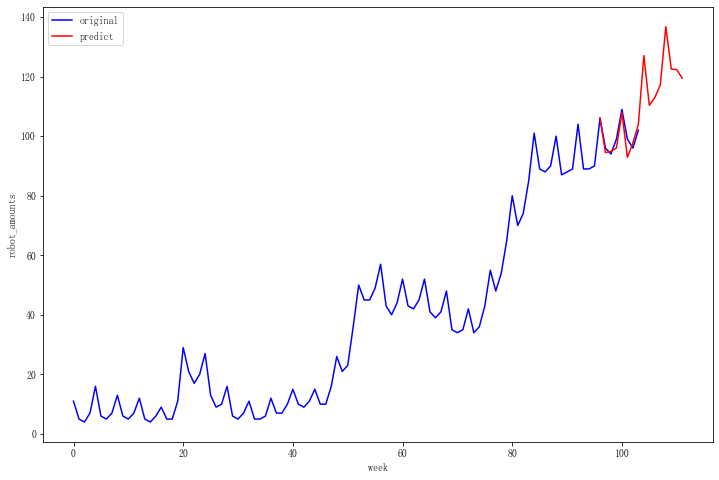

In [544]:
plt.figure()
ax1 = plt.plot(data, color='blue', label='original')
ax2 = plt.plot(pred, color='red', label='predict')
plt.xlabel('week')
plt.ylabel('robot_amounts')
plt.legend()
plt.show()

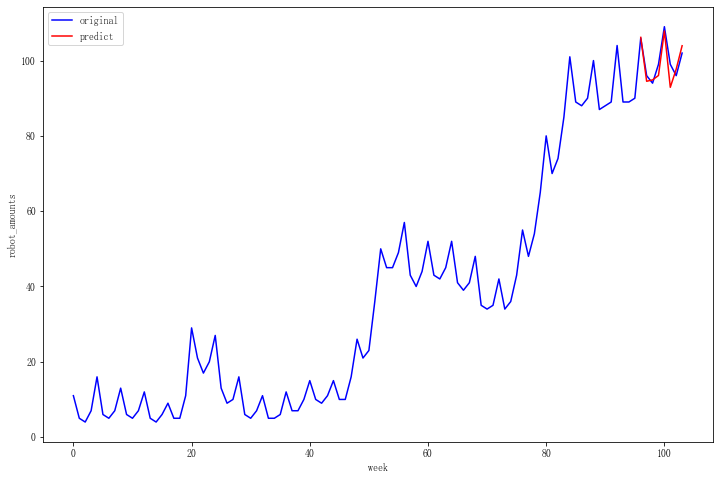

In [545]:
plt.figure()
ax1 = plt.plot(data, color='blue', label='original')
ax2 = plt.plot(pred.loc[:103], color='red', label='predict')
plt.xlabel('week')
plt.ylabel('robot_amounts')
plt.legend()
plt.show()

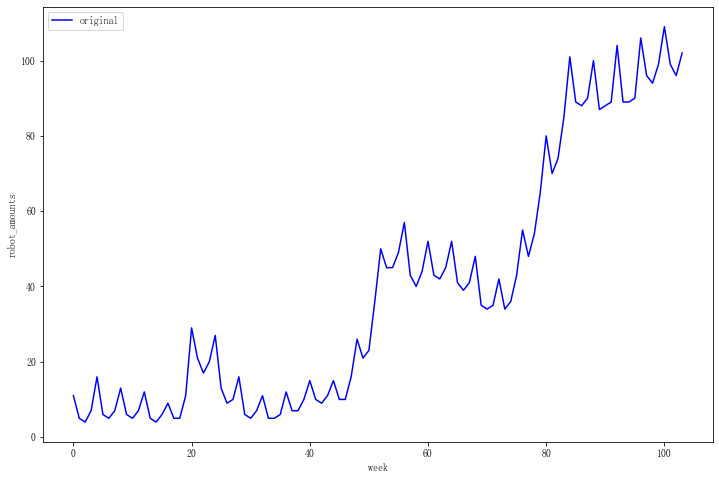

In [546]:
plt.figure()
ax1 = plt.plot(data, color='blue', label='original')
# ax2 = plt.plot(pred.loc[:103], color='red', label='predict')
plt.xlabel('week')
plt.ylabel('robot_amounts')
plt.legend()
plt.show()

In [570]:
pred

amount
96   106.164402
97    94.502474
98    94.865904
99    96.037655
100  107.864948
101   92.896688
102   97.727627
103  103.939203
104  127.067591
105  110.353313
106  112.981560
107  117.140530
108  136.766193
109  122.553111
110  122.351571
111  119.441179

In [590]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               amount   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 3, [1], 12)   Log Likelihood                -161.624
Date:                              Tue, 03 May 2022   AIC                            329.248
Time:                                      13:54:23   BIC                            334.734
Sample:                                           0   HQIC                           331.303
                                               - 96                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7118      0.112     -6.329      0.000      -0.932      -0.491
ma.S.L12      -1.0001   7348.427     -0.000      1.000   -1.44e+04    1.44e+04
sigma2        14.3584   1.06e+05      0.000      1.000   -2.07e+05    2.07e+05
===================================================================================
Ljung-Box (L1) (Q):                  17.64   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.00   Prob(JB):                         0.58
Heteroskedasticity (H):               1.00   Skew:                             0.15
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

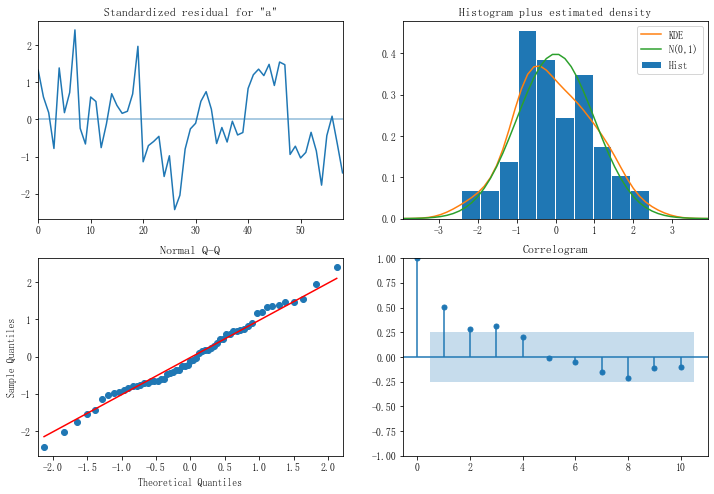

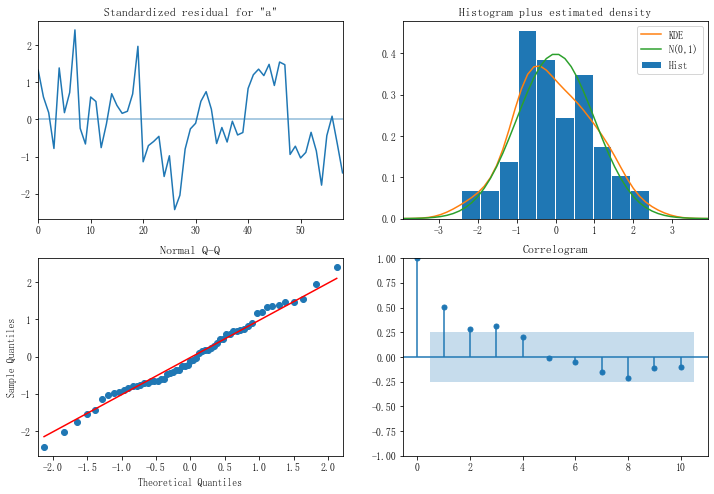

In [483]:
result.plot_diagnostics()